In [1]:
import torch
import numpy as np
import pandas as pd
from models import MultiRBFnnTime, MultiRBFnn_sigma

device = "cuda" if torch.cuda.is_available() else "cpu"

In [5]:
df_ground = pd.read_csv('./dataset/demo_csv.csv')
df2 = pd.read_csv('./dataset/demo_short.csv')
lossth2 = np.mean(df2.mean().values) * 0.05

input_data2 =  torch.tensor(np.array(df2.index) + 1, device = device, dtype = torch.float64)
target2 = torch.tensor(df2.values.T.astype(np.float64), device = device, dtype = torch.float64)
target_ground2 = torch.tensor(df_ground.values.T.astype(np.float64), device = device, dtype = torch.float64)

In [8]:
lossth2

0.12849569475336264

0th additional rbflayer
0th additional RBFlayer 0th epoch loss: 3.452382721829917
0th additional RBFlayer 999th epoch value MAE Loss: 3.0982096294715906
0th additional RBFlayer 1999th epoch value MAE Loss: 2.9844032042728443
0th additional RBFlayer best loss : 2.9844032042728443


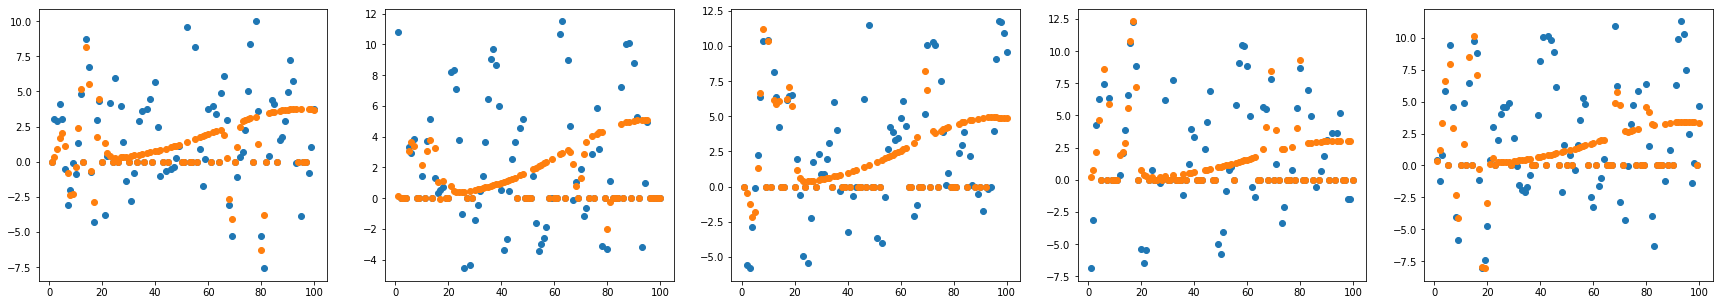

1th additional rbflayer
1th additional RBFlayer 0th epoch loss: 2.2539672659397
1th additional RBFlayer 999th epoch value MAE Loss: 2.142178892532558
1th additional RBFlayer 1999th epoch value MAE Loss: 2.1207926446597045
1th additional RBFlayer best loss : 2.1207926446597045


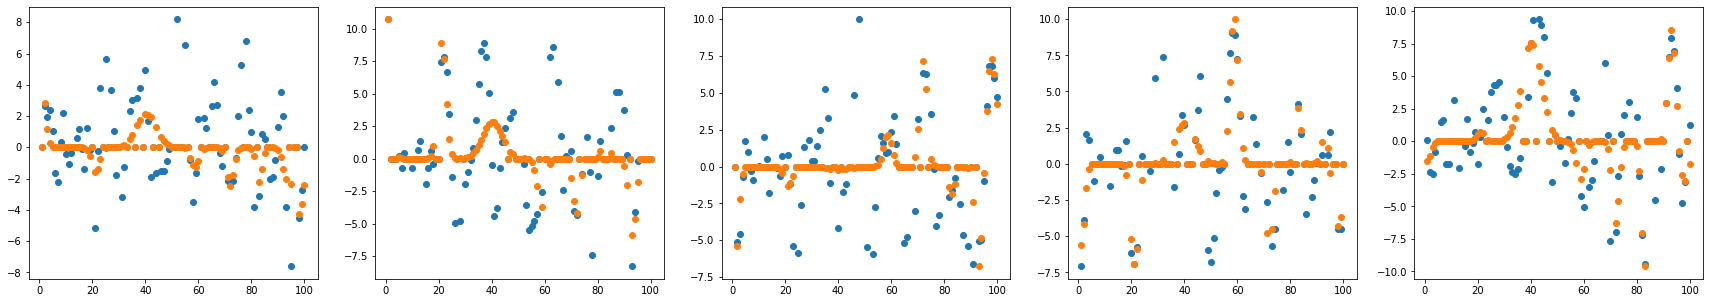

2th additional rbflayer
2th additional RBFlayer 0th epoch loss: 1.73877057059099
2th additional RBFlayer 999th epoch value MAE Loss: 1.5631327665693555
2th additional RBFlayer 1999th epoch value MAE Loss: 1.5219026251341123
2th additional RBFlayer best loss : 1.5219026251341123


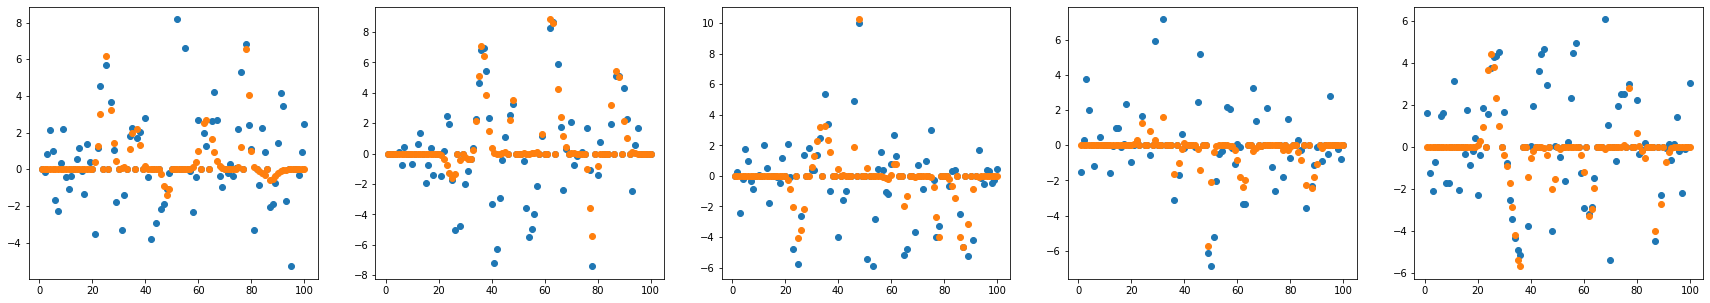

3th additional rbflayer
3th additional RBFlayer 0th epoch loss: 1.2357018265138526
3th additional RBFlayer 999th epoch value MAE Loss: 1.1287887970801342
3th additional RBFlayer 1999th epoch value MAE Loss: 1.1167236597651606
3th additional RBFlayer best loss : 1.1167236597651606


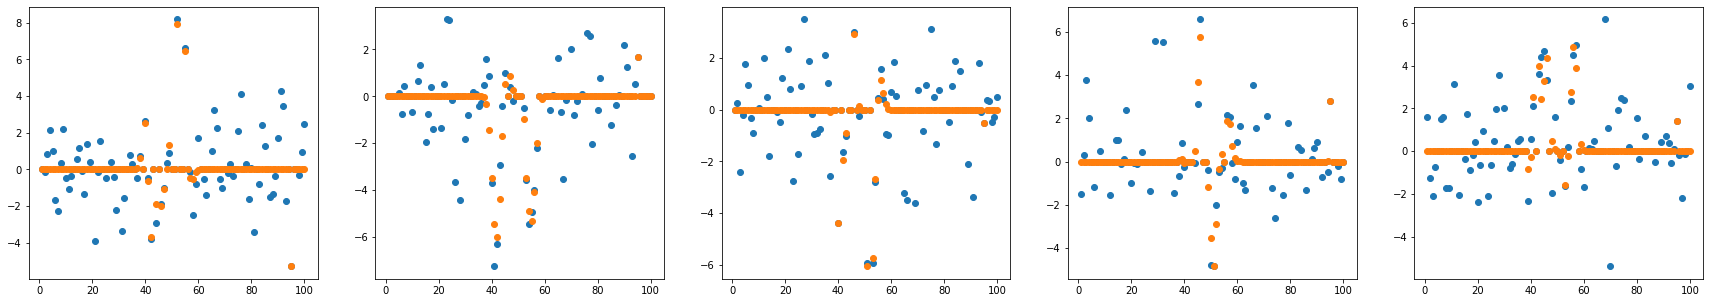

4th additional rbflayer
4th additional RBFlayer 0th epoch loss: 0.9071280779179037
4th additional RBFlayer 999th epoch value MAE Loss: 0.8685012389159955
4th additional RBFlayer 1999th epoch value MAE Loss: 0.8613392662602728
4th additional RBFlayer best loss : 0.8611396505559665


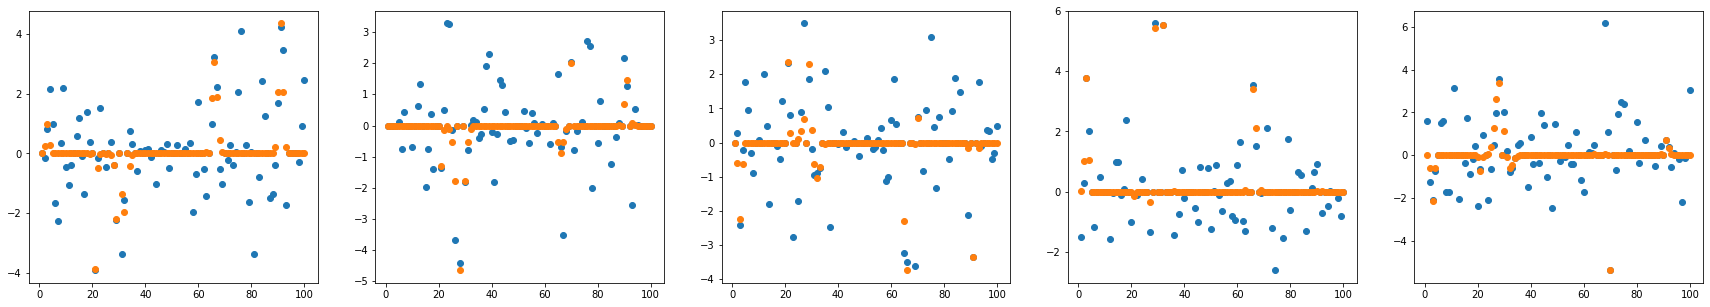

5th additional rbflayer
5th additional RBFlayer 0th epoch loss: 0.7592424045409302
5th additional RBFlayer 999th epoch value MAE Loss: 0.6819735296925049
5th additional RBFlayer 1999th epoch value MAE Loss: 0.6732998702874446
5th additional RBFlayer best loss : 0.6732998702874446


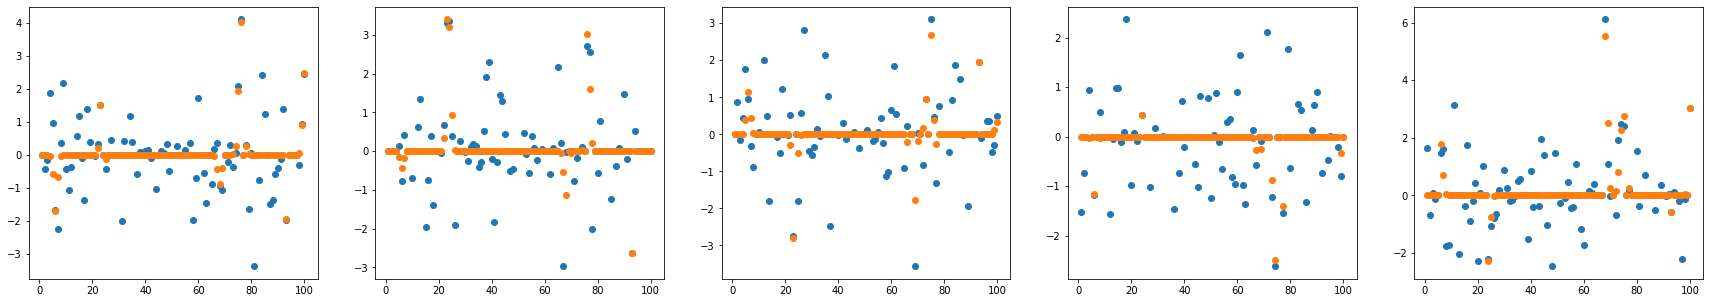

6th additional rbflayer
6th additional RBFlayer 0th epoch loss: 0.5945665630442272
6th additional RBFlayer 999th epoch value MAE Loss: 0.5663932809699809
6th additional RBFlayer 1999th epoch value MAE Loss: 0.5651621969503501
6th additional RBFlayer best loss : 0.5637518878548914


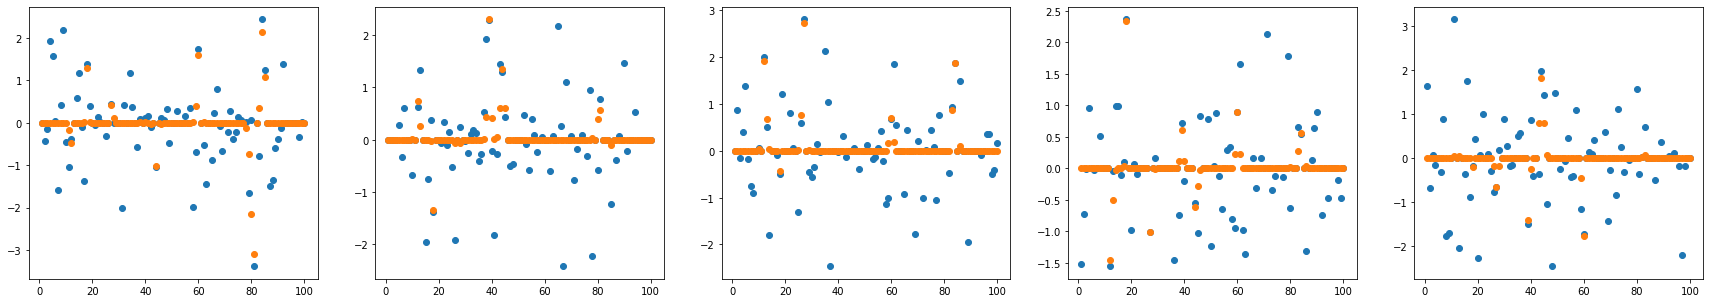

7th additional rbflayer
7th additional RBFlayer 0th epoch loss: 0.5312580591974024
7th additional RBFlayer 999th epoch value MAE Loss: 0.4651223322898133
7th additional RBFlayer 1999th epoch value MAE Loss: 0.461884174486716
7th additional RBFlayer best loss : 0.461884174486716


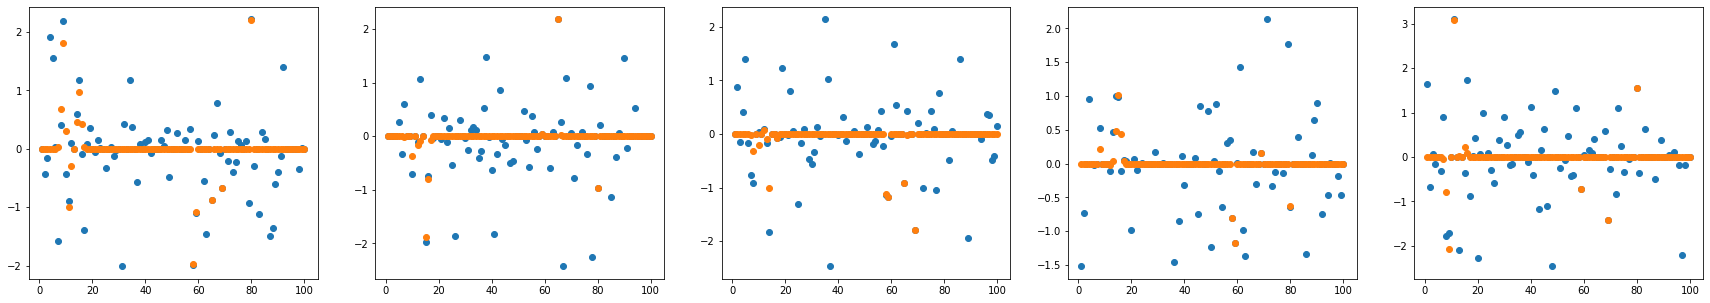

8th additional rbflayer
8th additional RBFlayer 0th epoch loss: 0.4071462040612554
8th additional RBFlayer 999th epoch value MAE Loss: 0.3812591280892629
8th additional RBFlayer 1999th epoch value MAE Loss: 0.378524957057294
8th additional RBFlayer best loss : 0.378524957057294


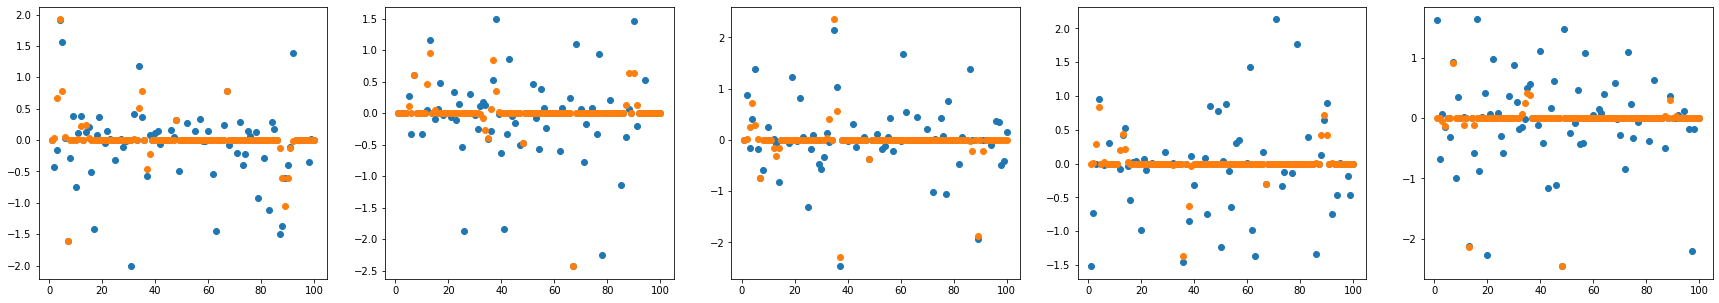

9th additional rbflayer
9th additional RBFlayer 0th epoch loss: 0.348978439020237
9th additional RBFlayer 999th epoch value MAE Loss: 0.3102435534641953
9th additional RBFlayer 1999th epoch value MAE Loss: 0.3085404236806652
9th additional RBFlayer best loss : 0.3085404236806652


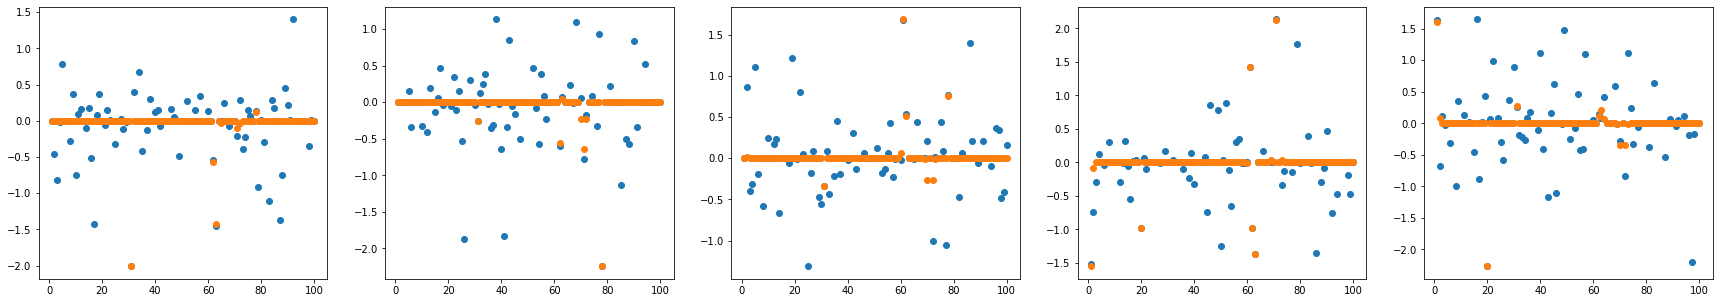

10th additional rbflayer
10th additional RBFlayer 0th epoch loss: 0.28442187049670425
10th additional RBFlayer 999th epoch value MAE Loss: 0.24768304088998758
10th additional RBFlayer 1999th epoch value MAE Loss: 0.24414971152244772
10th additional RBFlayer best loss : 0.24414971152244772


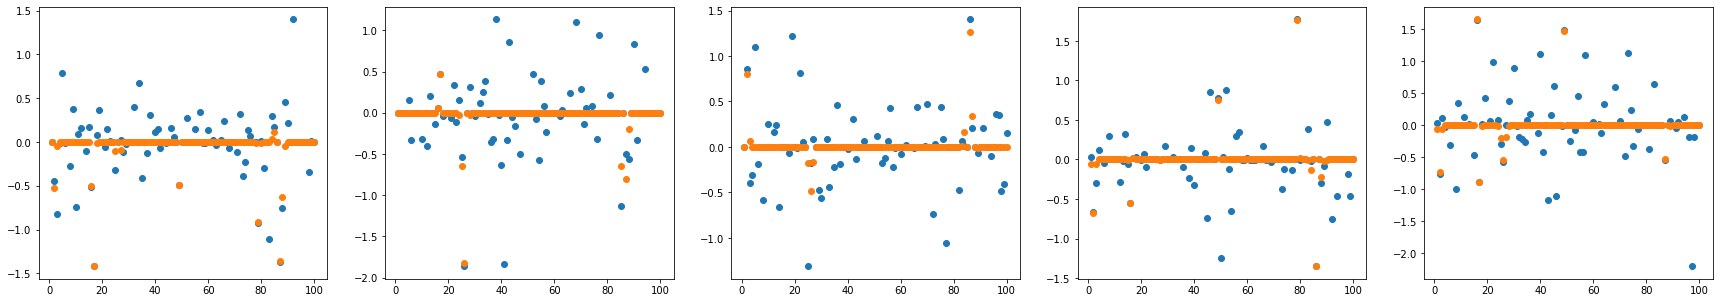

11th additional rbflayer
11th additional RBFlayer 0th epoch loss: 0.24043156681912964
11th additional RBFlayer 999th epoch value MAE Loss: 0.1952009017721273
11th additional RBFlayer 1999th epoch value MAE Loss: 0.19023686440749357
11th additional RBFlayer best loss : 0.19023686440749357


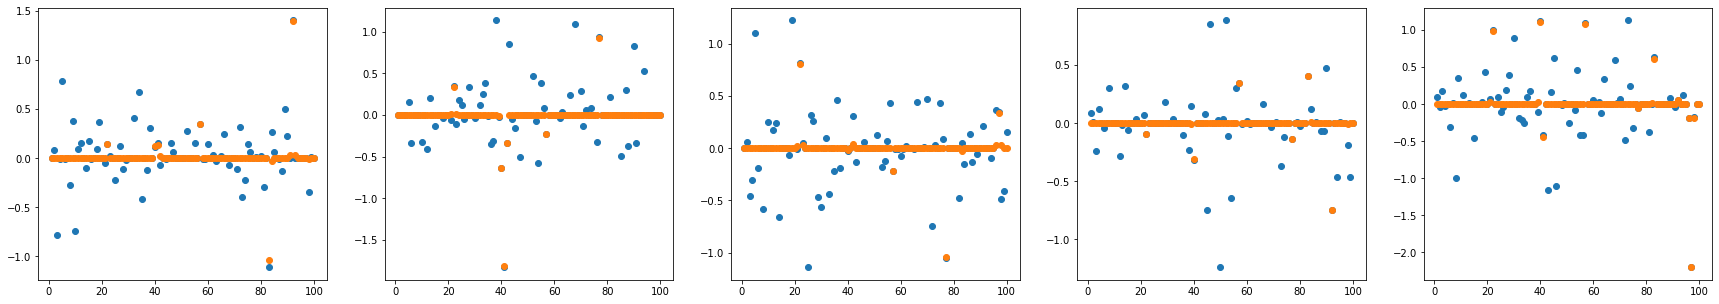

12th additional rbflayer
12th additional RBFlayer 0th epoch loss: 0.1813576791287666
12th additional RBFlayer 999th epoch value MAE Loss: 0.15192029557174144
12th additional RBFlayer 1999th epoch value MAE Loss: 0.14540859915935966
12th additional RBFlayer best loss : 0.14540859915935966


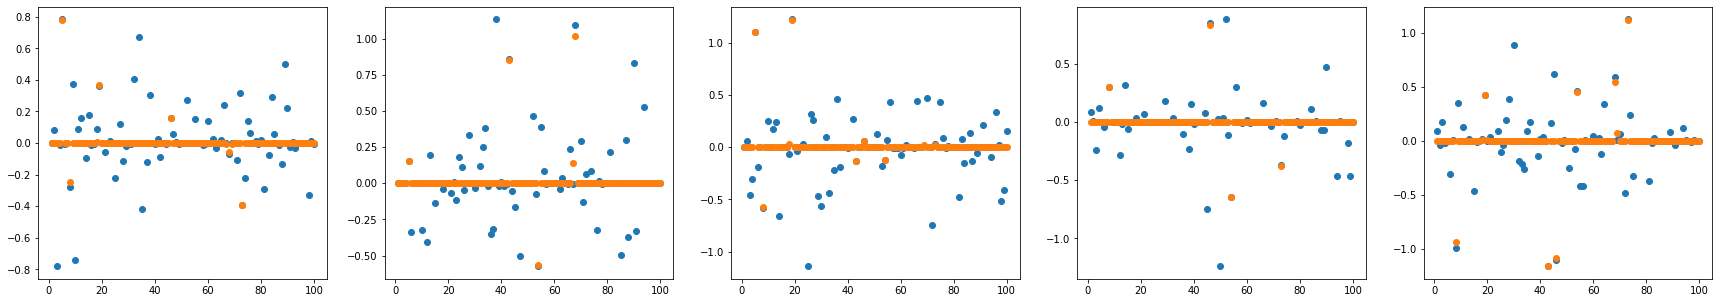

13th additional rbflayer
13th additional RBFlayer 0th epoch loss: 0.1377044009869542
13th additional RBFlayer 999th epoch value MAE Loss: 0.11584227821831025
13th additional RBFlayer 1999th epoch value MAE Loss: 0.11082956065995694
13th additional RBFlayer best loss : 0.11082956065995694


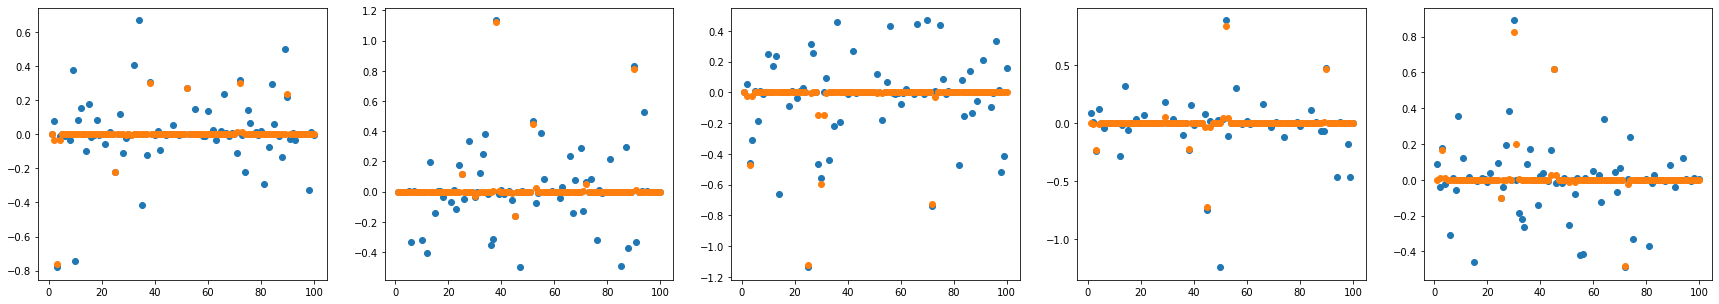

In [40]:
model_time = MultiRBFnnTime(5, 8, device)
model_time.train(input_data2, target2, 2000, 1e-3, lossth2, 1e-6)

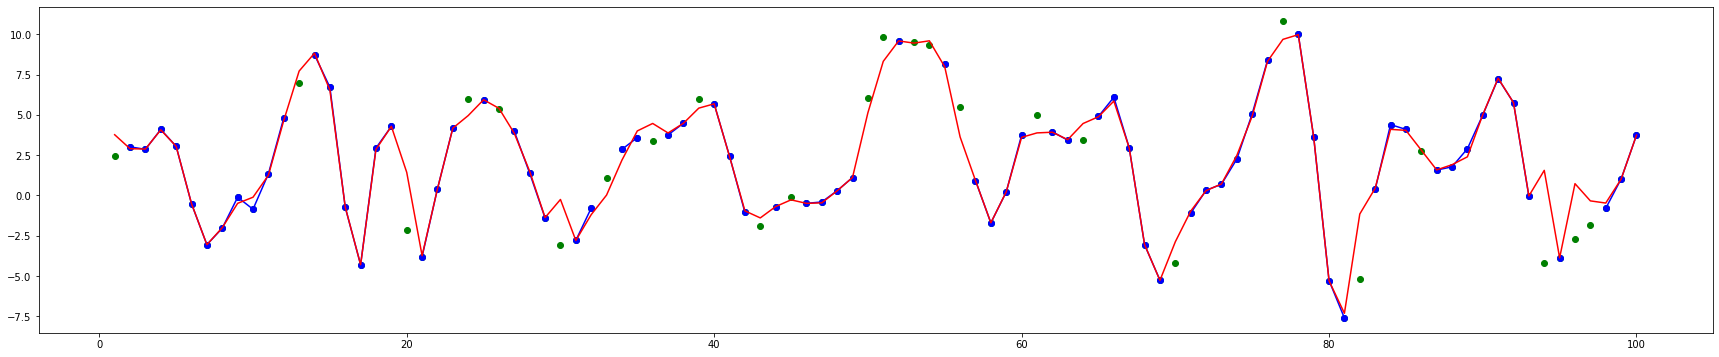

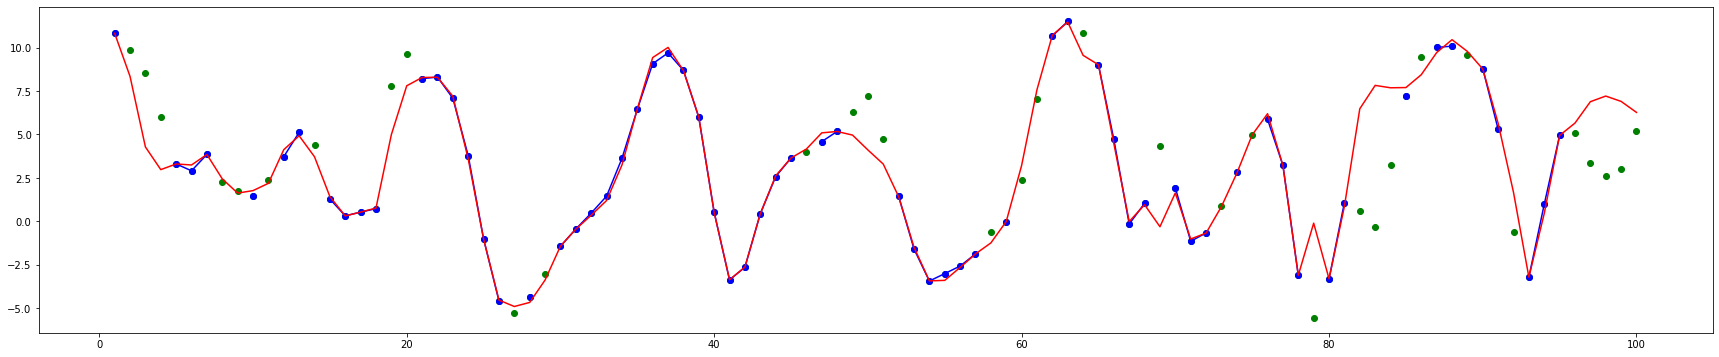

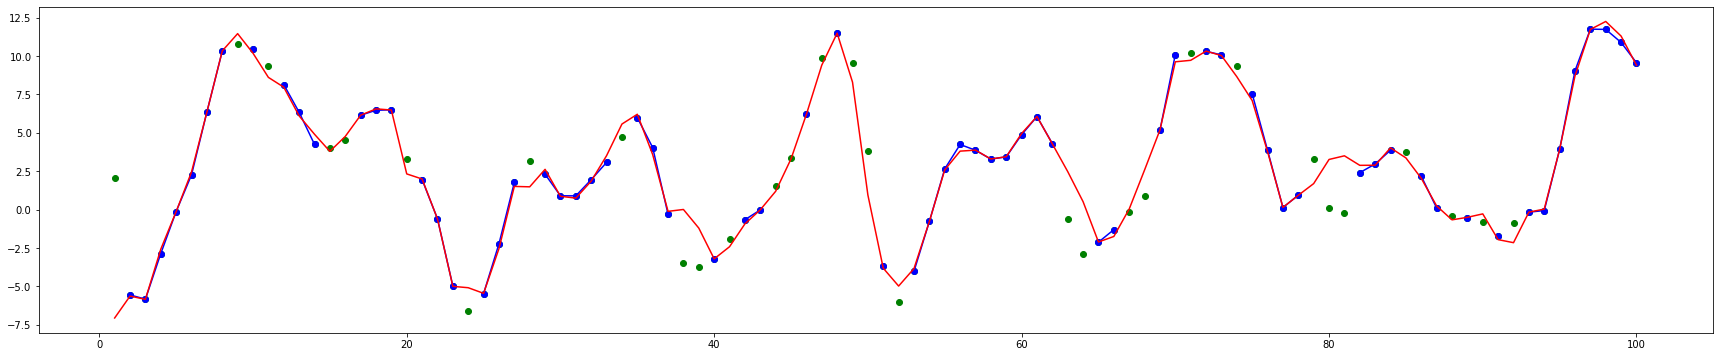

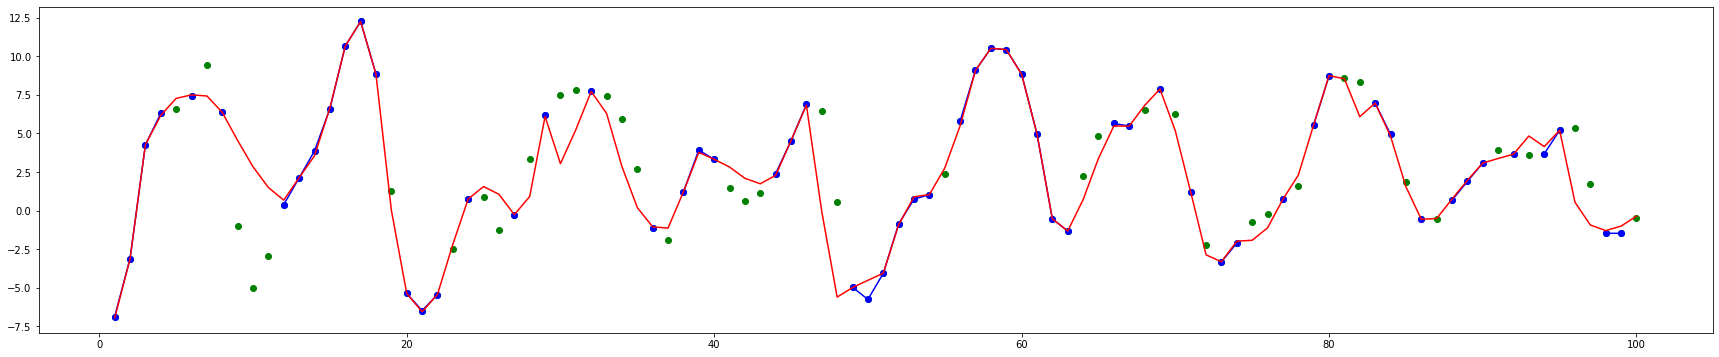

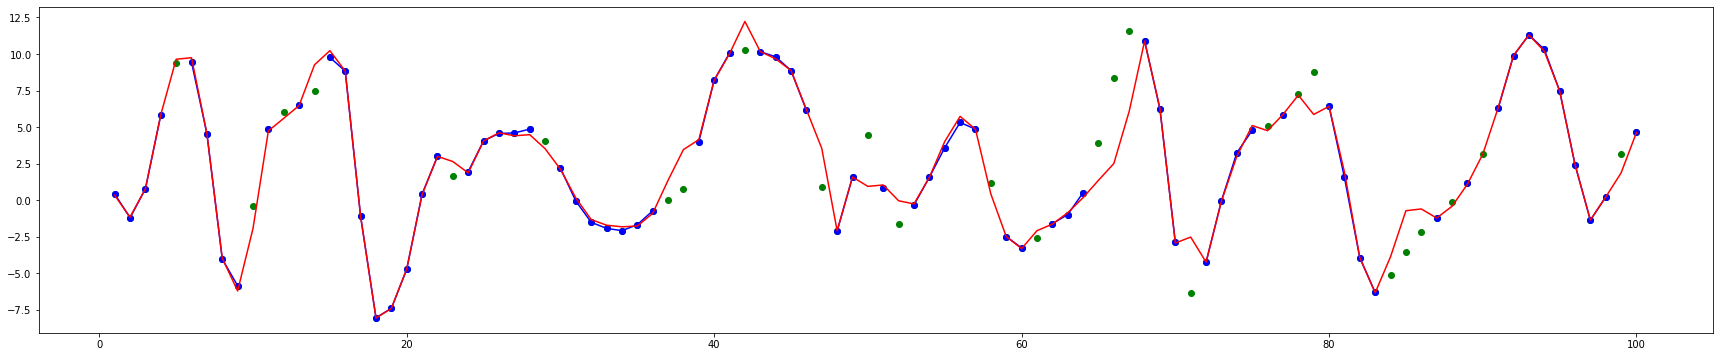

In [42]:
import matplotlib.pyplot as plt
pred_short = model_time.pred(input_data2)[1]
for i in range(5):
    plt.figure(figsize=(30, 6))
    plt.scatter(input_data2.cpu().detach().numpy(), target_ground2[i].cpu().detach().numpy(), c = 'green')
    plt.scatter(input_data2.cpu().detach().numpy(), target2[i].cpu().detach().numpy(), c = 'blue')
    plt.plot(input_data2.cpu().detach().numpy(), target2[i].cpu().detach().numpy(), c = 'blue')
    plt.plot(input_data2.cpu().detach().numpy(), pred_short[i].cpu().detach().numpy(), c = 'red')
    plt.show()

In [43]:
def rbf_train_flow(model):
    aaa = []
    for j in range(14):
        center = model.train_center_list[j*5:(j+1) * 5]
        sigma = model.train_sigma_list[j*5:(j+1) * 5]
        weight = model.train_weight_list[j*5:(j+1) * 5]
        rbf_list = []
        for i in range(len(center)):
            rbf_output = torch.exp(-1 * (torch.pow((input_data2 - center[i]), 2) / \
                                            (torch.pow(sigma[i], 2))))
            pred = torch.mm(weight[i], rbf_output)
            rbf_list.append(pred)
        aaa.append(rbf_list)
    for i in range(14):
        if i ==0:
            a = torch.cat(aaa[i], axis = 0).reshape(5,5,100)
        else:
            a += torch.cat(aaa[i], axis = 0).reshape(5,5,100)

    return a

In [44]:
aaa = rbf_train_flow(model_time)

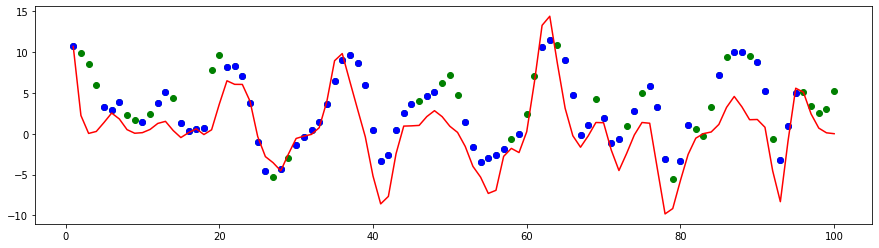

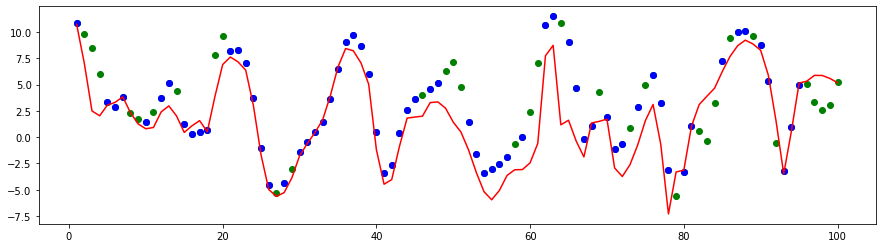

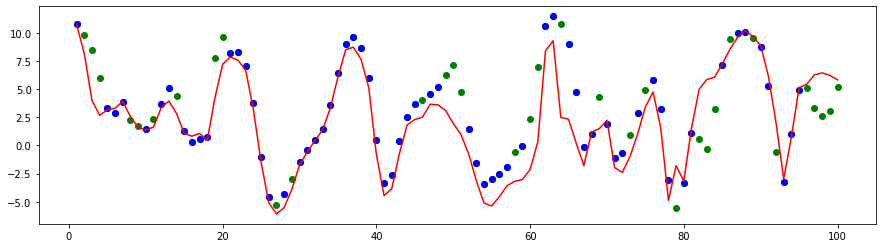

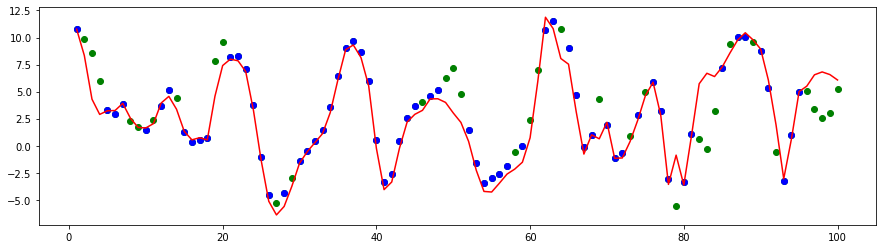

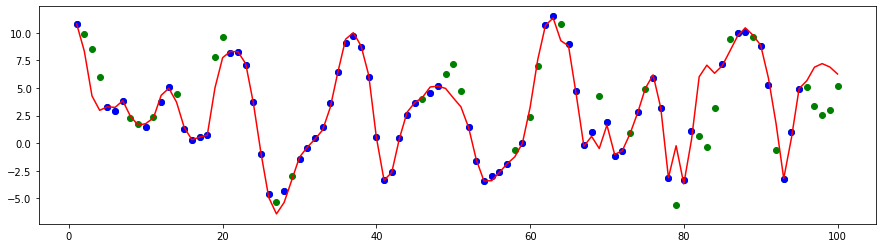

In [47]:
import matplotlib.pyplot as plt
num_feature = 1
for i in range(len(aaa)):
    plt.figure(figsize=(15, 4))
    plt.scatter(input_data2.cpu().detach().numpy(), target_ground2[num_feature].cpu().detach().numpy(), c = 'green')
    plt.scatter(input_data2.cpu().detach().numpy(), target2[num_feature].cpu().detach().numpy(), c = 'blue')
    plt.plot(input_data2.cpu().detach().numpy(), aaa[i][num_feature].cpu().detach().numpy(), c = 'red')
    #plt.ylim(-5,20)
    # plt.xlim(35, 70)
    plt.show()

0th additional rbflayer
0th additional RBFlayer 0th epoch loss: 3.498332976706824
0th additional RBFlayer 999th epoch value MAE Loss: 3.22677639137134
0th additional RBFlayer 1999th epoch value MAE Loss: 3.117785912203072
0th additional RBFlayer best loss : 3.117785912203072


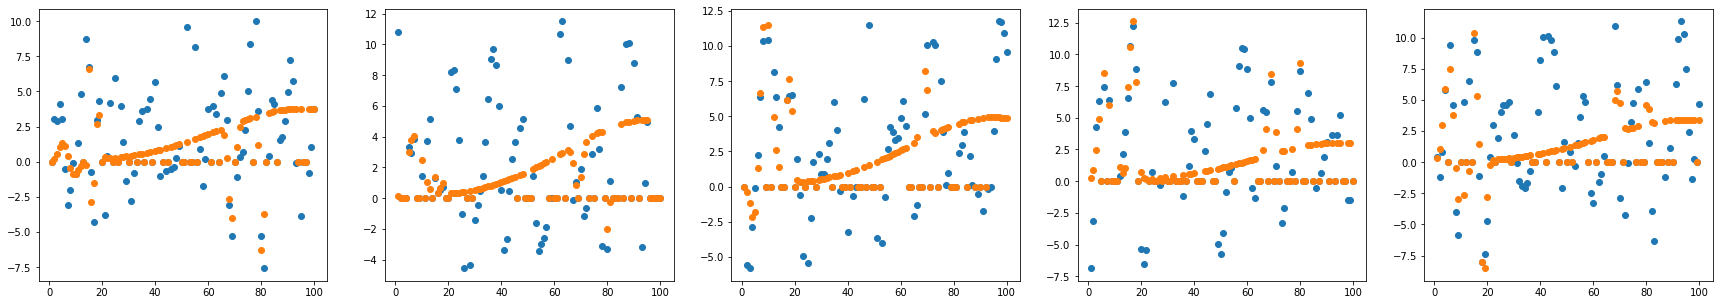

1th additional rbflayer
1th additional RBFlayer 0th epoch loss: 2.5312328805258795
1th additional RBFlayer 999th epoch value MAE Loss: 2.2688068246499573
1th additional RBFlayer 1999th epoch value MAE Loss: 2.2496655574596156
1th additional RBFlayer best loss : 2.2496655574596156


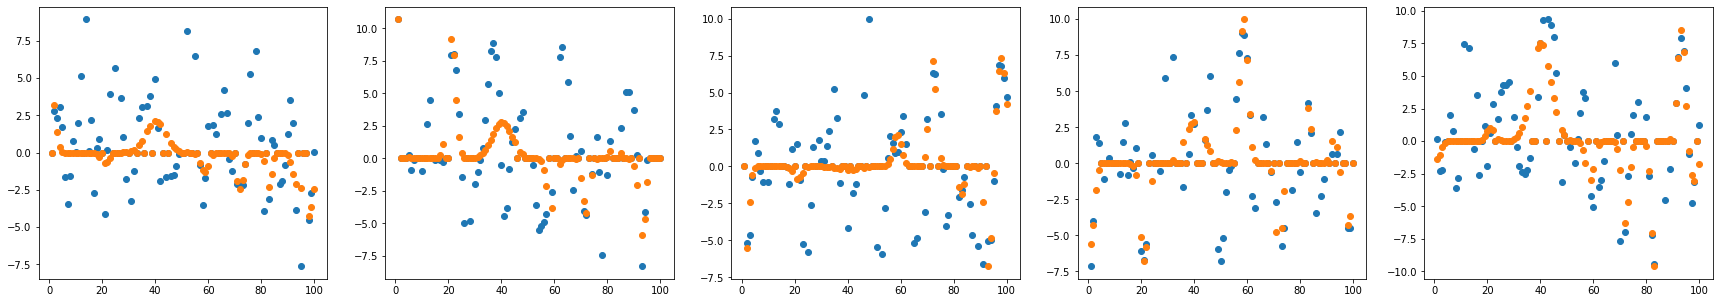

2th additional rbflayer
2th additional RBFlayer 0th epoch loss: 1.81710526142171
2th additional RBFlayer 999th epoch value MAE Loss: 1.6792845333802622
2th additional RBFlayer 1999th epoch value MAE Loss: 1.6674733326121394
2th additional RBFlayer best loss : 1.6674733326121394


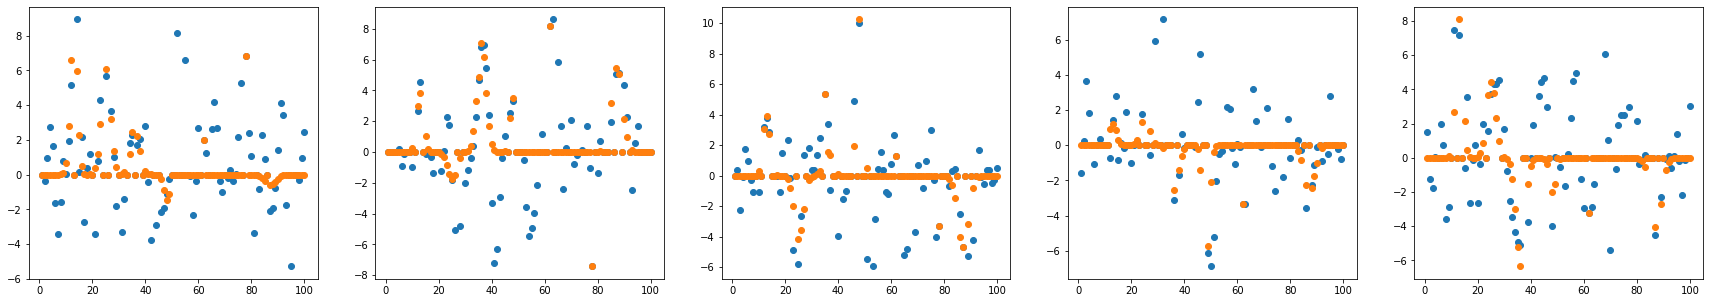

3th additional rbflayer
3th additional RBFlayer 0th epoch loss: 1.3560687176184574
3th additional RBFlayer 999th epoch value MAE Loss: 1.2855456464445583
3th additional RBFlayer 1999th epoch value MAE Loss: 1.2806870690425645
3th additional RBFlayer best loss : 1.2806870690425645


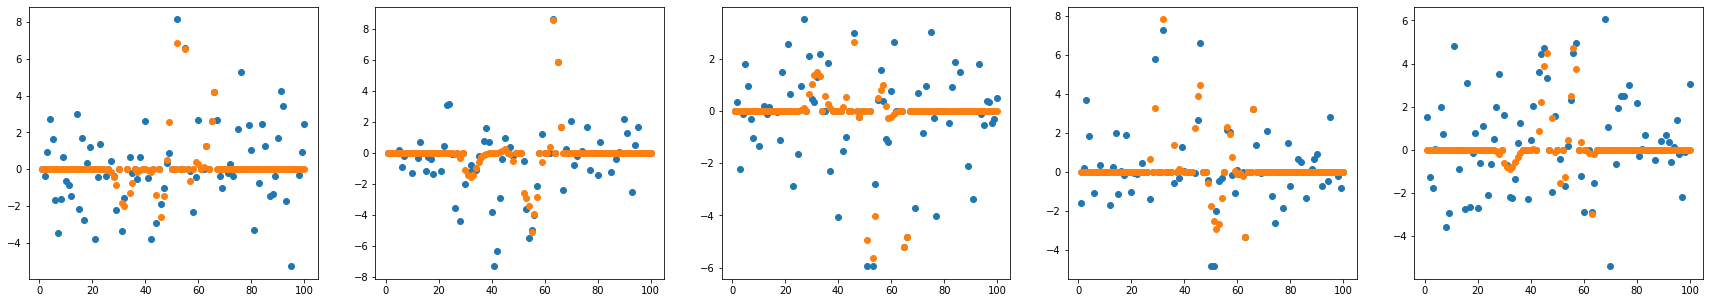

4th additional rbflayer
4th additional RBFlayer 0th epoch loss: 1.0578030812662798
4th additional RBFlayer 999th epoch value MAE Loss: 1.0320542574421445
4th additional RBFlayer 1999th epoch value MAE Loss: 1.0274594333823406
4th additional RBFlayer best loss : 1.0274594333823406


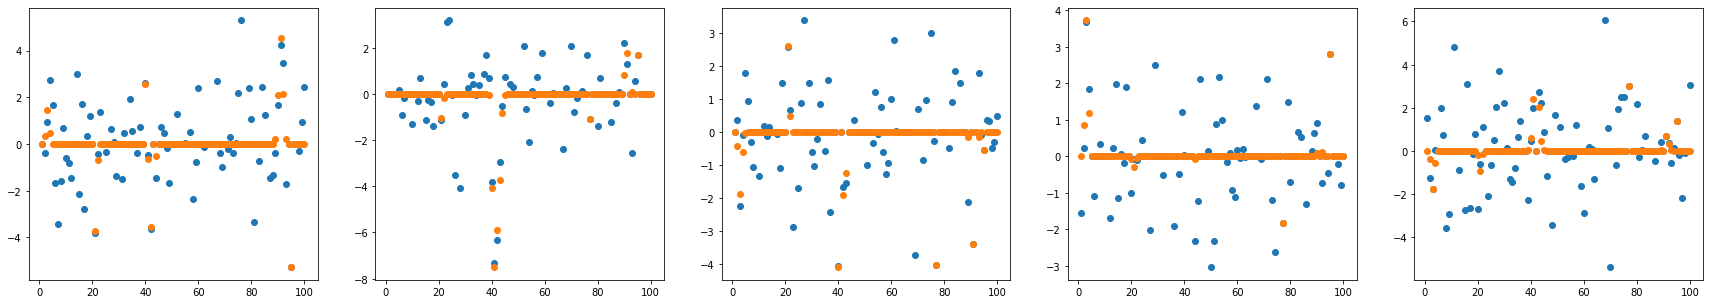

5th additional rbflayer
5th additional RBFlayer 0th epoch loss: 0.857308462333272
5th additional RBFlayer 999th epoch value MAE Loss: 0.8481956229800288
5th additional RBFlayer 1999th epoch value MAE Loss: 0.8383698529636888
5th additional RBFlayer best loss : 0.8383698529636888


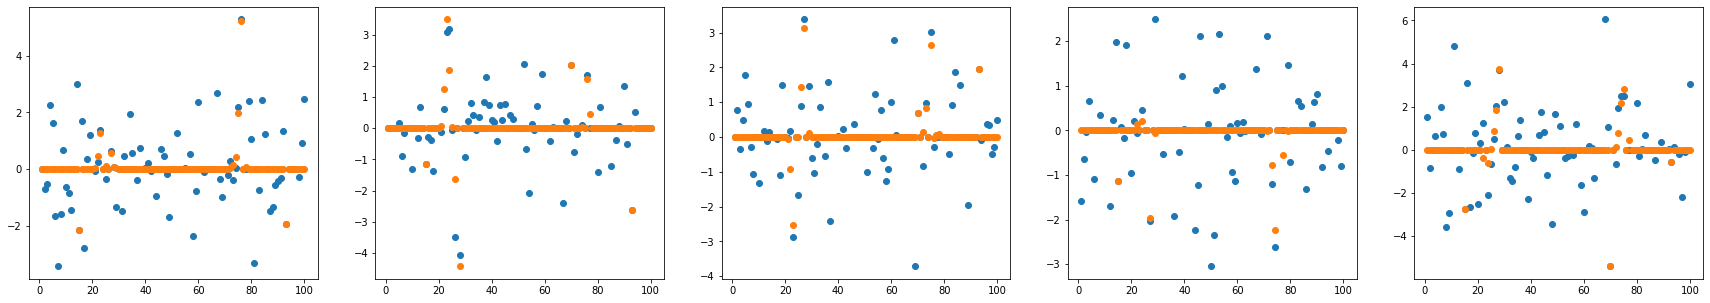

6th additional rbflayer
6th additional RBFlayer 0th epoch loss: 0.7325496870857162
6th additional RBFlayer 999th epoch value MAE Loss: 0.692420847873444
6th additional RBFlayer 1999th epoch value MAE Loss: 0.6876562941089994
6th additional RBFlayer best loss : 0.6876562941089994


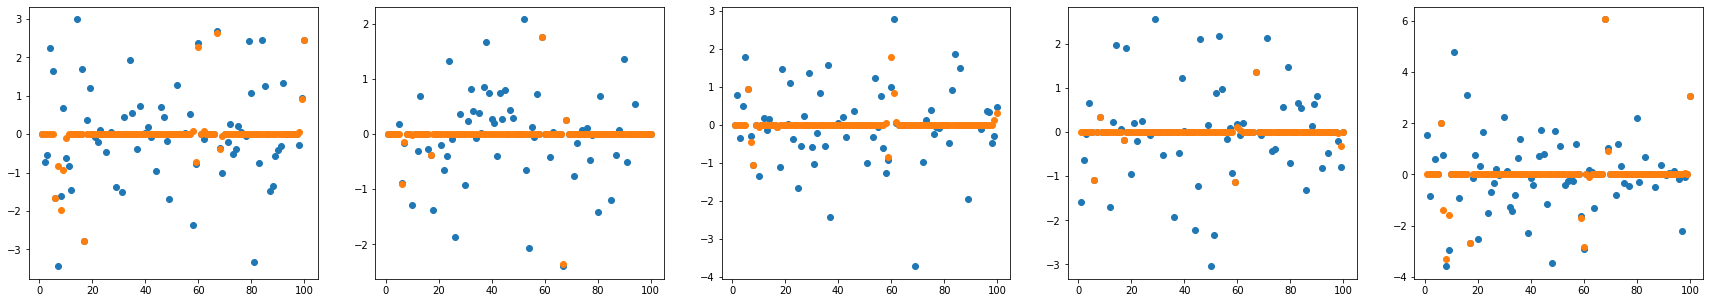

7th additional rbflayer
7th additional RBFlayer 0th epoch loss: 0.5839806697919248
7th additional RBFlayer 999th epoch value MAE Loss: 0.5606803873315084
7th additional RBFlayer 1999th epoch value MAE Loss: 0.5602124825795933
7th additional RBFlayer best loss : 0.5602124825795933


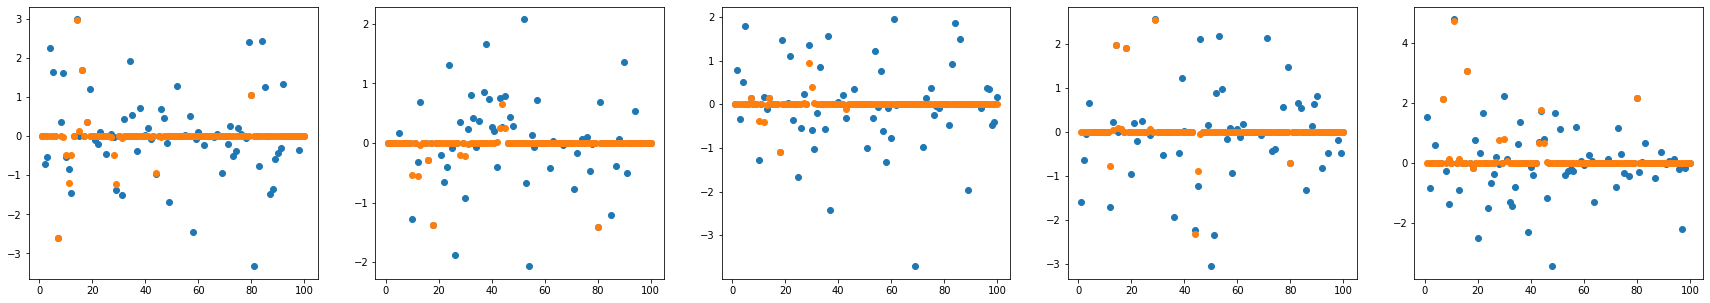

8th additional rbflayer
8th additional RBFlayer 0th epoch loss: 0.4778704937152479
8th additional RBFlayer 999th epoch value MAE Loss: 0.45565227665488856
8th additional RBFlayer 1999th epoch value MAE Loss: 0.45188525020318104
8th additional RBFlayer best loss : 0.45188525020318104


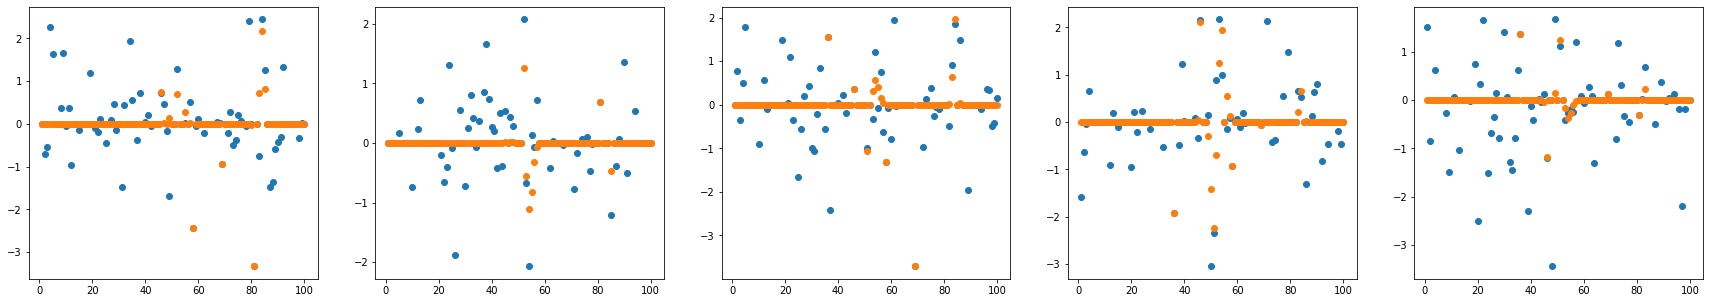

9th additional rbflayer
9th additional RBFlayer 0th epoch loss: 0.38938139765523977
9th additional RBFlayer 999th epoch value MAE Loss: 0.36487881418450674
9th additional RBFlayer 1999th epoch value MAE Loss: 0.3645486970830065
9th additional RBFlayer best loss : 0.3645486970830065


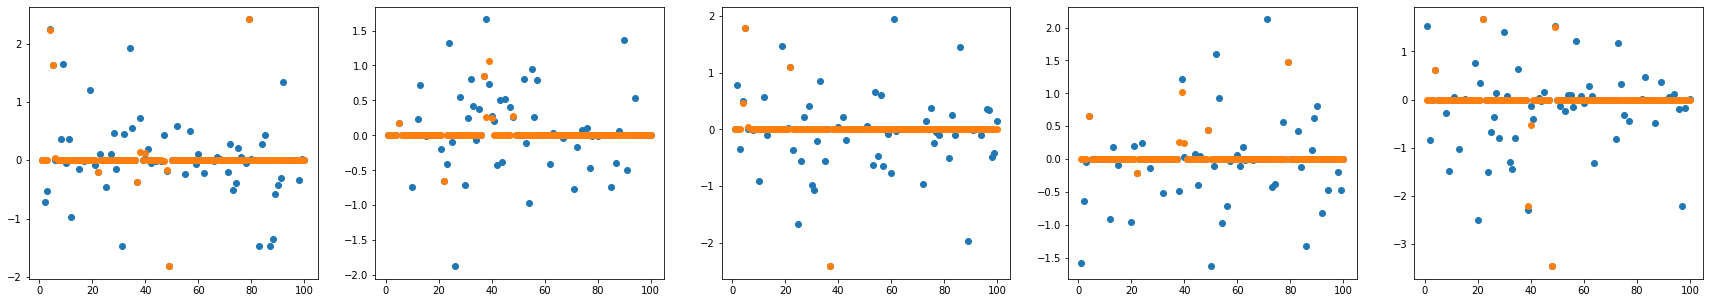

10th additional rbflayer
10th additional RBFlayer 0th epoch loss: 0.3058750713679513
10th additional RBFlayer 999th epoch value MAE Loss: 0.2867279917806527
10th additional RBFlayer 1999th epoch value MAE Loss: 0.28490053033997137
10th additional RBFlayer best loss : 0.28490053033997137


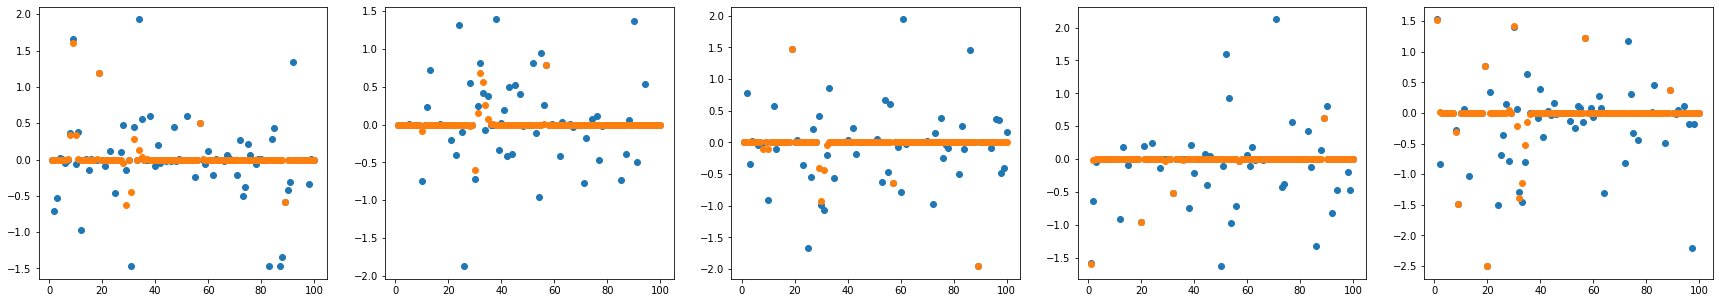

11th additional rbflayer
11th additional RBFlayer 0th epoch loss: 0.24531368579360768
11th additional RBFlayer 999th epoch value MAE Loss: 0.2272637789553455
11th additional RBFlayer 1999th epoch value MAE Loss: 0.21959407333820885
11th additional RBFlayer best loss : 0.21959407333820885


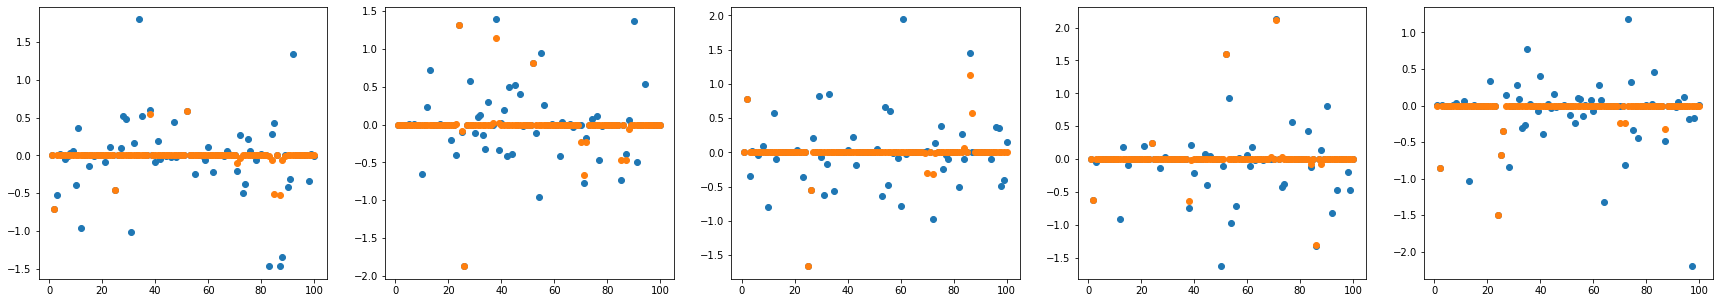

12th additional rbflayer
12th additional RBFlayer 0th epoch loss: 0.18661892180841766
12th additional RBFlayer 999th epoch value MAE Loss: 0.16151871839720383
12th additional RBFlayer 1999th epoch value MAE Loss: 0.15978475969853304
12th additional RBFlayer best loss : 0.15978475969853304


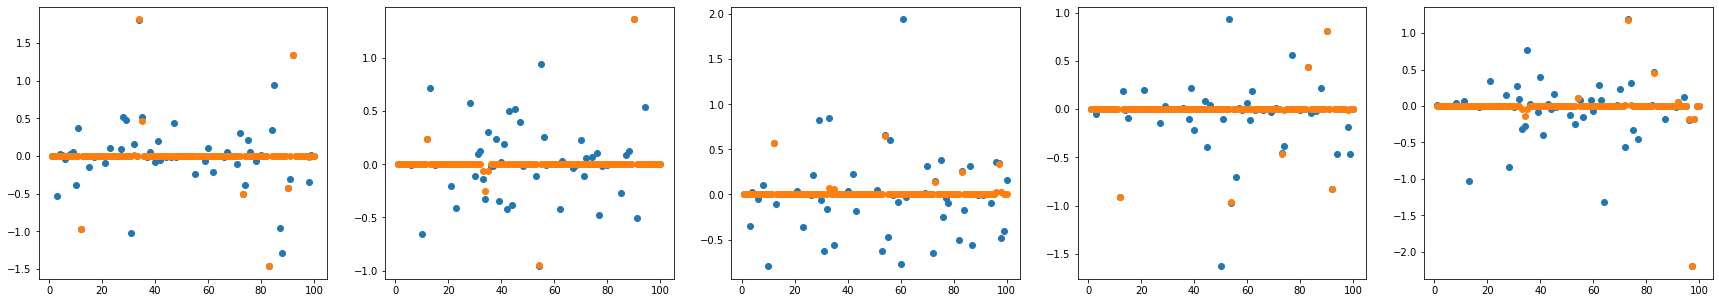

13th additional rbflayer
13th additional RBFlayer 0th epoch loss: 0.14015130010027502
13th additional RBFlayer 999th epoch value MAE Loss: 0.1254717734676114
13th additional RBFlayer 1999th epoch value MAE Loss: 0.11959132952465361
13th additional RBFlayer best loss : 0.11959132952465361


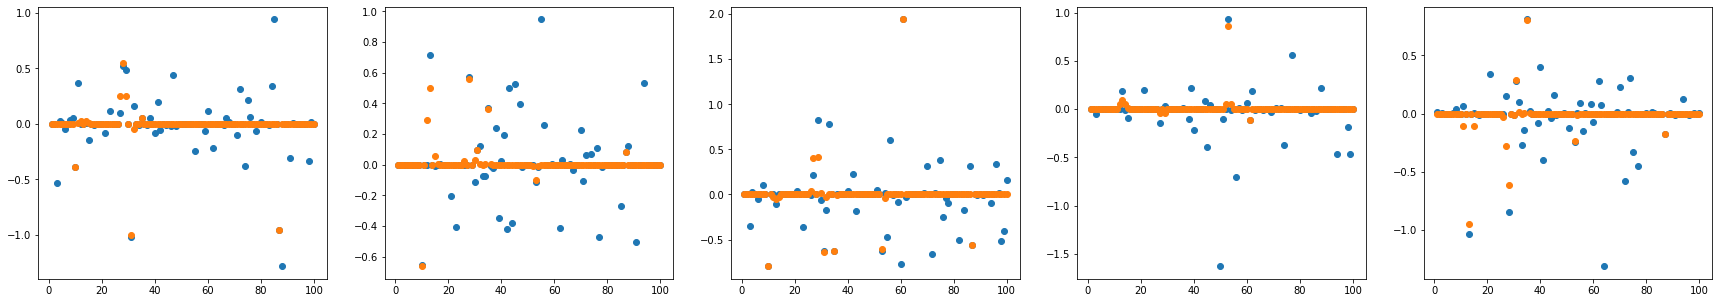

In [48]:
model_sigma = MultiRBFnn_sigma(5, 8, device)
model_sigma.train(input_data2, target2, 2000, 1e-3, lossth2, 1e-6)

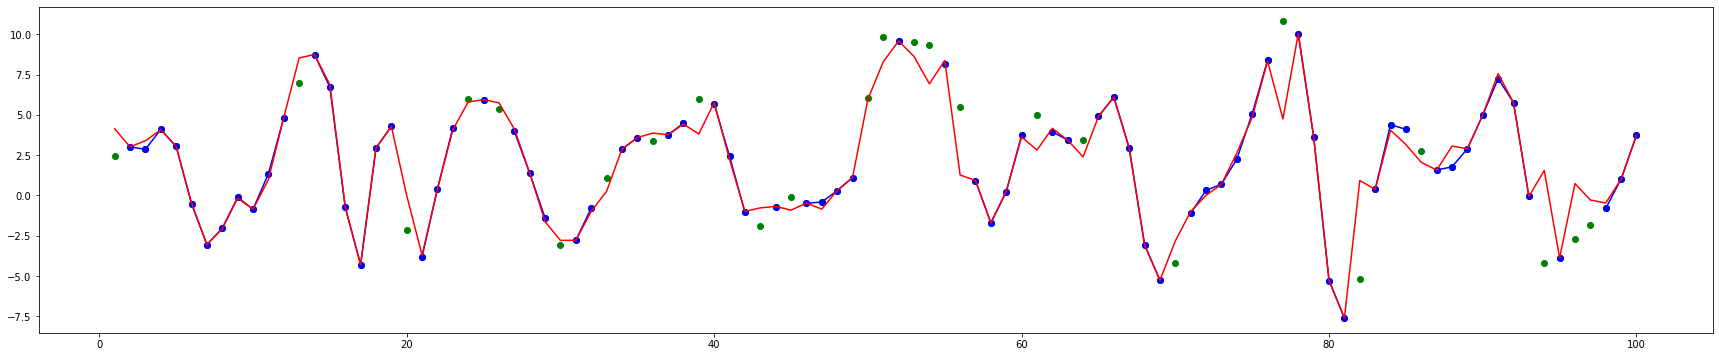

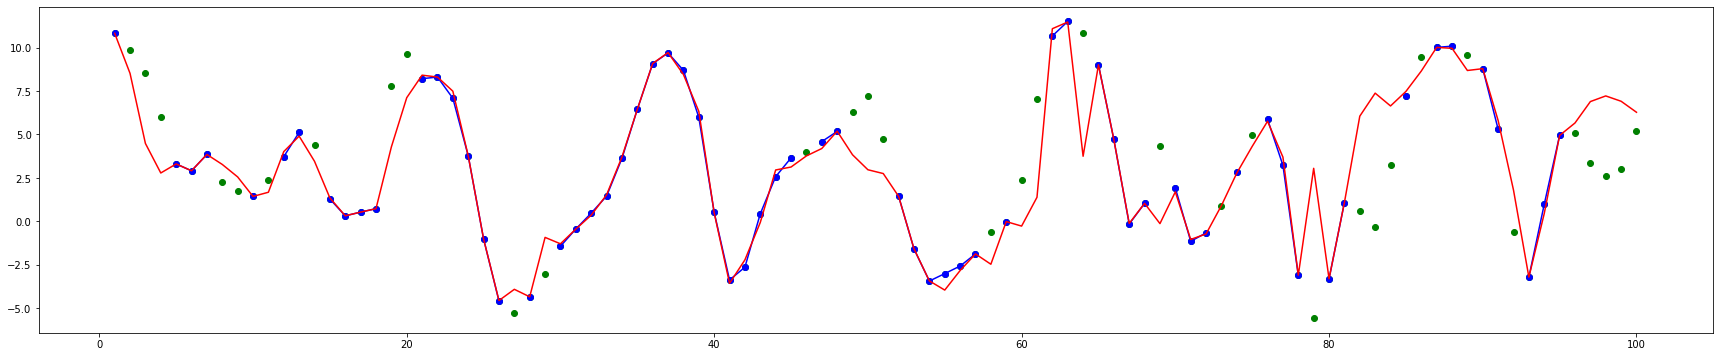

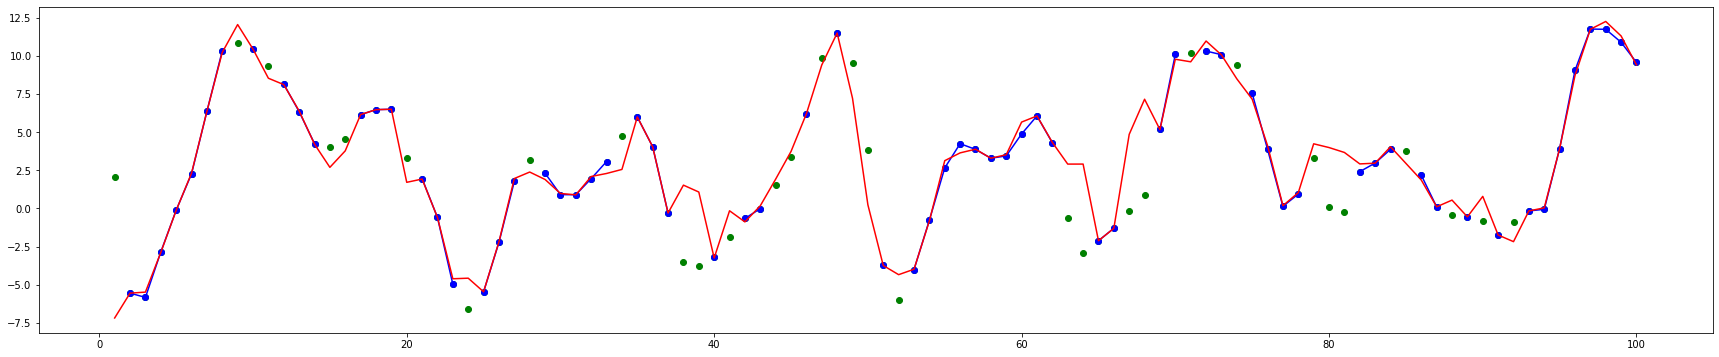

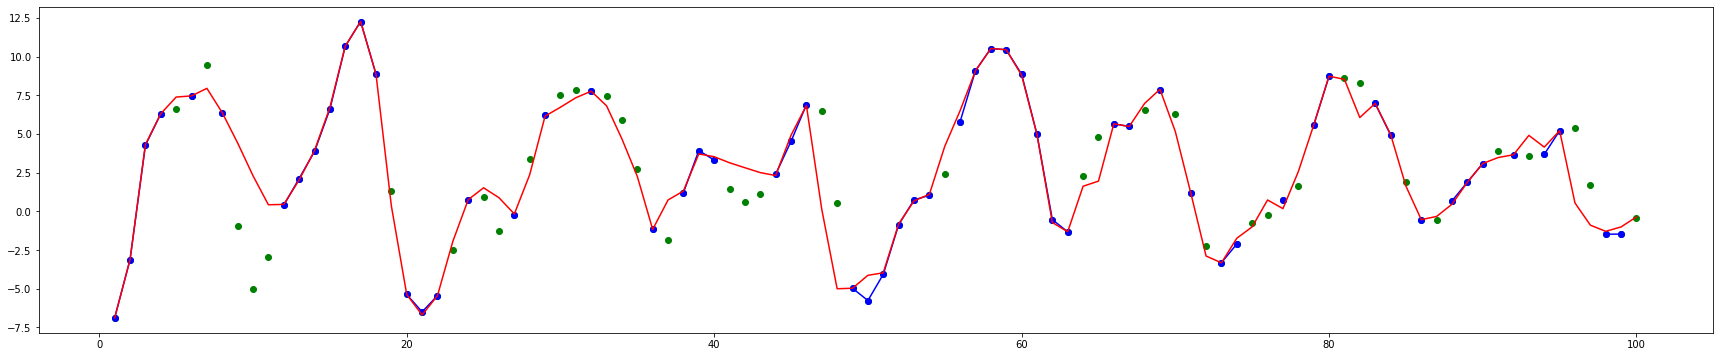

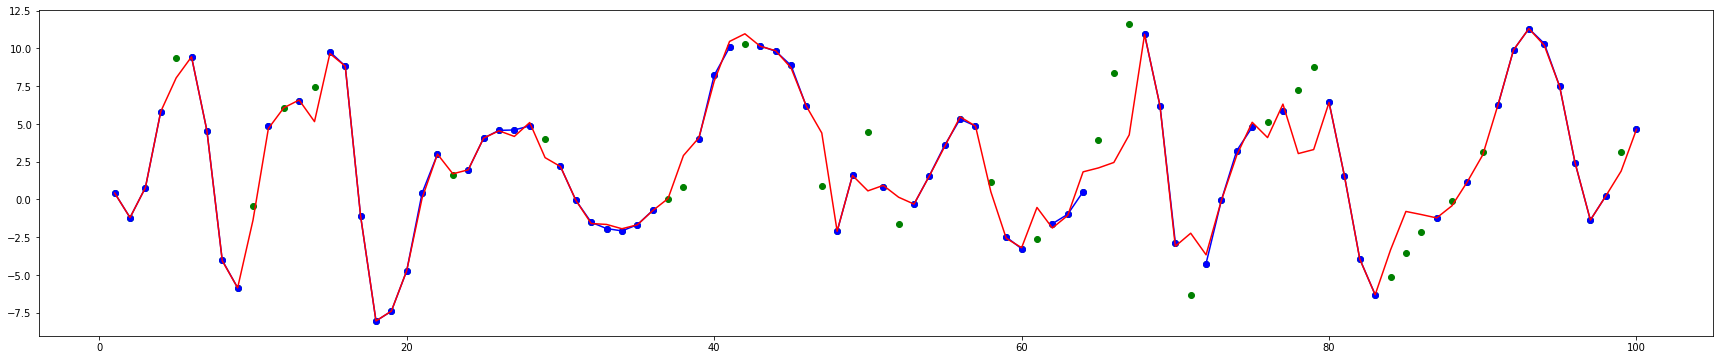

In [49]:
import matplotlib.pyplot as plt
pred_sigma = model_sigma.pred(input_data2)[1]
for i in range(5):
    plt.figure(figsize=(30, 6))
    plt.scatter(input_data2.cpu().detach().numpy(), target_ground2[i].cpu().detach().numpy(), c = 'green')
    plt.scatter(input_data2.cpu().detach().numpy(), target2[i].cpu().detach().numpy(), c = 'blue')
    plt.plot(input_data2.cpu().detach().numpy(), target2[i].cpu().detach().numpy(), c = 'blue')
    plt.plot(input_data2.cpu().detach().numpy(), pred_sigma[i].cpu().detach().numpy(), c = 'red')
    plt.show()

# Time 200

In [2]:
df_ground3 = pd.read_csv('./dataset/demo2_csv.csv')
df3 = pd.read_csv('./dataset/demo_short2.csv')
lossth3 = np.mean(df3.mean().values) * 0.05

input_data3 =  torch.tensor(np.array(df3.index) + 1, device = device, dtype = torch.float64)
target3 = torch.tensor(df3.values.T.astype(np.float64), device = device, dtype = torch.float64)
target_ground3 = torch.tensor(df_ground3.values.T.astype(np.float64), device = device, dtype = torch.float64)

In [3]:
lossth3

0.12303983313534042

0th additional rbflayer
0th additional RBFlayer 0th epoch loss: 3.4973303296788636
0th additional RBFlayer 999th epoch value MAE Loss: 3.401103559147302
0th additional RBFlayer 1999th epoch value MAE Loss: 3.3207018559546335
0th additional RBFlayer best loss : 3.3207018559546335


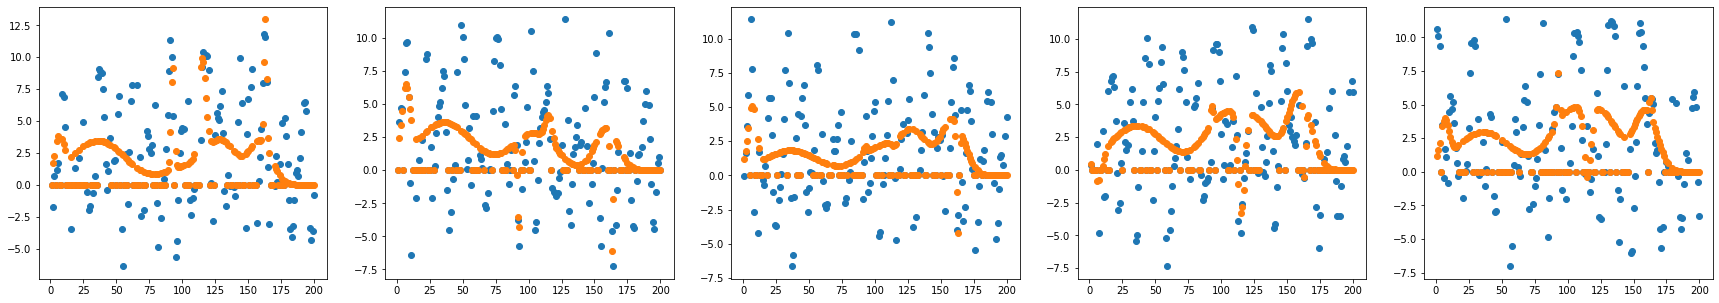

1th additional rbflayer
1th additional RBFlayer 0th epoch loss: 3.0453883620097746
1th additional RBFlayer 999th epoch value MAE Loss: 2.965200721818809
1th additional RBFlayer 1999th epoch value MAE Loss: 2.943458232112751
1th additional RBFlayer best loss : 2.943458232112751


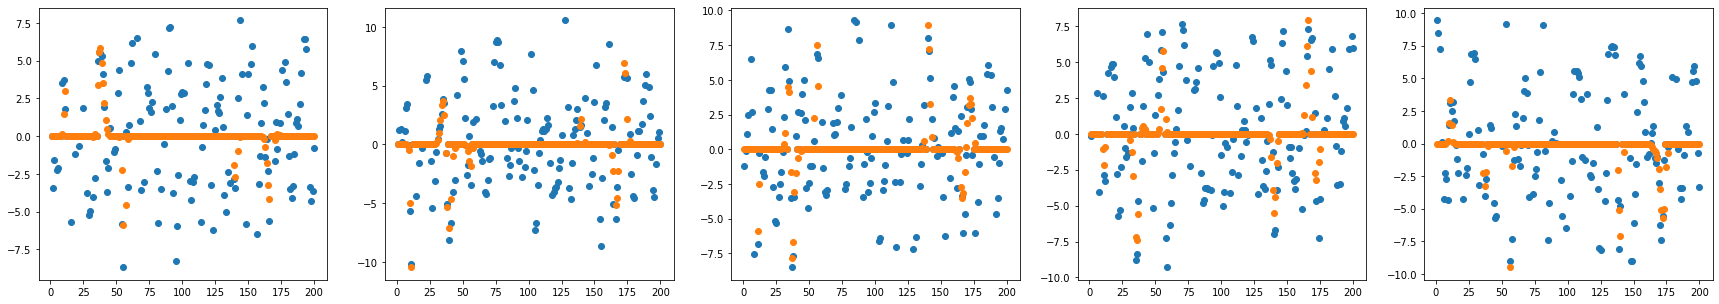

2th additional rbflayer
2th additional RBFlayer 0th epoch loss: 2.600838989125762
2th additional RBFlayer 999th epoch value MAE Loss: 2.5320716363948796
2th additional RBFlayer 1999th epoch value MAE Loss: 2.5281524095866823
2th additional RBFlayer best loss : 2.5281524095866823


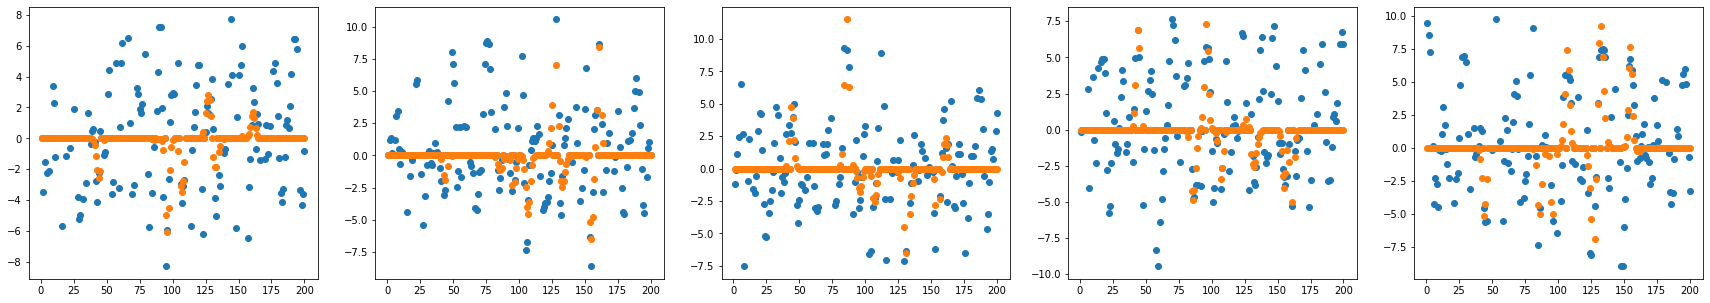

3th additional rbflayer
3th additional RBFlayer 0th epoch loss: 2.2324533240895192
3th additional RBFlayer 999th epoch value MAE Loss: 2.1684471782386057
3th additional RBFlayer 1999th epoch value MAE Loss: 2.1629005714291734
3th additional RBFlayer best loss : 2.1629005714291734


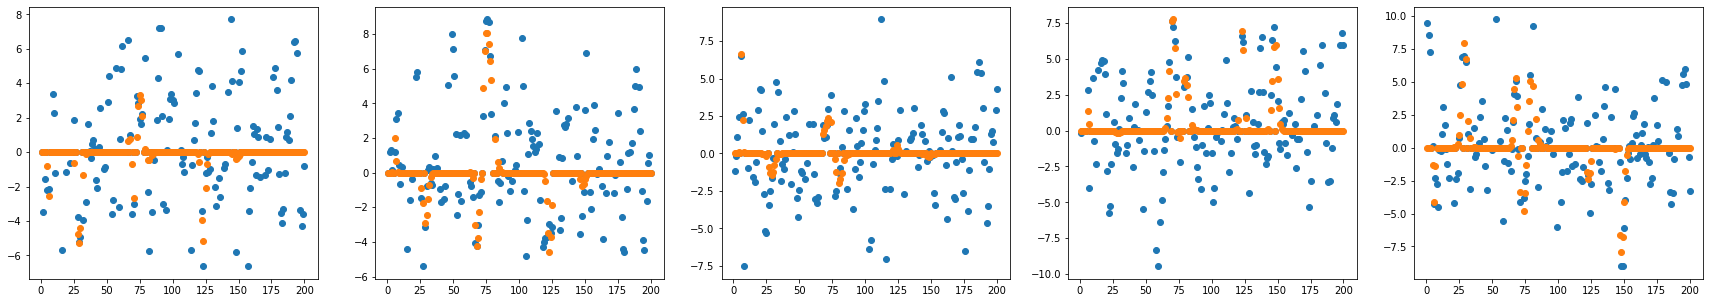

4th additional rbflayer
4th additional RBFlayer 0th epoch loss: 1.891903918471875
4th additional RBFlayer 999th epoch value MAE Loss: 1.8446589058421707
4th additional RBFlayer 1999th epoch value MAE Loss: 1.840488239974301
4th additional RBFlayer best loss : 1.840488239974301


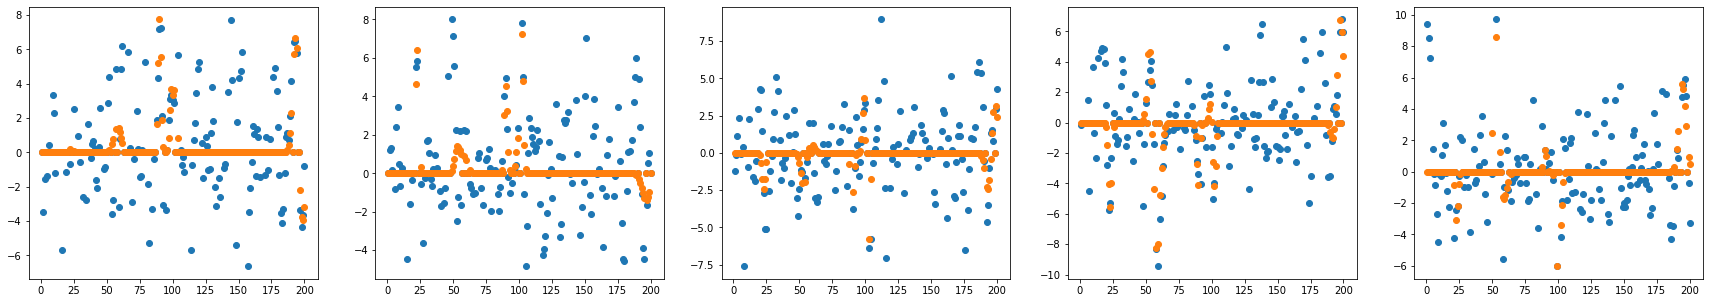

5th additional rbflayer
5th additional RBFlayer 0th epoch loss: 1.599119308951317
5th additional RBFlayer 999th epoch value MAE Loss: 1.5683784970309036
5th additional RBFlayer 1999th epoch value MAE Loss: 1.5672224651981657
5th additional RBFlayer best loss : 1.5672224651981657


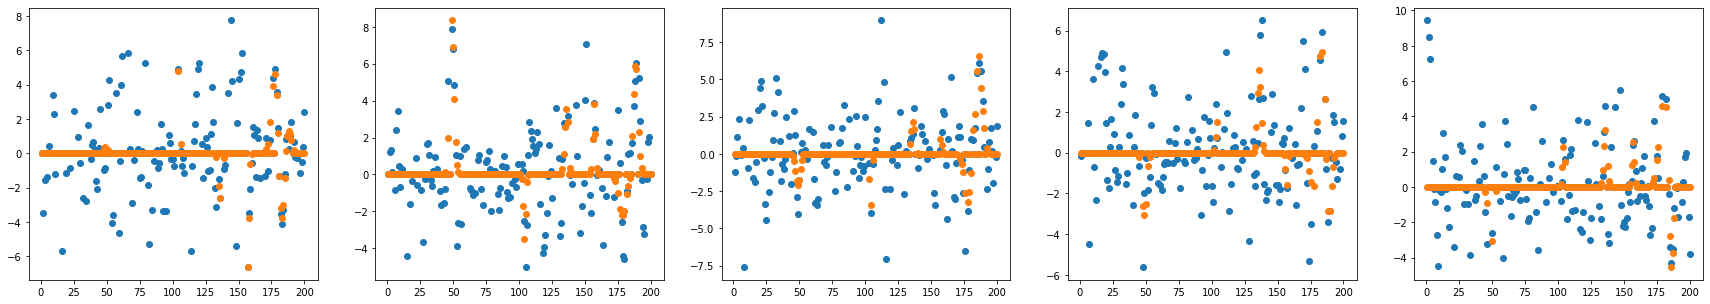

6th additional rbflayer
6th additional RBFlayer 0th epoch loss: 1.368677651338924
6th additional RBFlayer 999th epoch value MAE Loss: 1.3282568655838924
6th additional RBFlayer 1999th epoch value MAE Loss: 1.3222335319070315
6th additional RBFlayer best loss : 1.3222335319070315


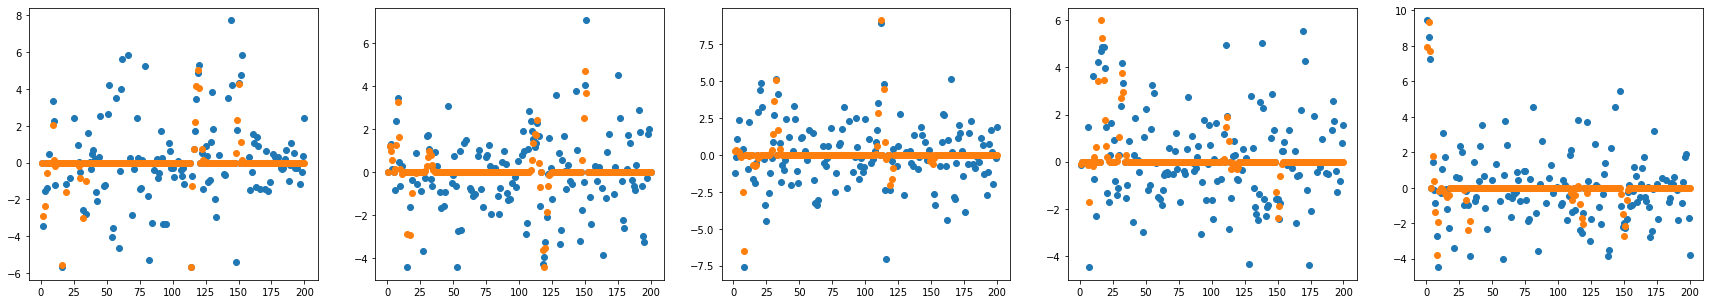

7th additional rbflayer
7th additional RBFlayer 0th epoch loss: 1.2177313480491159
7th additional RBFlayer 999th epoch value MAE Loss: 1.1789473750412427
7th additional RBFlayer 1999th epoch value MAE Loss: 1.1707111183848666
7th additional RBFlayer best loss : 1.1707111183848666


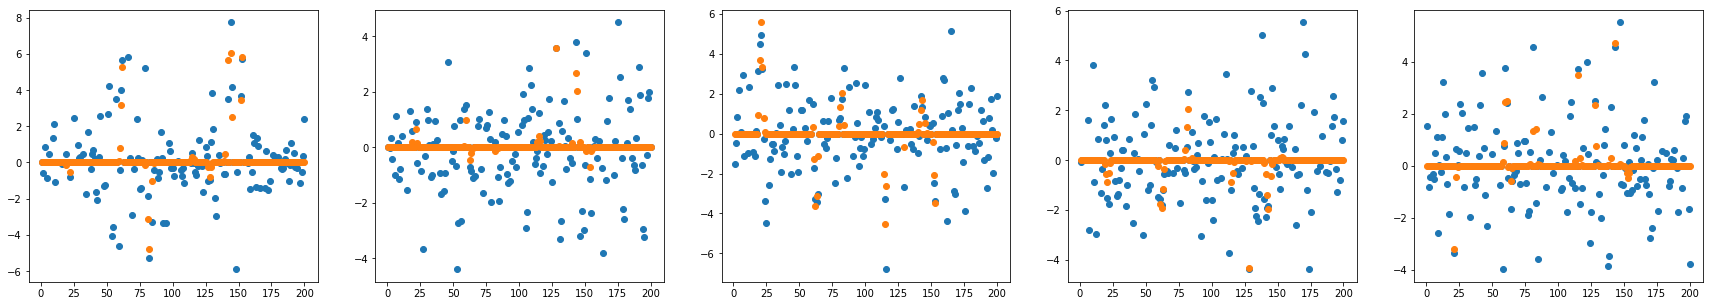

8th additional rbflayer
8th additional RBFlayer 0th epoch loss: 1.062526858840026
8th additional RBFlayer 999th epoch value MAE Loss: 1.0570457496585395
8th additional RBFlayer 1999th epoch value MAE Loss: 1.0526849318469065
8th additional RBFlayer best loss : 1.0510529003178637


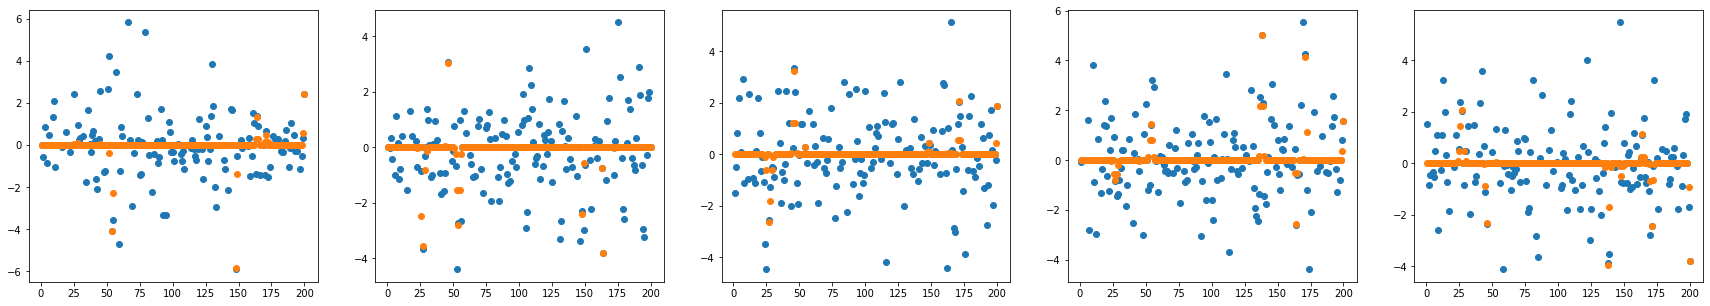

9th additional rbflayer
9th additional RBFlayer 0th epoch loss: 0.9621484417295177
9th additional RBFlayer 999th epoch value MAE Loss: 0.9506998488059538
9th additional RBFlayer 1999th epoch value MAE Loss: 0.9496873503652475
9th additional RBFlayer best loss : 0.9485891131428694


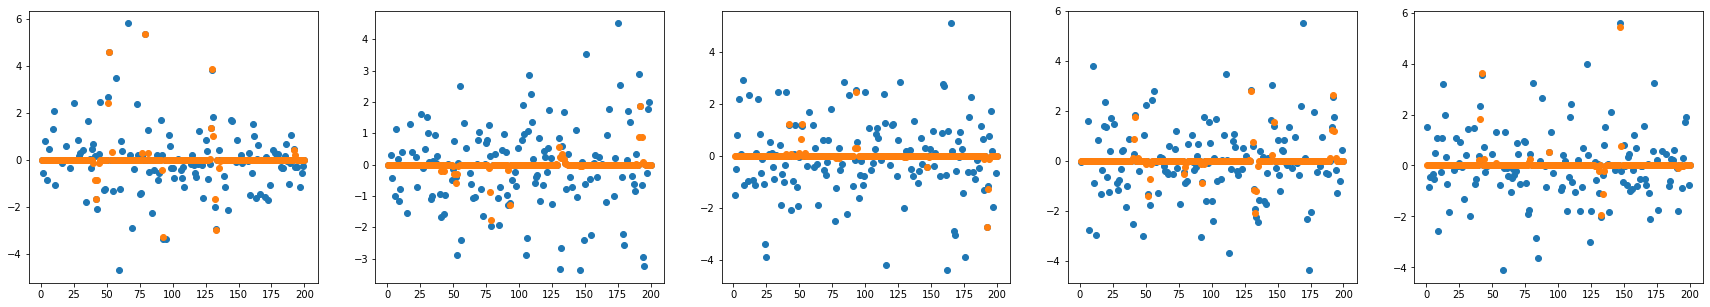

10th additional rbflayer
10th additional RBFlayer 0th epoch loss: 0.8933707075936296
10th additional RBFlayer 999th epoch value MAE Loss: 0.8621726055147253
10th additional RBFlayer 1999th epoch value MAE Loss: 0.8602359889567521
10th additional RBFlayer best loss : 0.8602359889567521


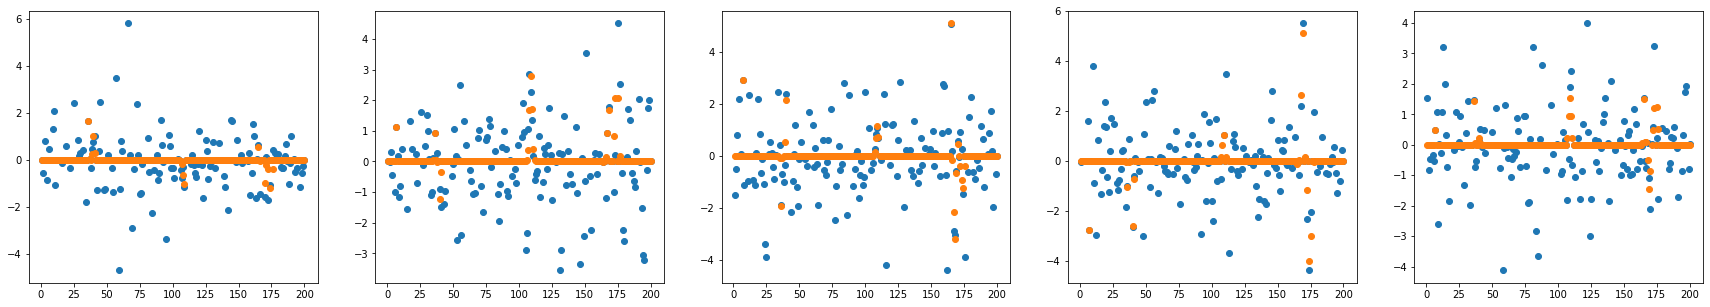

11th additional rbflayer
11th additional RBFlayer 0th epoch loss: 0.7966210168717447
11th additional RBFlayer 999th epoch value MAE Loss: 0.7778779249389648
11th additional RBFlayer 1999th epoch value MAE Loss: 0.7740930298871839
11th additional RBFlayer best loss : 0.7740930298871839


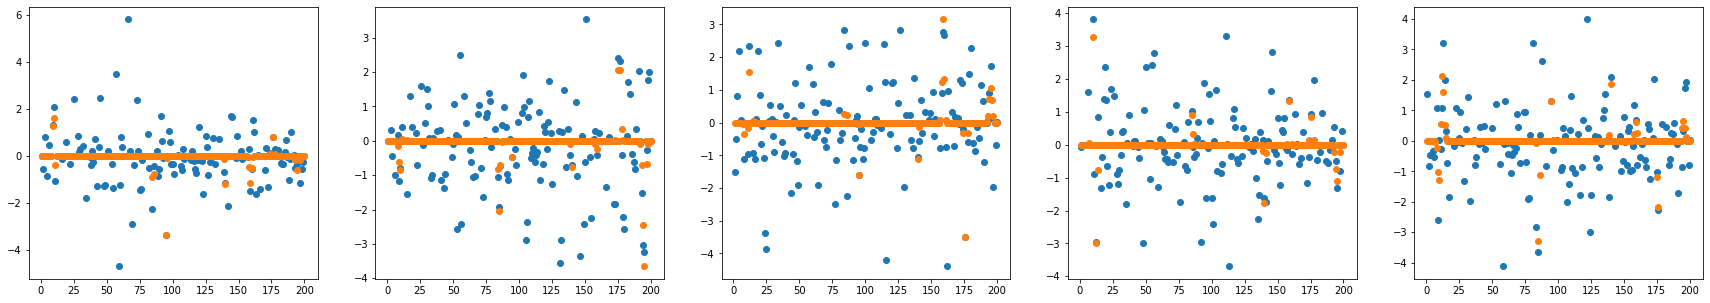

12th additional rbflayer
12th additional RBFlayer 0th epoch loss: 0.7233456596185526
12th additional RBFlayer 999th epoch value MAE Loss: 0.6953788418626207
12th additional RBFlayer 1999th epoch value MAE Loss: 0.6915885060104675
12th additional RBFlayer best loss : 0.6915885060104675


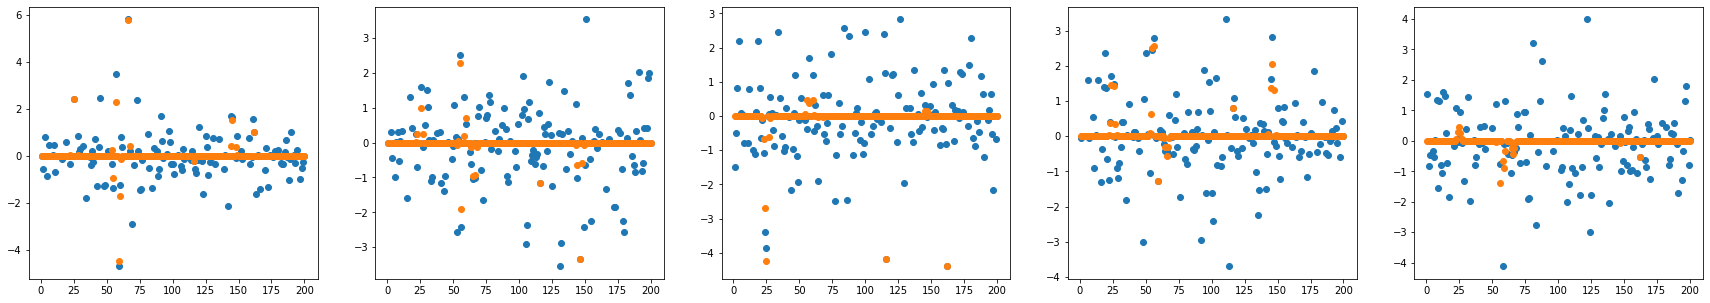

13th additional rbflayer
13th additional RBFlayer 0th epoch loss: 0.6287558602640052
13th additional RBFlayer 999th epoch value MAE Loss: 0.6179569341043116
13th additional RBFlayer 1999th epoch value MAE Loss: 0.617134063431132
13th additional RBFlayer best loss : 0.617134063431132


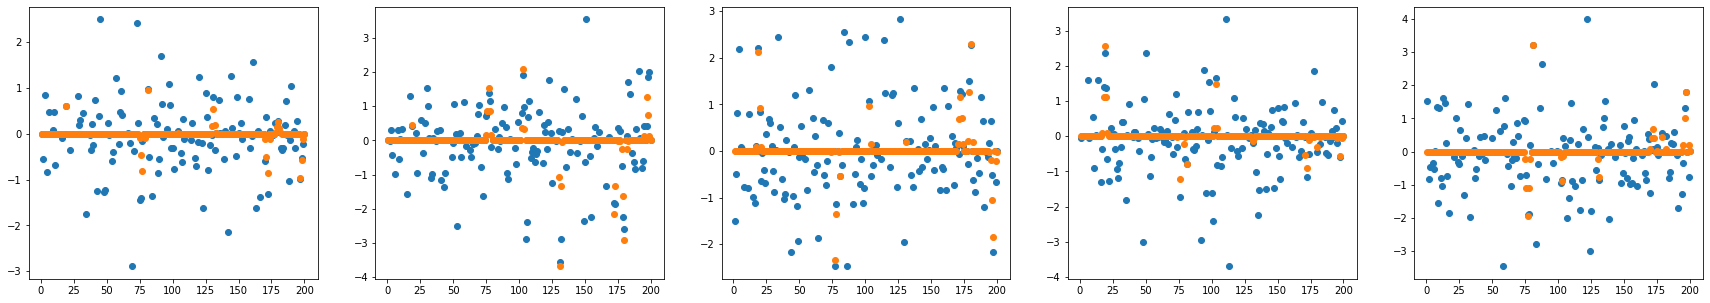

14th additional rbflayer
14th additional RBFlayer 0th epoch loss: 0.5801239368059353
14th additional RBFlayer 999th epoch value MAE Loss: 0.560528360126991
14th additional RBFlayer 1999th epoch value MAE Loss: 0.5596314801729197
14th additional RBFlayer best loss : 0.5596314801729197


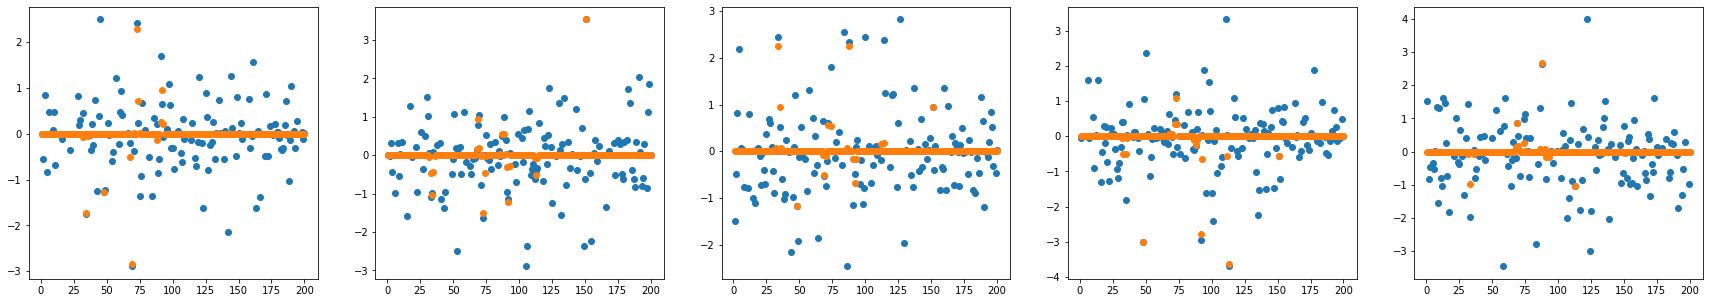

15th additional rbflayer
15th additional RBFlayer 0th epoch loss: 0.5368488918361932
15th additional RBFlayer 999th epoch value MAE Loss: 0.5117882398290352
15th additional RBFlayer 1999th epoch value MAE Loss: 0.5112128835961125
15th additional RBFlayer best loss : 0.5112128835961125


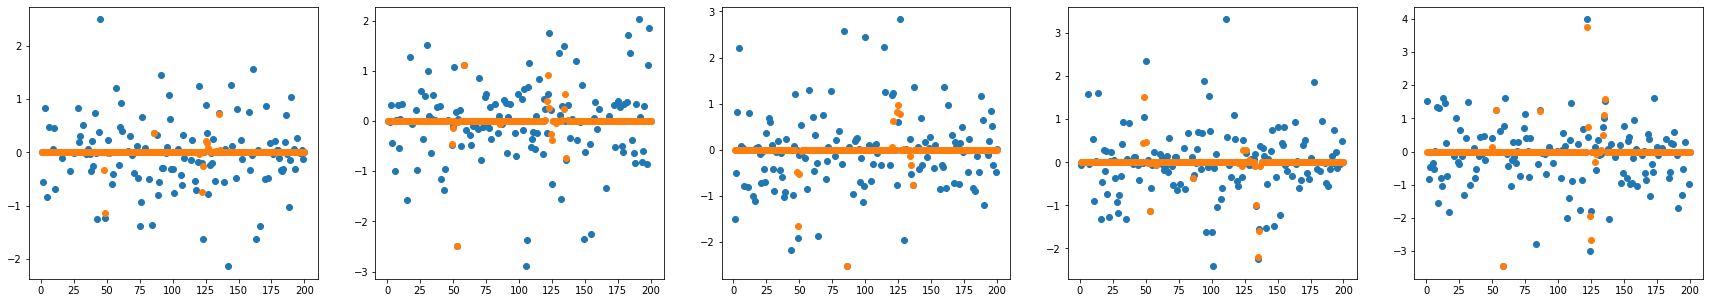

16th additional rbflayer
16th additional RBFlayer 0th epoch loss: 0.47955088035714216
16th additional RBFlayer 999th epoch value MAE Loss: 0.46581167089662084
16th additional RBFlayer 1999th epoch value MAE Loss: 0.46539716347098736
16th additional RBFlayer best loss : 0.46539716347098736


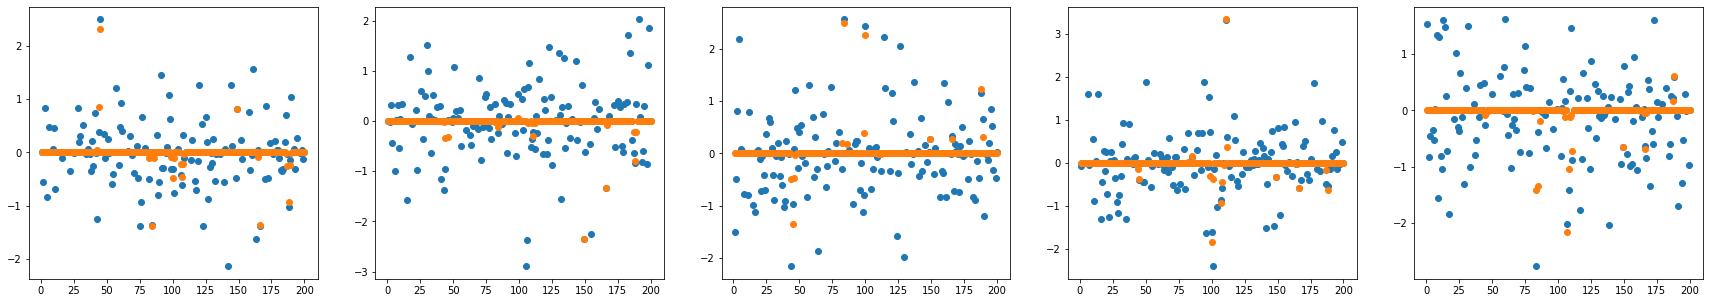

17th additional rbflayer
17th additional RBFlayer 0th epoch loss: 0.43874860637429314
17th additional RBFlayer 999th epoch value MAE Loss: 0.42504624802327456
17th additional RBFlayer 1999th epoch value MAE Loss: 0.42487946195763177
17th additional RBFlayer best loss : 0.42485219901526317


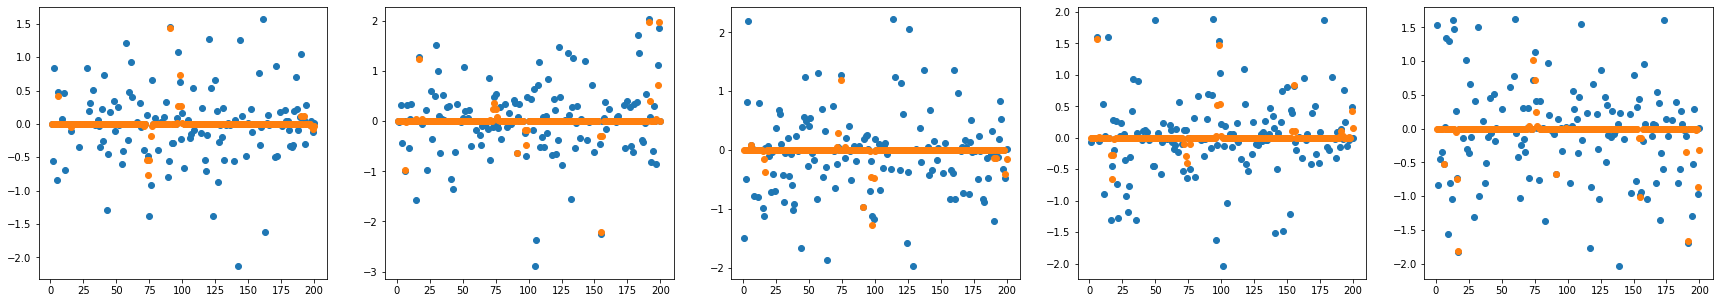

18th additional rbflayer
18th additional RBFlayer 0th epoch loss: 0.4007628671748529
18th additional RBFlayer 999th epoch value MAE Loss: 0.3829696234206075
18th additional RBFlayer 1999th epoch value MAE Loss: 0.3821751310969659
18th additional RBFlayer best loss : 0.3821751310969659


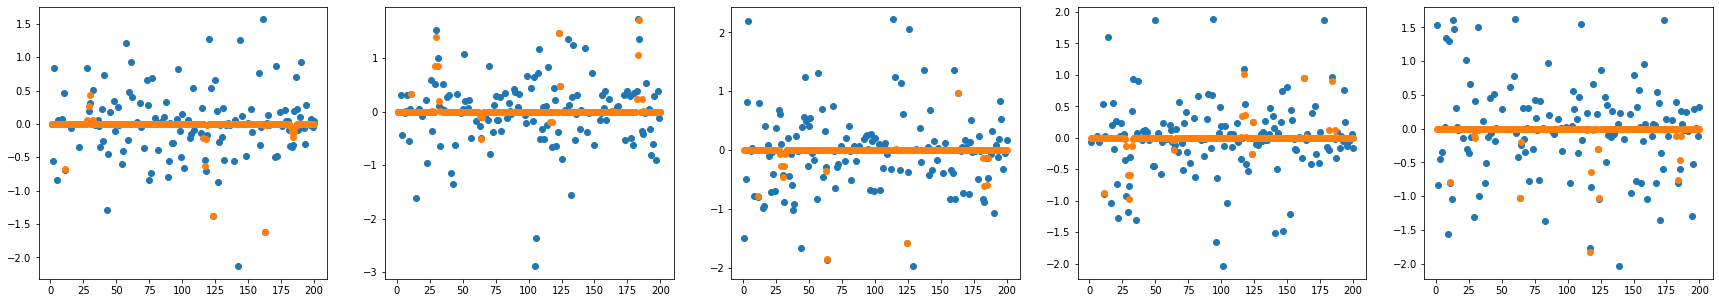

19th additional rbflayer
19th additional RBFlayer 0th epoch loss: 0.35891812167511566
19th additional RBFlayer 999th epoch value MAE Loss: 0.3473072080016443
19th additional RBFlayer 1999th epoch value MAE Loss: 0.3452891479064319
19th additional RBFlayer best loss : 0.3452891479064319


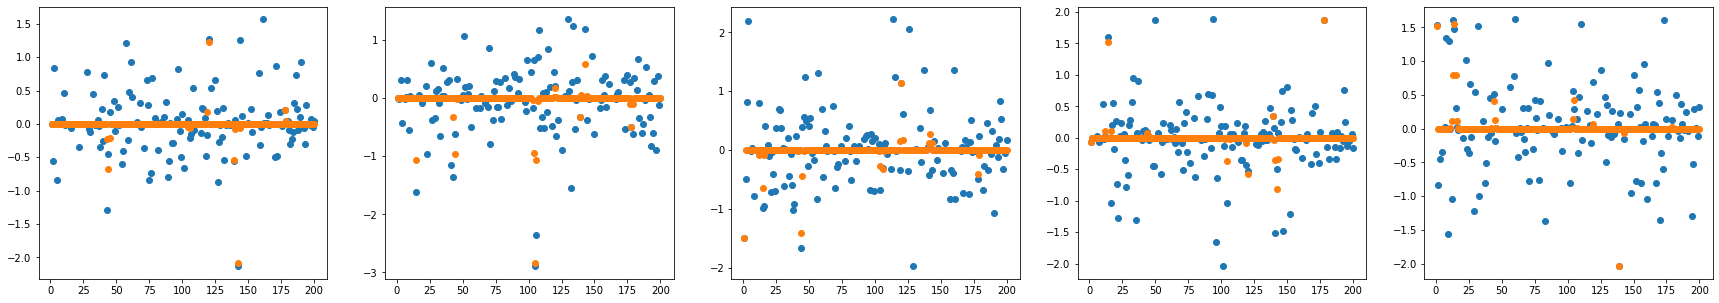

20th additional rbflayer
20th additional RBFlayer 0th epoch loss: 0.3358948457237647
20th additional RBFlayer 999th epoch value MAE Loss: 0.31756959110649297
20th additional RBFlayer 1999th epoch value MAE Loss: 0.31665209470776096
20th additional RBFlayer best loss : 0.31665209470776096


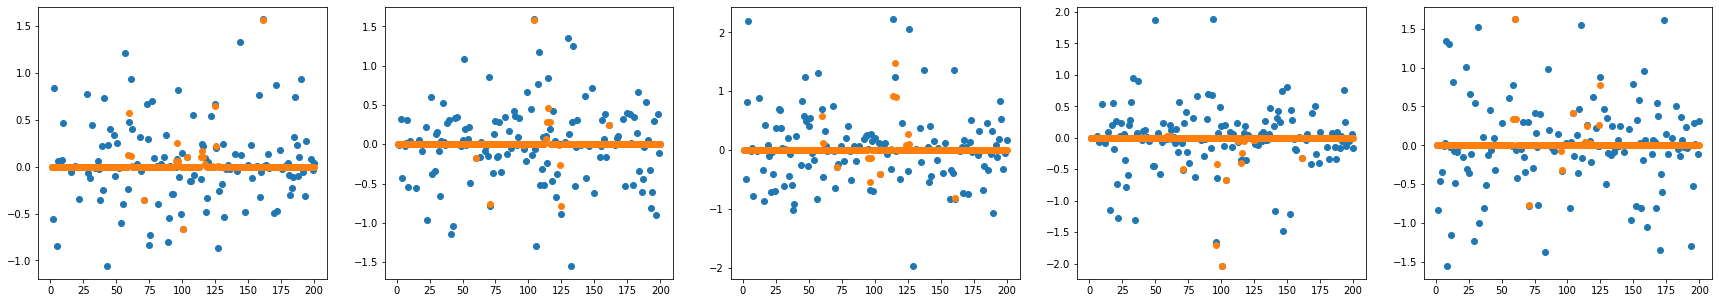

21th additional rbflayer
21th additional RBFlayer 0th epoch loss: 0.30222265213539895
21th additional RBFlayer 999th epoch value MAE Loss: 0.2877874216699007
21th additional RBFlayer 1999th epoch value MAE Loss: 0.2869041727746618
21th additional RBFlayer best loss : 0.2869041727746618


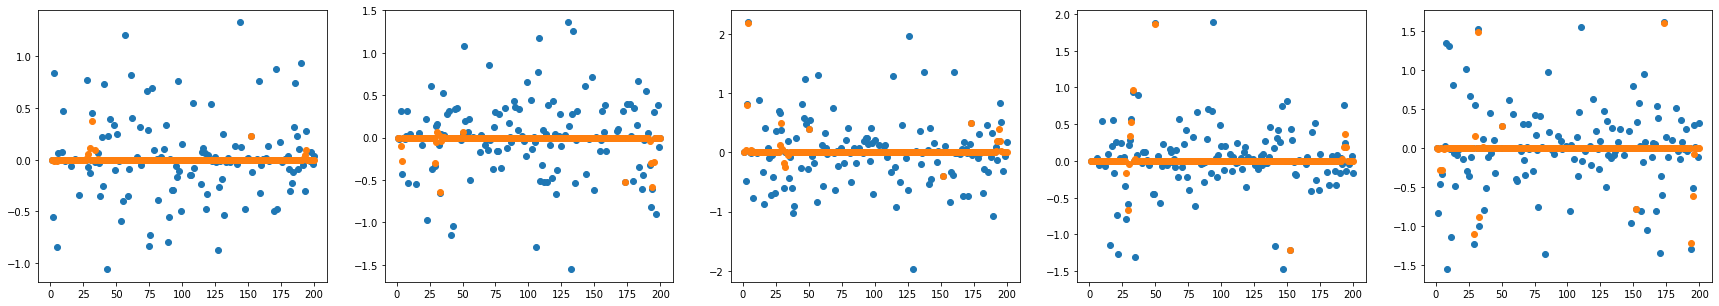

22th additional rbflayer
22th additional RBFlayer 0th epoch loss: 0.2750065912167357
22th additional RBFlayer 999th epoch value MAE Loss: 0.2634367100600116
22th additional RBFlayer 1999th epoch value MAE Loss: 0.26249269550645116
22th additional RBFlayer best loss : 0.26249269550645116


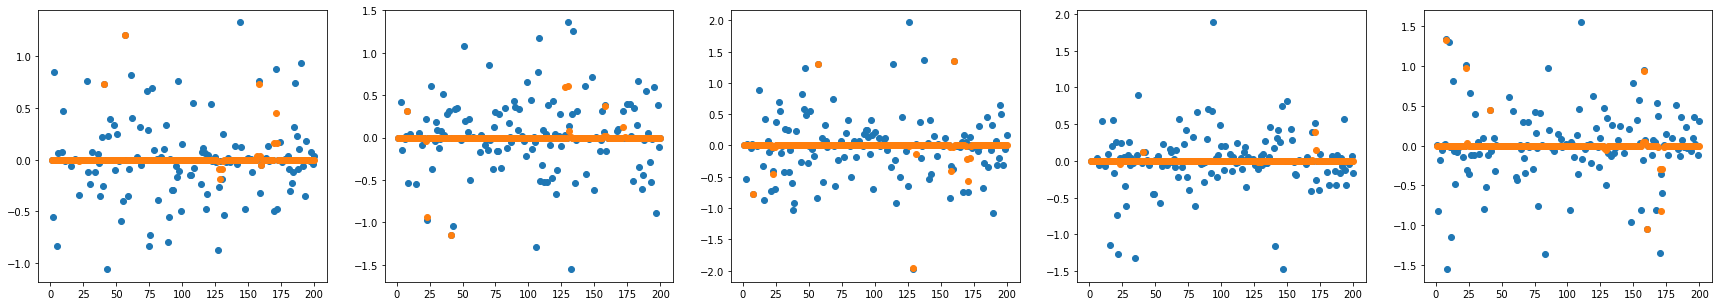

23th additional rbflayer
23th additional RBFlayer 0th epoch loss: 0.25376844420666095
23th additional RBFlayer 999th epoch value MAE Loss: 0.2390756556820149
23th additional RBFlayer 1999th epoch value MAE Loss: 0.23749589106254979
23th additional RBFlayer best loss : 0.23749589106254979


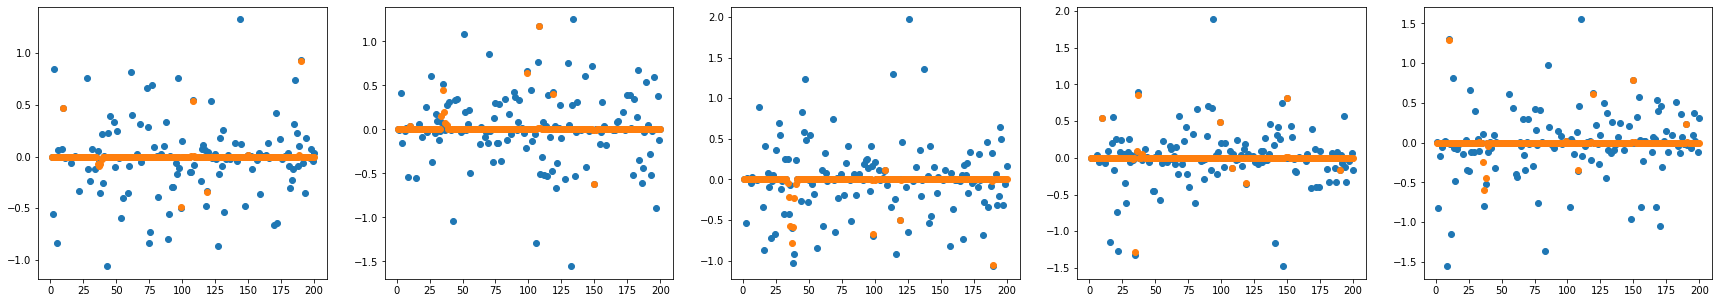

24th additional rbflayer
24th additional RBFlayer 0th epoch loss: 0.22876246553006271
24th additional RBFlayer 999th epoch value MAE Loss: 0.21551604879724925
24th additional RBFlayer 1999th epoch value MAE Loss: 0.21432569523718495
24th additional RBFlayer best loss : 0.21432569523718495


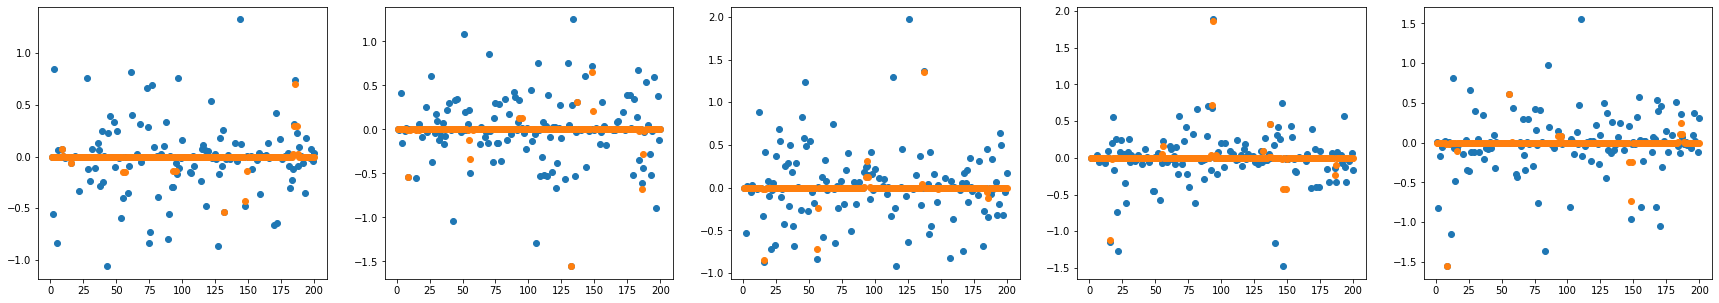

25th additional rbflayer
25th additional RBFlayer 0th epoch loss: 0.20679150894710174
25th additional RBFlayer 999th epoch value MAE Loss: 0.19403979923330827
25th additional RBFlayer 1999th epoch value MAE Loss: 0.1922598407451016
25th additional RBFlayer best loss : 0.1922598407451016


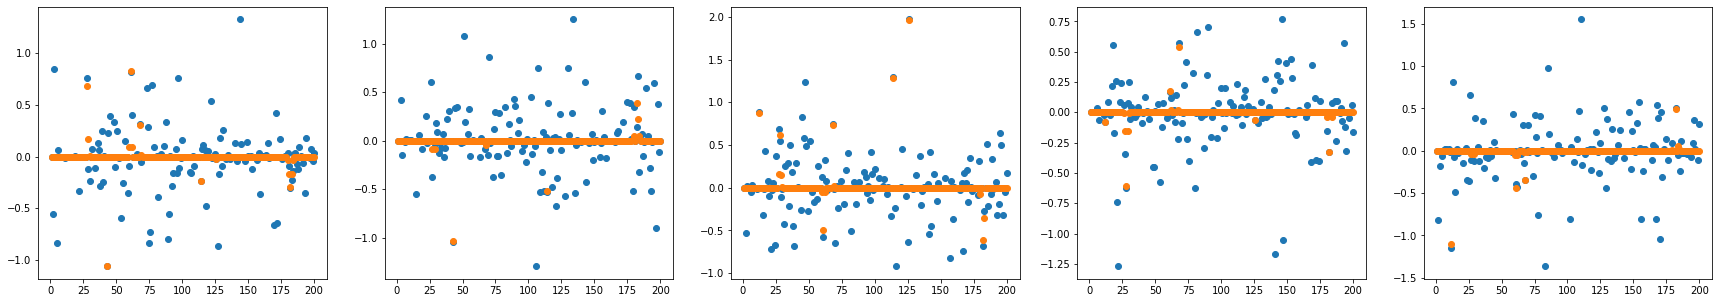

26th additional rbflayer
26th additional RBFlayer 0th epoch loss: 0.18880417190822485
26th additional RBFlayer 999th epoch value MAE Loss: 0.17653786501079274
26th additional RBFlayer 1999th epoch value MAE Loss: 0.17327559459317424
26th additional RBFlayer best loss : 0.17327559459317424


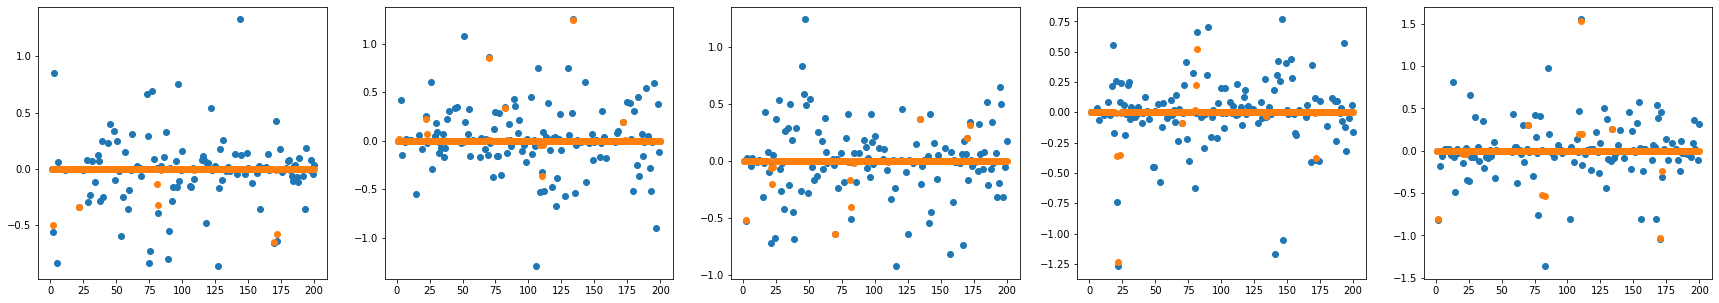

27th additional rbflayer
27th additional RBFlayer 0th epoch loss: 0.1654418041311224
27th additional RBFlayer 999th epoch value MAE Loss: 0.15557614212907678
27th additional RBFlayer 1999th epoch value MAE Loss: 0.1545318244440211
27th additional RBFlayer best loss : 0.1545318244440211


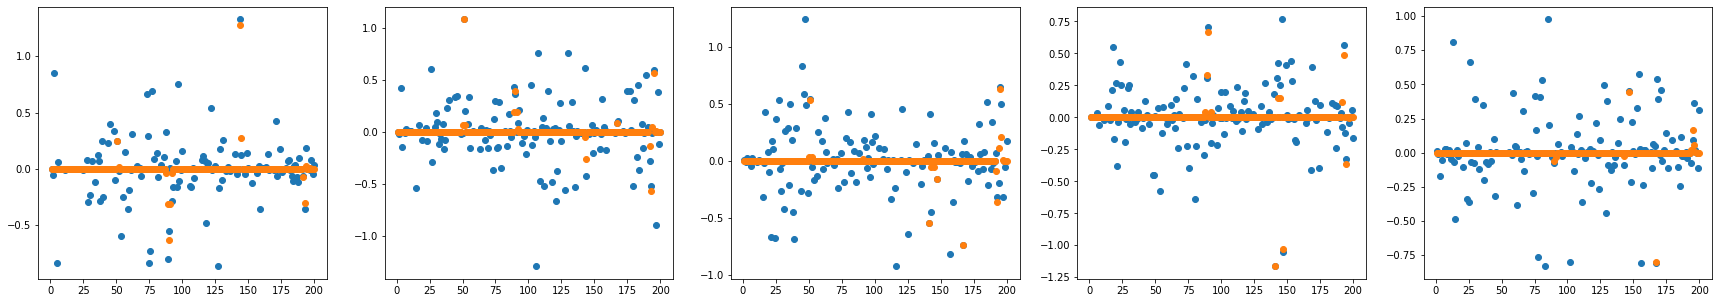

28th additional rbflayer
28th additional RBFlayer 0th epoch loss: 0.14740254324149835
28th additional RBFlayer 999th epoch value MAE Loss: 0.1398745289240699
28th additional RBFlayer 1999th epoch value MAE Loss: 0.13858243663284983
28th additional RBFlayer best loss : 0.13858243663284983


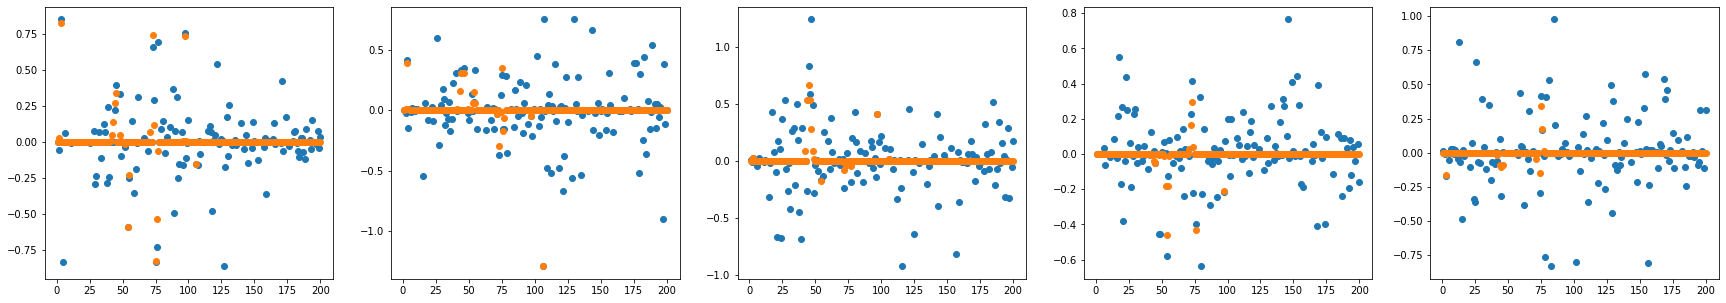

29th additional rbflayer
29th additional RBFlayer 0th epoch loss: 0.13481521704159816
29th additional RBFlayer 999th epoch value MAE Loss: 0.13147002737761293
29th additional RBFlayer 1999th epoch value MAE Loss: 0.12955253633451266
29th additional RBFlayer best loss : 0.12955253633451266


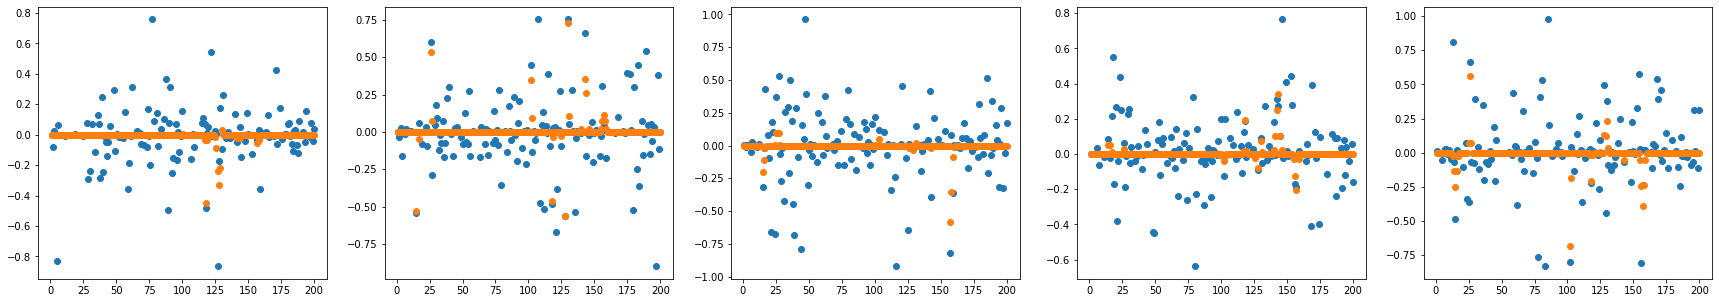

30th additional rbflayer
30th additional RBFlayer 0th epoch loss: 0.12508933404244874
30th additional RBFlayer 999th epoch value MAE Loss: 0.12104682977876845
30th additional RBFlayer 1999th epoch value MAE Loss: 0.1183275589423503
30th additional RBFlayer best loss : 0.1183275589423503


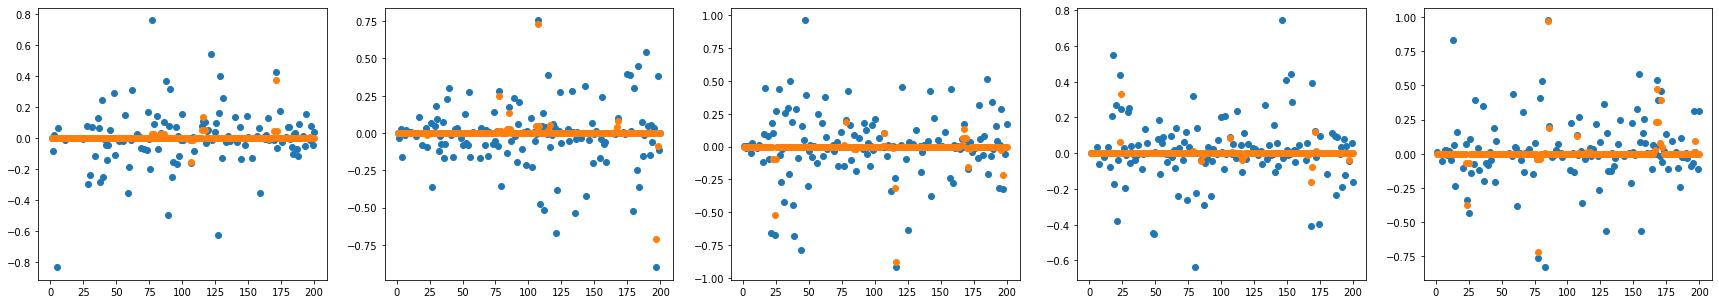

In [9]:
model_time2 = MultiRBFnnTime(5, 8, device)
model_time2.train(input_data3, target3, 2000, 1e-3, lossth3, 1e-6)

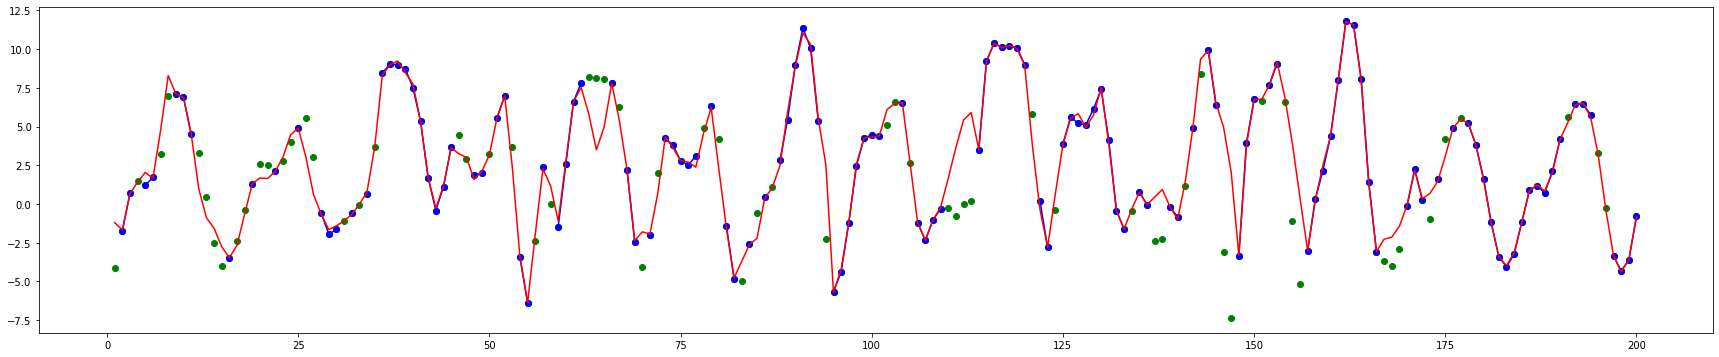

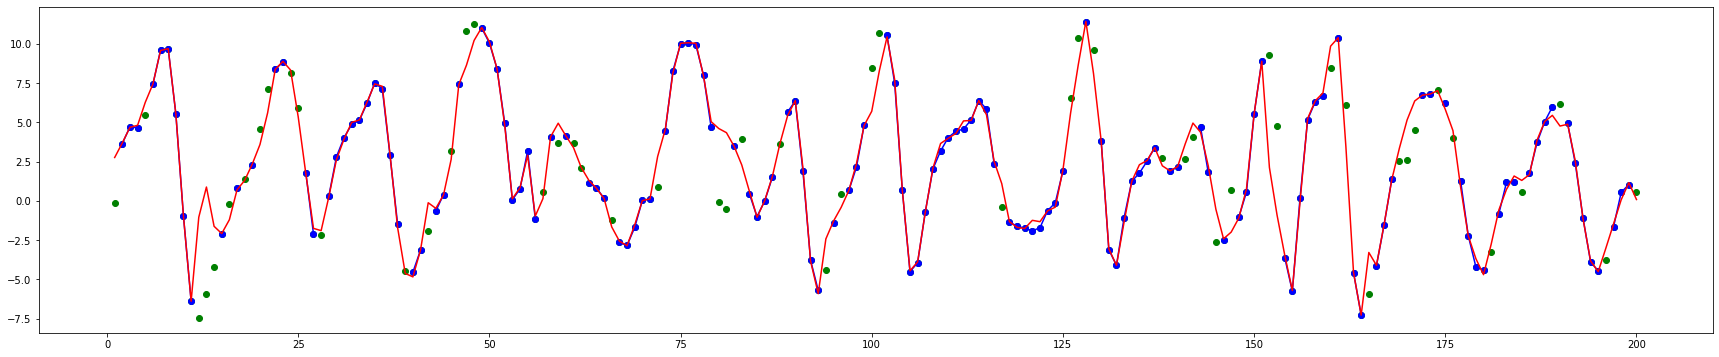

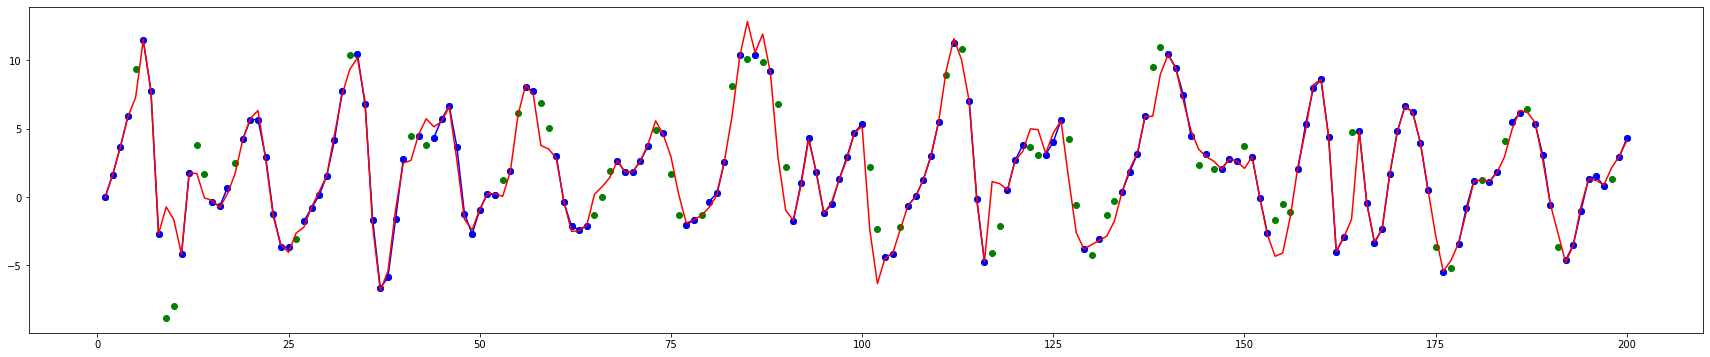

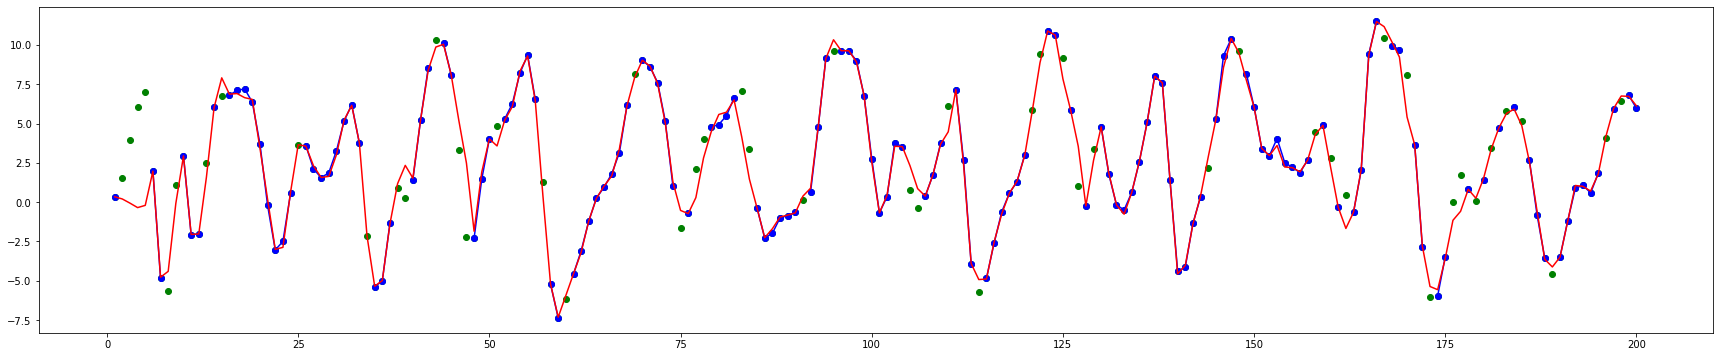

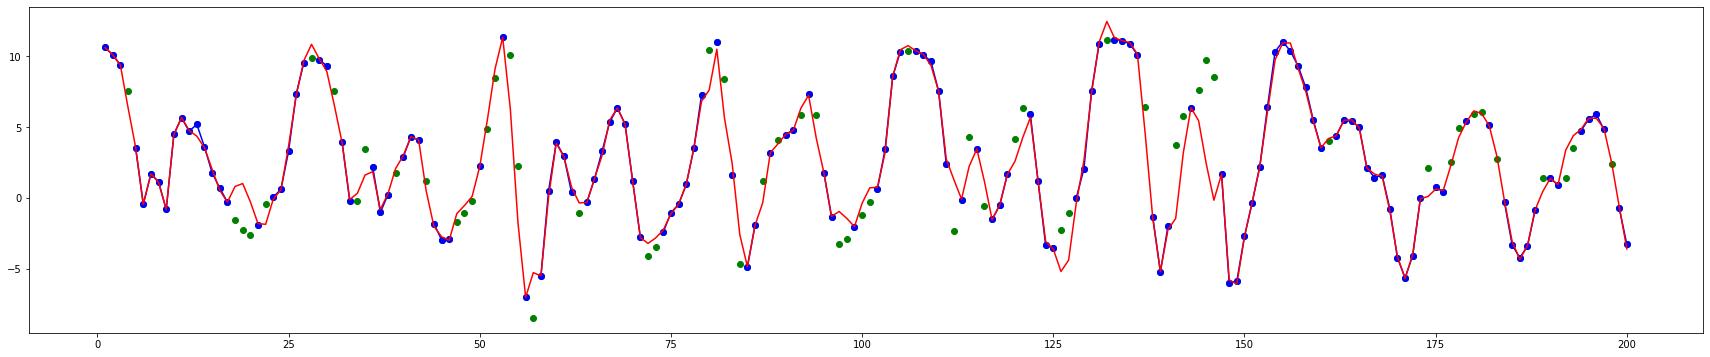

In [10]:
import matplotlib.pyplot as plt
pred_short = model_time2.pred(input_data3)[1]
for i in range(5):
    plt.figure(figsize=(30, 6))
    plt.scatter(input_data3.cpu().detach().numpy(), target_ground3[i].cpu().detach().numpy(), c = 'green')
    plt.scatter(input_data3.cpu().detach().numpy(), target3[i].cpu().detach().numpy(), c = 'blue')
    plt.plot(input_data3.cpu().detach().numpy(), target3[i].cpu().detach().numpy(), c = 'blue')
    plt.plot(input_data3.cpu().detach().numpy(), pred_short[i].cpu().detach().numpy(), c = 'red')
    plt.show()

In [11]:
def rbf_train_flow(model):
    aaa = []
    for j in range(31):
        center = model.train_center_list[j*5:(j+1) * 5]
        sigma = model.train_sigma_list[j*5:(j+1) * 5]
        weight = model.train_weight_list[j*5:(j+1) * 5]
        rbf_list = []
        for i in range(len(center)):
            rbf_output = torch.exp(-1 * (torch.pow((input_data3 - center[i]), 2) / \
                                            (torch.pow(sigma[i], 2))))
            pred = torch.mm(weight[i], rbf_output)
            rbf_list.append(pred)
        aaa.append(rbf_list)
    for i in range(31):
        if i ==0:
            a = torch.cat(aaa[i], axis = 0).reshape(5,5,200) 
        else:
            a += torch.cat(aaa[i], axis = 0).reshape(5,5,200)

    return a

In [12]:
ccc = rbf_train_flow(model_time2)

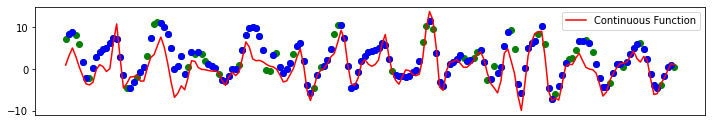

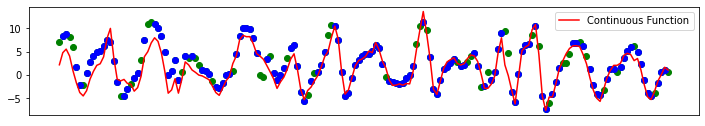

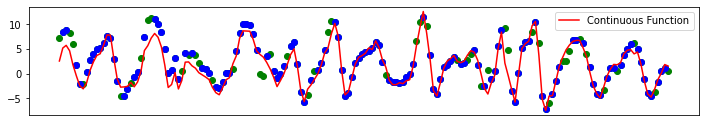

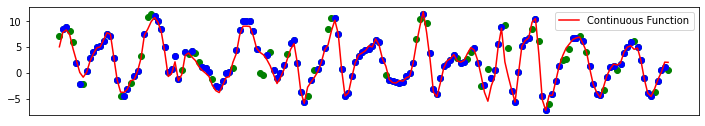

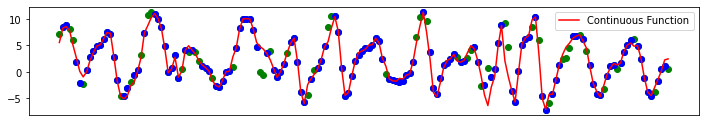

In [34]:
import matplotlib.pyplot as plt
num_feature = 1
for i in range(len(ccc)):
    plt.figure(figsize=(12, 2))
    plt.scatter(input_data3[:-20].cpu().detach().numpy(), target_ground3[num_feature][20:].cpu().detach().numpy(), c = 'green')
    plt.scatter(input_data3[:-20].cpu().detach().numpy(), target3[num_feature][20:].cpu().detach().numpy(), c = 'blue')
    plt.plot(input_data3[:-20].cpu().detach().numpy(), ccc[i][num_feature][20:].cpu().detach().numpy(), c = 'red',label = "Continuous Function")
    #plt.ylim(-5,20)
    # plt.xlim(, 200)
    plt.gca().axes.xaxis.set_visible(False)#x범위 없애기
    plt.legend()
    plt.savefig('RBFablation_time_{}.png'.format(i *500))
    plt.show()

0th additional rbflayer
0th additional RBFlayer 0th epoch loss: 3.5745678943958192
0th additional RBFlayer 999th epoch value MAE Loss: 3.398315659570703
0th additional RBFlayer 1999th epoch value MAE Loss: 3.320749635679261
0th additional RBFlayer best loss : 3.320749635679261


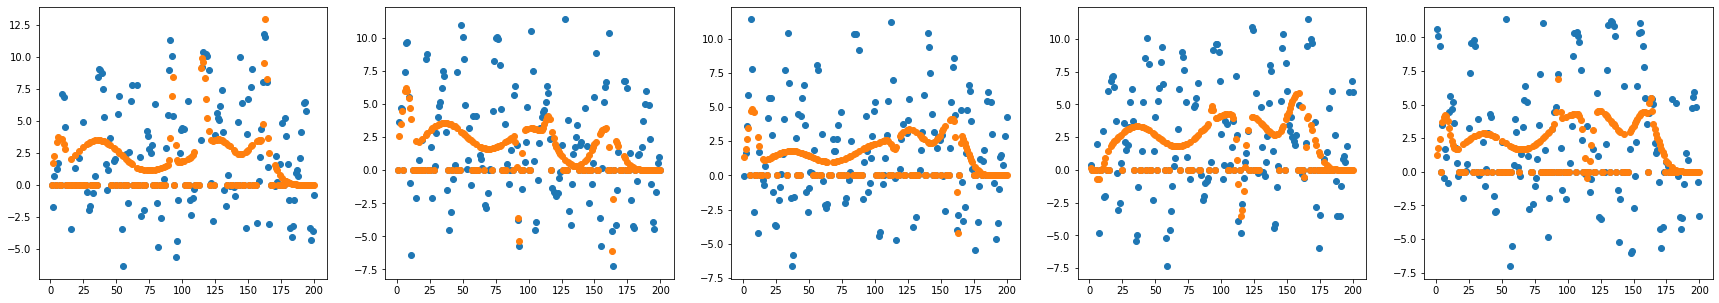

1th additional rbflayer
1th additional RBFlayer 0th epoch loss: 3.0032577701259187
1th additional RBFlayer 999th epoch value MAE Loss: 2.91776669840886
1th additional RBFlayer 1999th epoch value MAE Loss: 2.910410704952779
1th additional RBFlayer best loss : 2.910410704952779


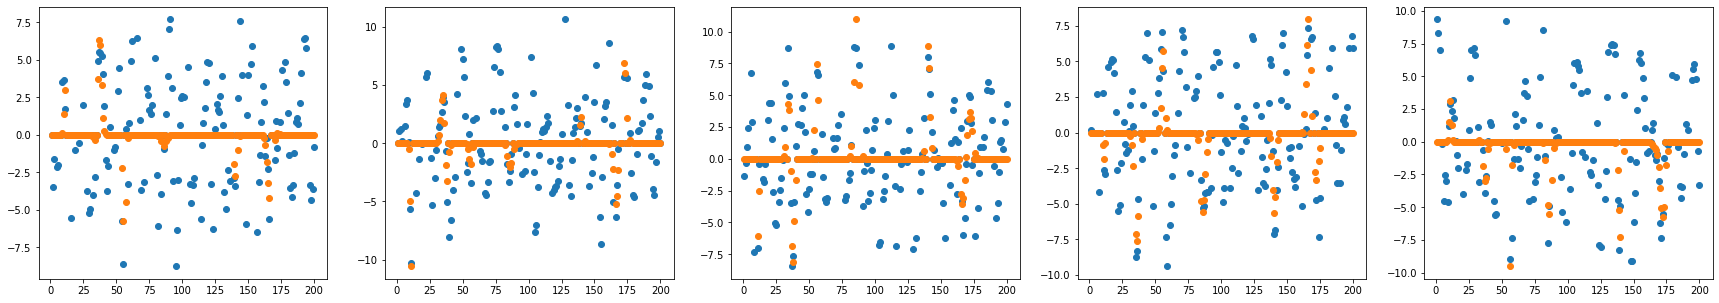

2th additional rbflayer
2th additional RBFlayer 0th epoch loss: 2.649238393141683
2th additional RBFlayer 999th epoch value MAE Loss: 2.5446326657607385
2th additional RBFlayer 1999th epoch value MAE Loss: 2.5411877419063633
2th additional RBFlayer best loss : 2.5411877419063633


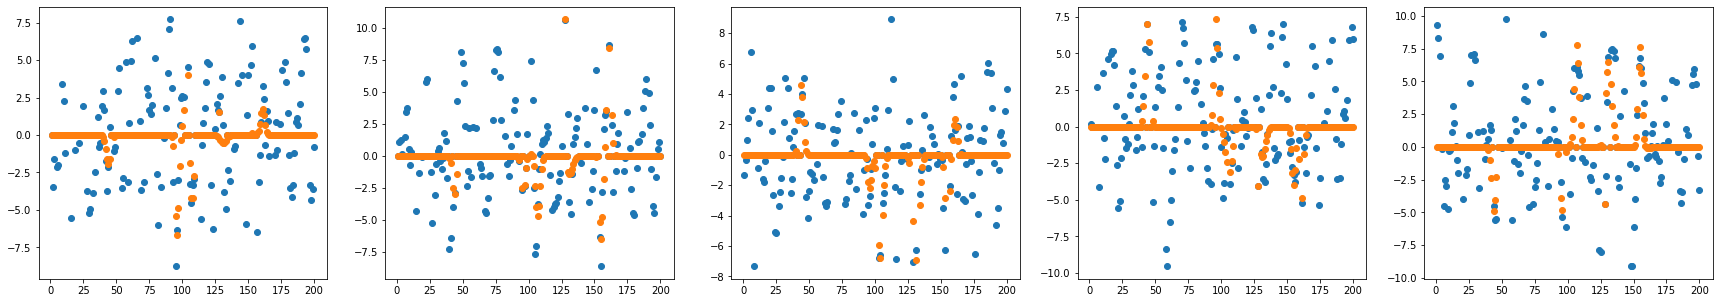

3th additional rbflayer
3th additional RBFlayer 0th epoch loss: 2.318441974310145
3th additional RBFlayer 999th epoch value MAE Loss: 2.265990382449586
3th additional RBFlayer 1999th epoch value MAE Loss: 2.26197941277685
3th additional RBFlayer best loss : 2.26197941277685


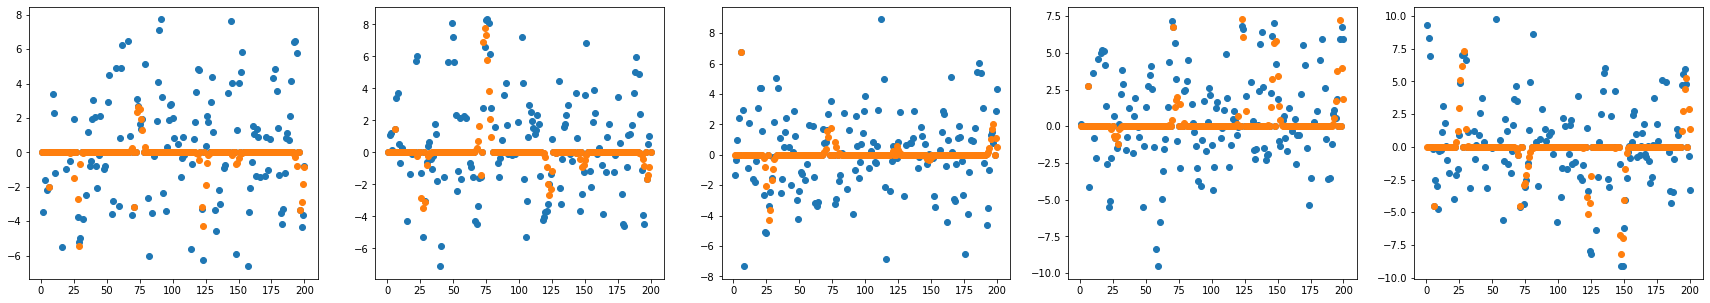

4th additional rbflayer
4th additional RBFlayer 0th epoch loss: 2.0374981105347936
4th additional RBFlayer 999th epoch value MAE Loss: 1.973145497255851
4th additional RBFlayer 1999th epoch value MAE Loss: 1.9718395281809336
4th additional RBFlayer best loss : 1.9718395281809336


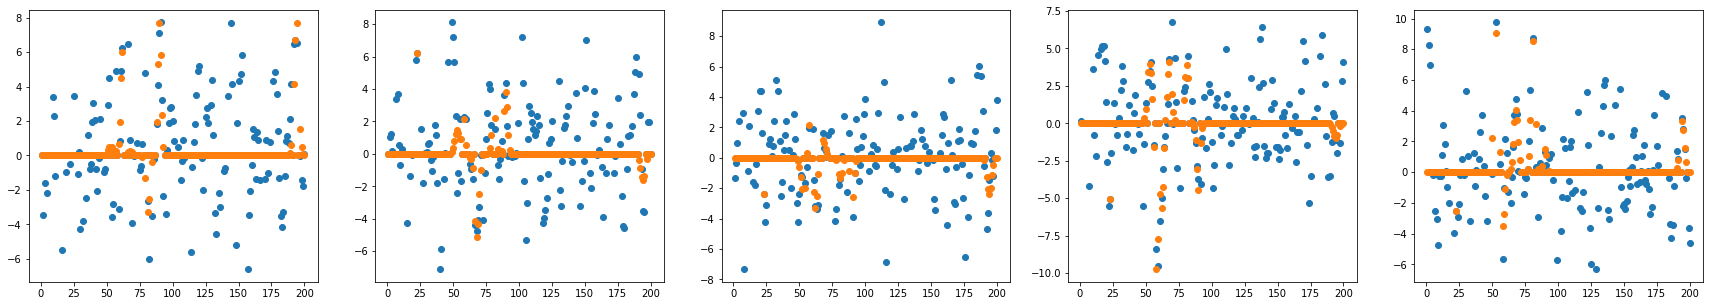

5th additional rbflayer
5th additional RBFlayer 0th epoch loss: 1.7582254278558842
5th additional RBFlayer 999th epoch value MAE Loss: 1.7243942249151945
5th additional RBFlayer 1999th epoch value MAE Loss: 1.7231850096931347
5th additional RBFlayer best loss : 1.7224664822963476


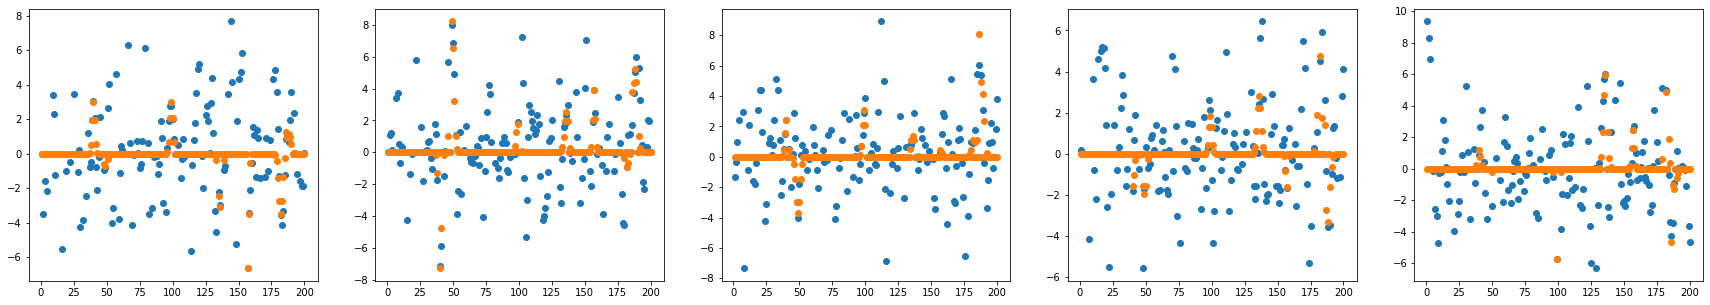

6th additional rbflayer
6th additional RBFlayer 0th epoch loss: 1.553079865966232
6th additional RBFlayer 999th epoch value MAE Loss: 1.5046738949023055
6th additional RBFlayer 1999th epoch value MAE Loss: 1.4982128814659044
6th additional RBFlayer best loss : 1.4974250918922074


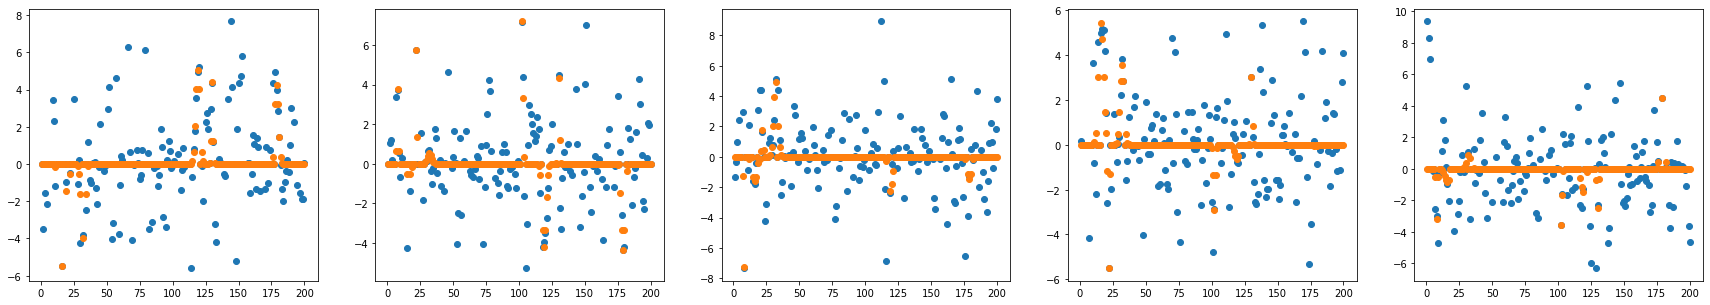

7th additional rbflayer
7th additional RBFlayer 0th epoch loss: 1.35812129685957
7th additional RBFlayer 999th epoch value MAE Loss: 1.3314951459982183
7th additional RBFlayer 1999th epoch value MAE Loss: 1.3265851711352519
7th additional RBFlayer best loss : 1.3265851711352519


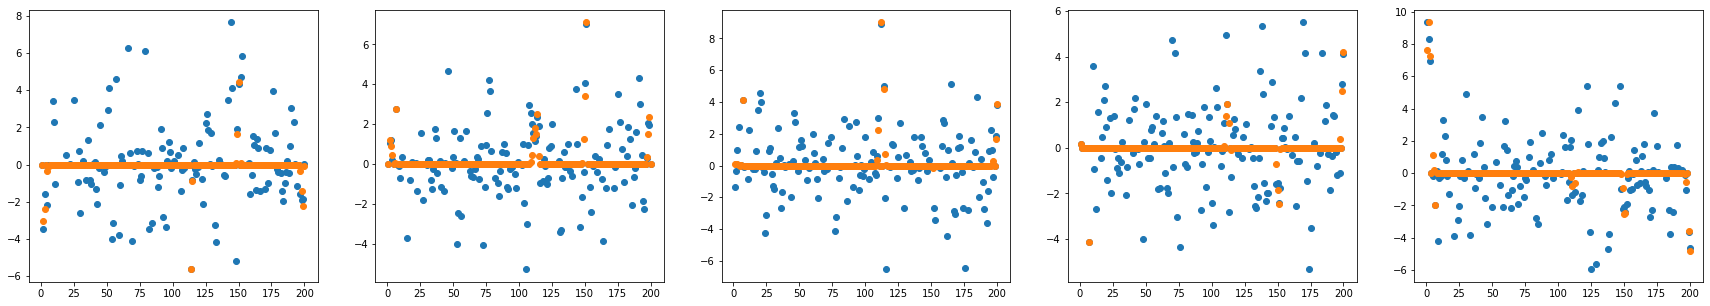

8th additional rbflayer
8th additional RBFlayer 0th epoch loss: 1.218524947879371
8th additional RBFlayer 999th epoch value MAE Loss: 1.1589664088600862
8th additional RBFlayer 1999th epoch value MAE Loss: 1.1571315018316837
8th additional RBFlayer best loss : 1.1571315018316837


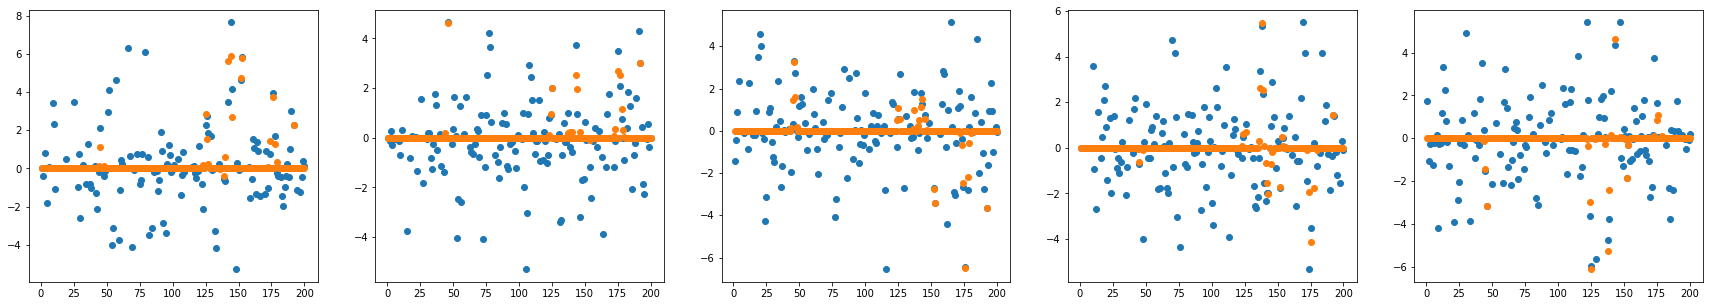

9th additional rbflayer
9th additional RBFlayer 0th epoch loss: 1.0650018781832447
9th additional RBFlayer 999th epoch value MAE Loss: 1.0449959216734792
9th additional RBFlayer 1999th epoch value MAE Loss: 1.0432944986718442
9th additional RBFlayer best loss : 1.0426677832915825


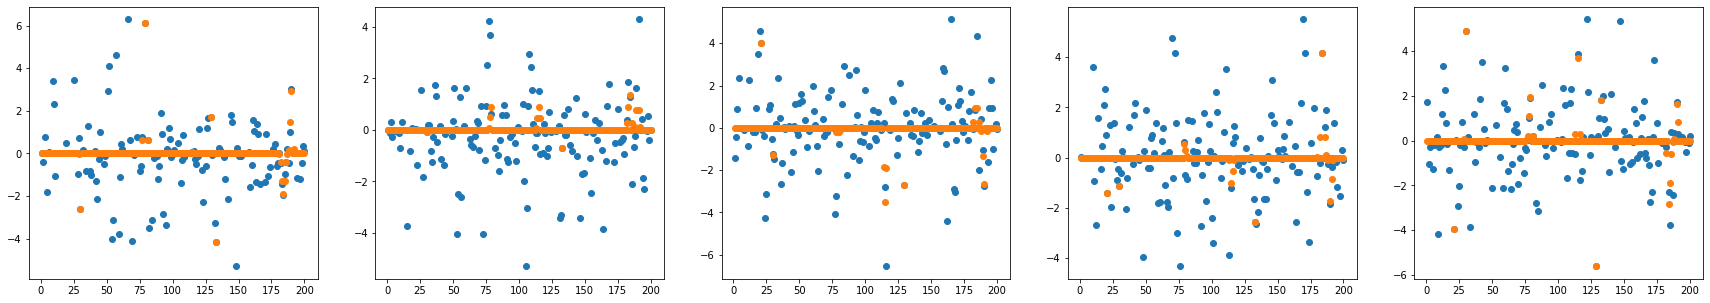

10th additional rbflayer
10th additional RBFlayer 0th epoch loss: 0.9365390738632184
10th additional RBFlayer 999th epoch value MAE Loss: 0.9352759307726038
10th additional RBFlayer 1999th epoch value MAE Loss: 0.9353677246117753
10th additional RBFlayer best loss : 0.9345198703760889


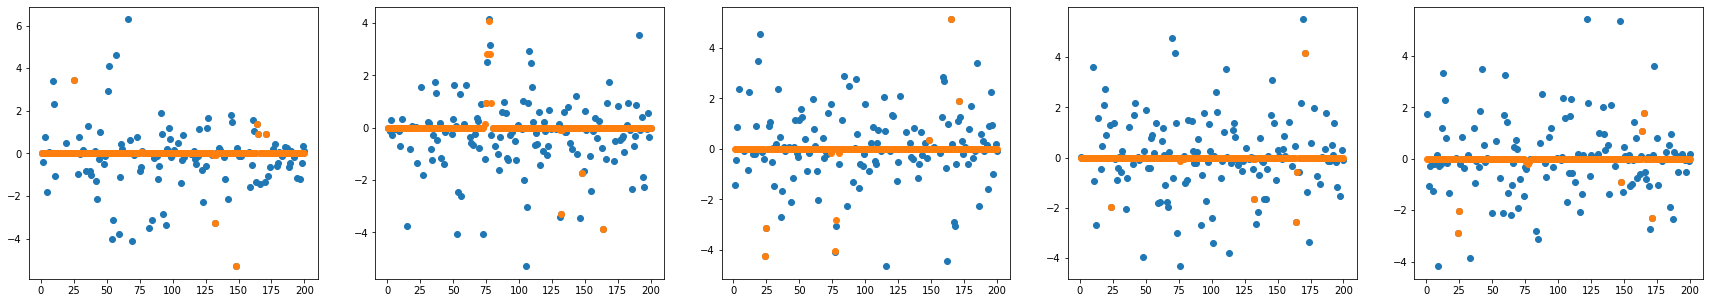

11th additional rbflayer
11th additional RBFlayer 0th epoch loss: 0.8559067062413368
11th additional RBFlayer 999th epoch value MAE Loss: 0.8446036936593172
11th additional RBFlayer 1999th epoch value MAE Loss: 0.8441386653072793
11th additional RBFlayer best loss : 0.8424445398797968


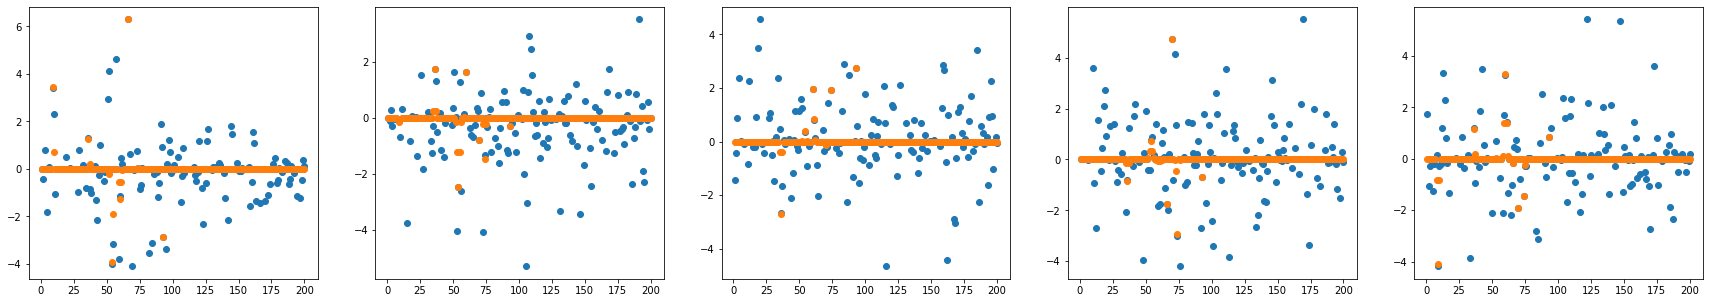

12th additional rbflayer
12th additional RBFlayer 0th epoch loss: 0.7633191026309691
12th additional RBFlayer 999th epoch value MAE Loss: 0.7634781172726177
12th additional RBFlayer 1999th epoch value MAE Loss: 0.7627629613361272
12th additional RBFlayer best loss : 0.7620411890107435


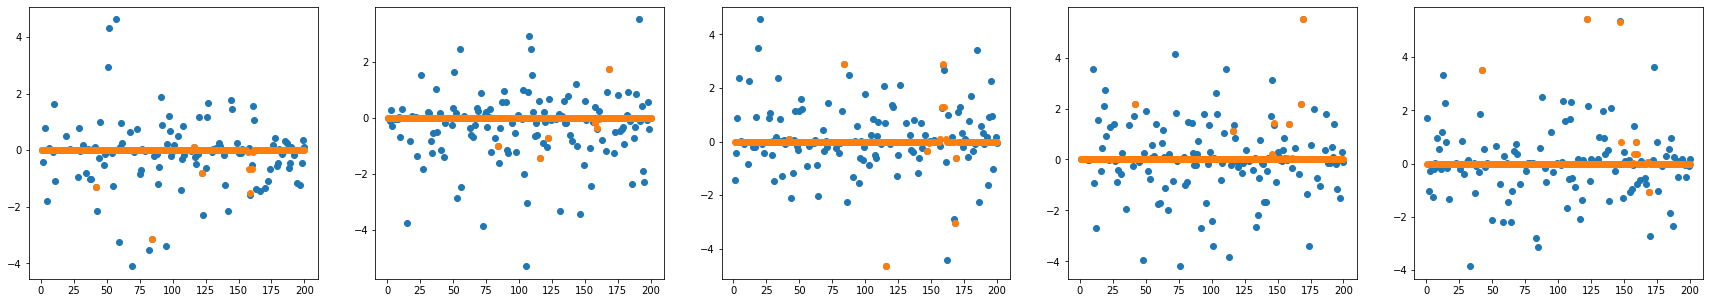

13th additional rbflayer
13th additional RBFlayer 0th epoch loss: 0.6923177933586284
13th additional RBFlayer 999th epoch value MAE Loss: 0.6928532864308571
13th additional RBFlayer 1999th epoch value MAE Loss: 0.6932334102457692
13th additional RBFlayer best loss : 0.6879837363208222


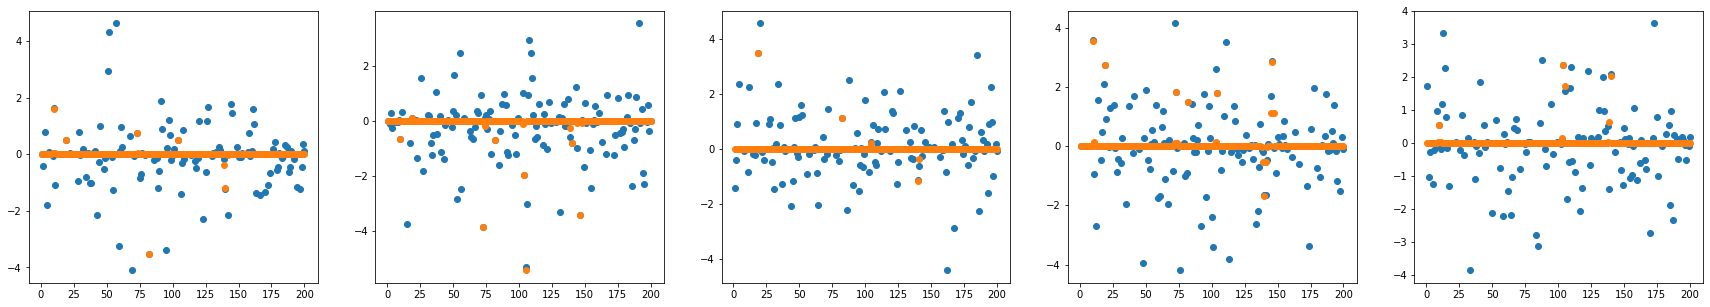

14th additional rbflayer
14th additional RBFlayer 0th epoch loss: 0.6293527487899434
14th additional RBFlayer 999th epoch value MAE Loss: 0.620905627736605
14th additional RBFlayer 1999th epoch value MAE Loss: 0.6194426617850293
14th additional RBFlayer best loss : 0.6194426617850293


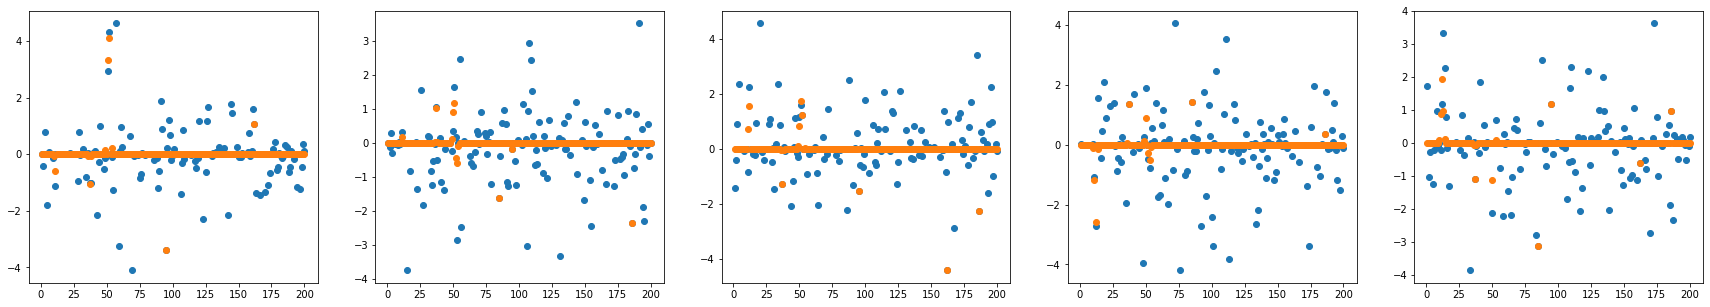

15th additional rbflayer
15th additional RBFlayer 0th epoch loss: 0.5740777659092542
15th additional RBFlayer 999th epoch value MAE Loss: 0.5523445995396123
15th additional RBFlayer 1999th epoch value MAE Loss: 0.5520127034806593
15th additional RBFlayer best loss : 0.5520127034806593


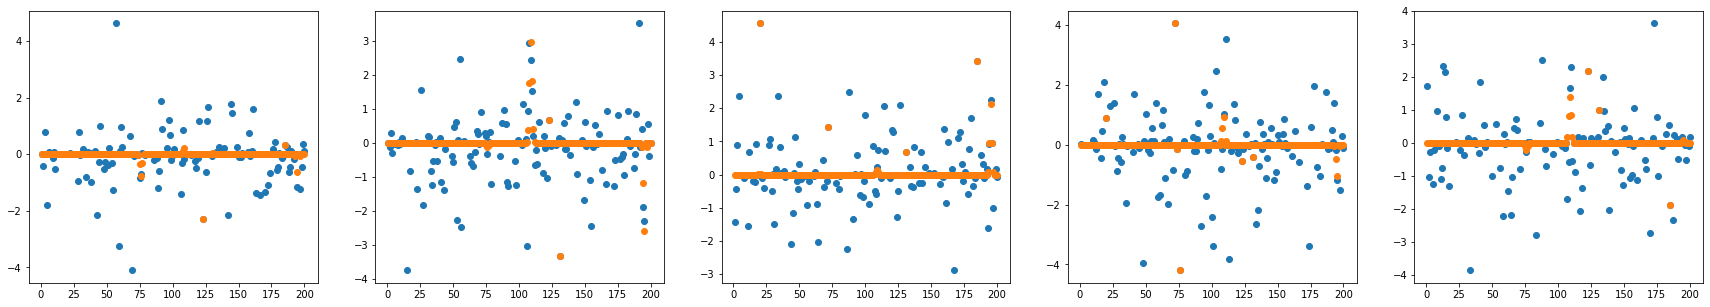

16th additional rbflayer
16th additional RBFlayer 0th epoch loss: 0.5138181406016811
16th additional RBFlayer 999th epoch value MAE Loss: 0.5012706069916713
16th additional RBFlayer 1999th epoch value MAE Loss: 0.501198740875344
16th additional RBFlayer best loss : 0.5010633675070707


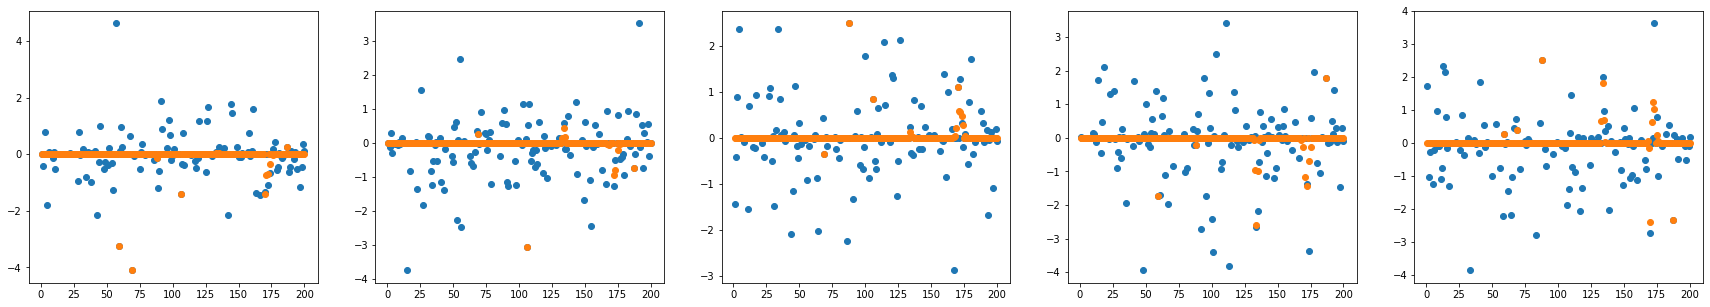

17th additional rbflayer
17th additional RBFlayer 0th epoch loss: 0.4591215178363904
17th additional RBFlayer 999th epoch value MAE Loss: 0.443176087995213
17th additional RBFlayer 1999th epoch value MAE Loss: 0.4427710575736068
17th additional RBFlayer best loss : 0.4427710575736068


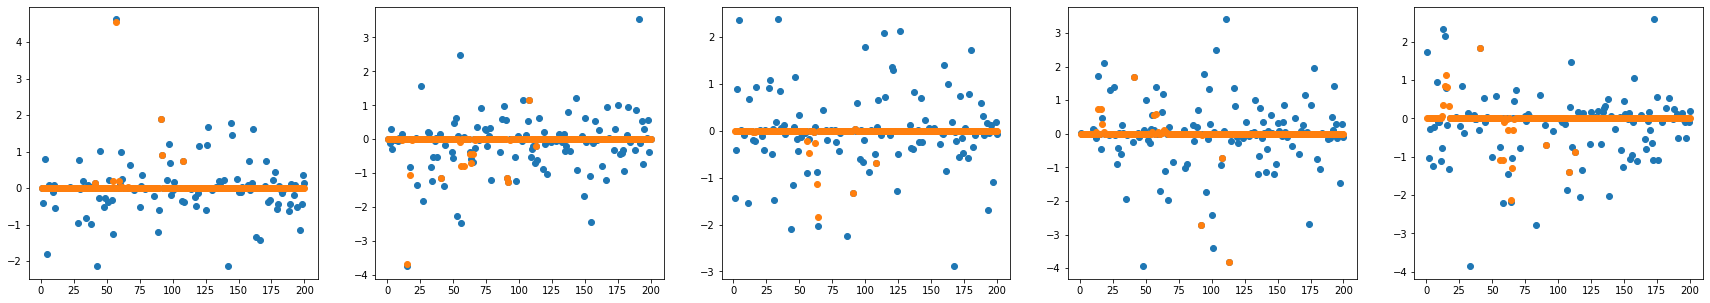

18th additional rbflayer
18th additional RBFlayer 0th epoch loss: 0.41103706030225207
18th additional RBFlayer 999th epoch value MAE Loss: 0.3902216311128918
18th additional RBFlayer 1999th epoch value MAE Loss: 0.389409053643447
18th additional RBFlayer best loss : 0.389409053643447


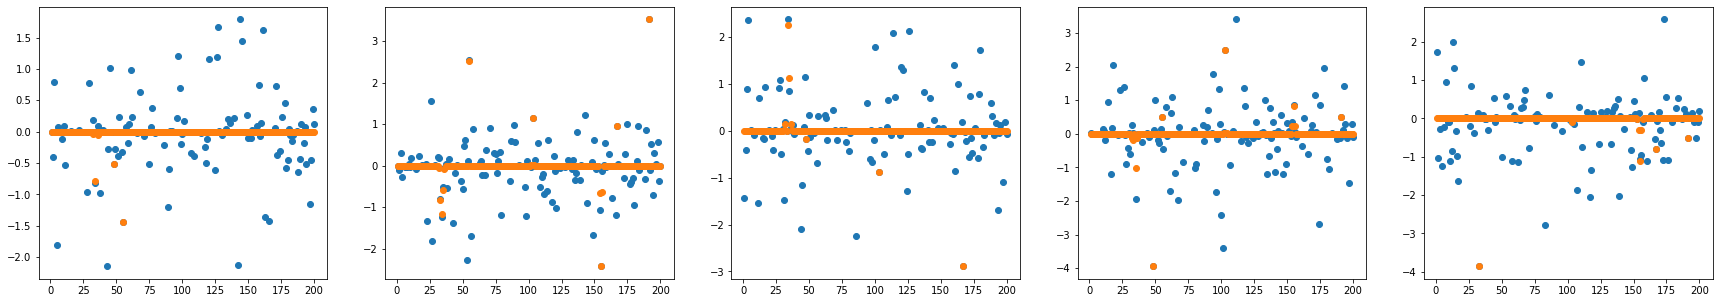

19th additional rbflayer
19th additional RBFlayer 0th epoch loss: 0.3541872406832881
19th additional RBFlayer 999th epoch value MAE Loss: 0.3455565865411024
19th additional RBFlayer 1999th epoch value MAE Loss: 0.34527488046550364
19th additional RBFlayer best loss : 0.34527488046550364


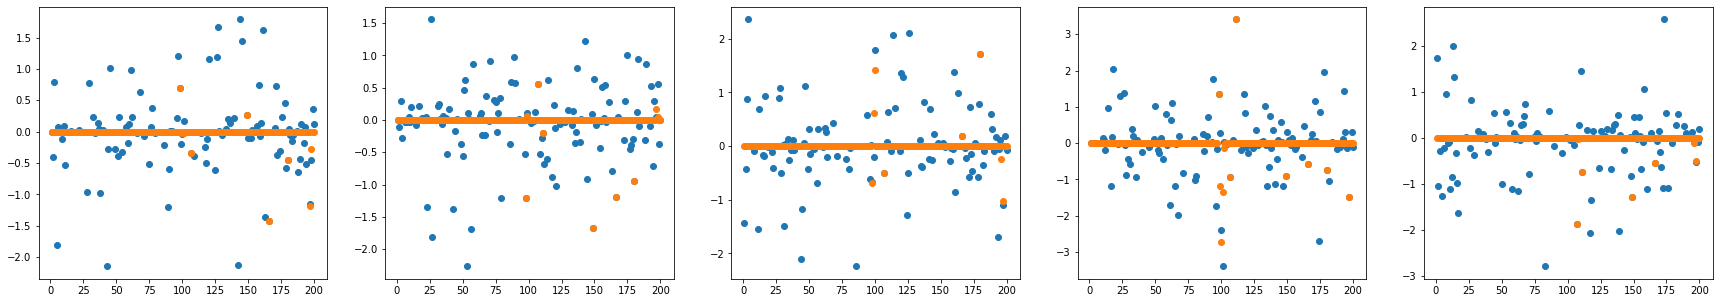

20th additional rbflayer
20th additional RBFlayer 0th epoch loss: 0.3165380457062654
20th additional RBFlayer 999th epoch value MAE Loss: 0.30509882150061174
20th additional RBFlayer 1999th epoch value MAE Loss: 0.3048197490475692
20th additional RBFlayer best loss : 0.3048197490475692


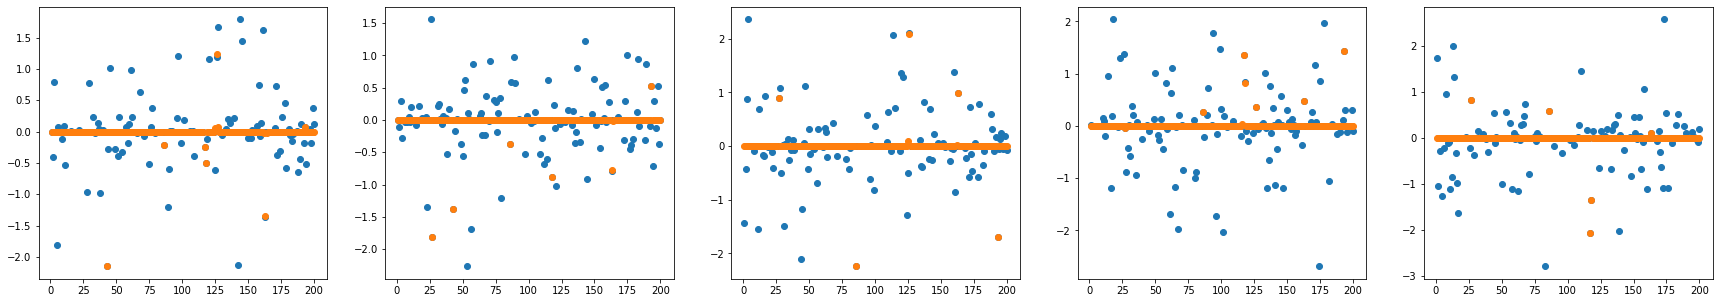

21th additional rbflayer
21th additional RBFlayer 0th epoch loss: 0.2856172234300749
21th additional RBFlayer 999th epoch value MAE Loss: 0.2710796431813846
21th additional RBFlayer 1999th epoch value MAE Loss: 0.268948113988161
21th additional RBFlayer best loss : 0.268948113988161


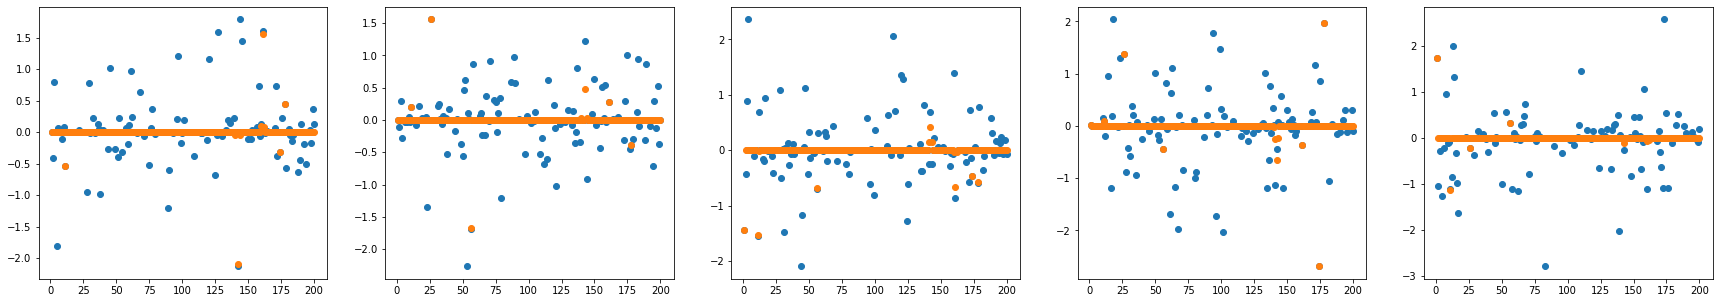

22th additional rbflayer
22th additional RBFlayer 0th epoch loss: 0.2415316454171441
22th additional RBFlayer 999th epoch value MAE Loss: 0.236529703754892
22th additional RBFlayer 1999th epoch value MAE Loss: 0.23728577774880133
22th additional RBFlayer best loss : 0.23641877960982008


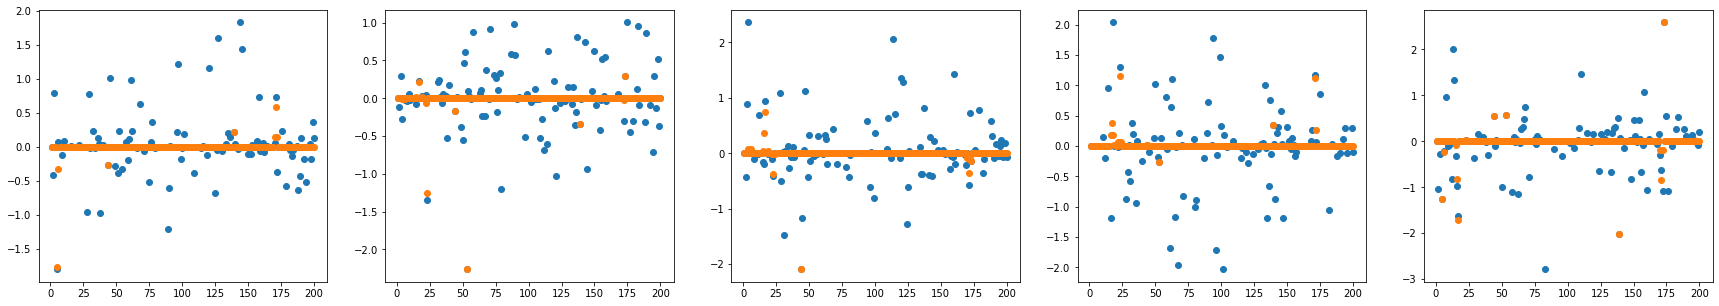

23th additional rbflayer
23th additional RBFlayer 0th epoch loss: 0.20989002638724327
23th additional RBFlayer 999th epoch value MAE Loss: 0.2055306944836517
23th additional RBFlayer 1999th epoch value MAE Loss: 0.20517119805735262
23th additional RBFlayer best loss : 0.20517119805735262


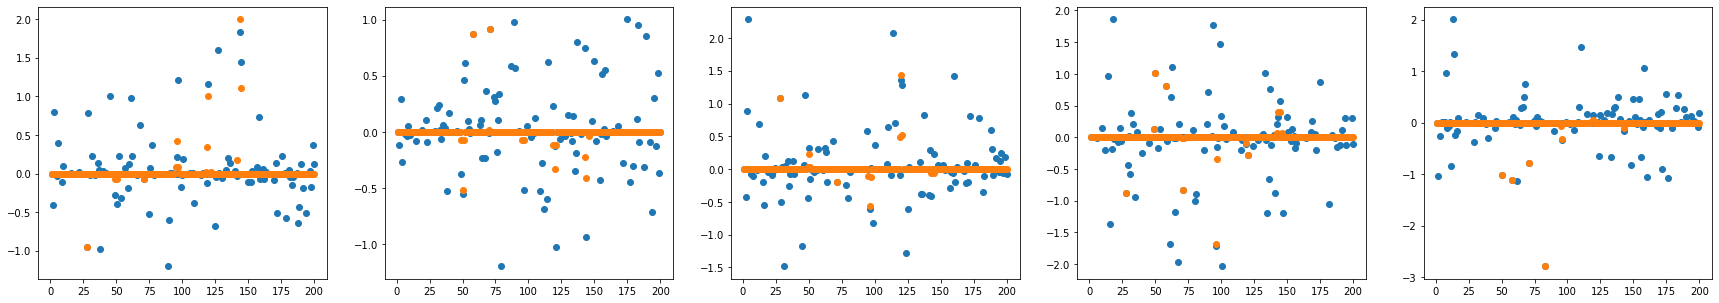

24th additional rbflayer
24th additional RBFlayer 0th epoch loss: 0.18045200855150767
24th additional RBFlayer 999th epoch value MAE Loss: 0.17570251388490815
24th additional RBFlayer 1999th epoch value MAE Loss: 0.1751624497790038
24th additional RBFlayer best loss : 0.1751624497790038


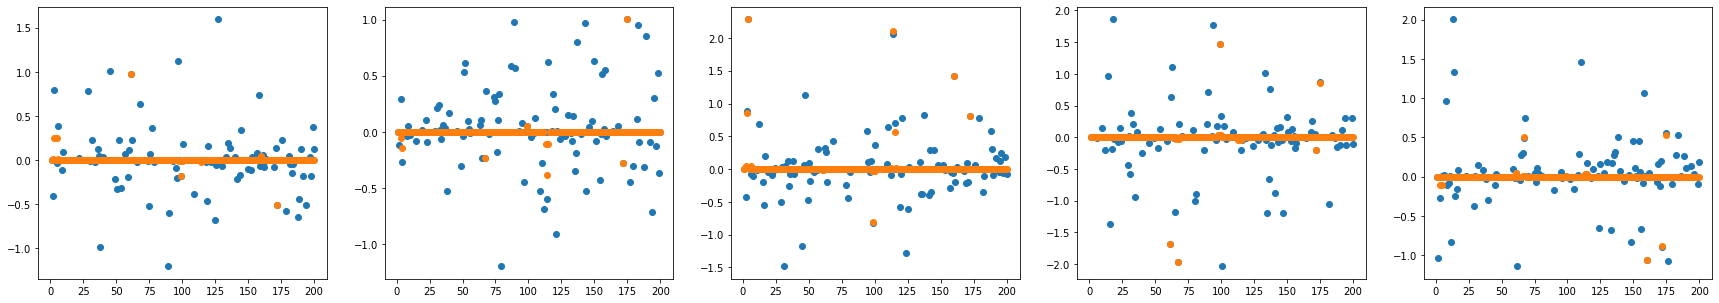

25th additional rbflayer
25th additional RBFlayer 0th epoch loss: 0.15681122723827712
25th additional RBFlayer 999th epoch value MAE Loss: 0.14850408344611996
25th additional RBFlayer 1999th epoch value MAE Loss: 0.14805616223269952
25th additional RBFlayer best loss : 0.14805616223269952


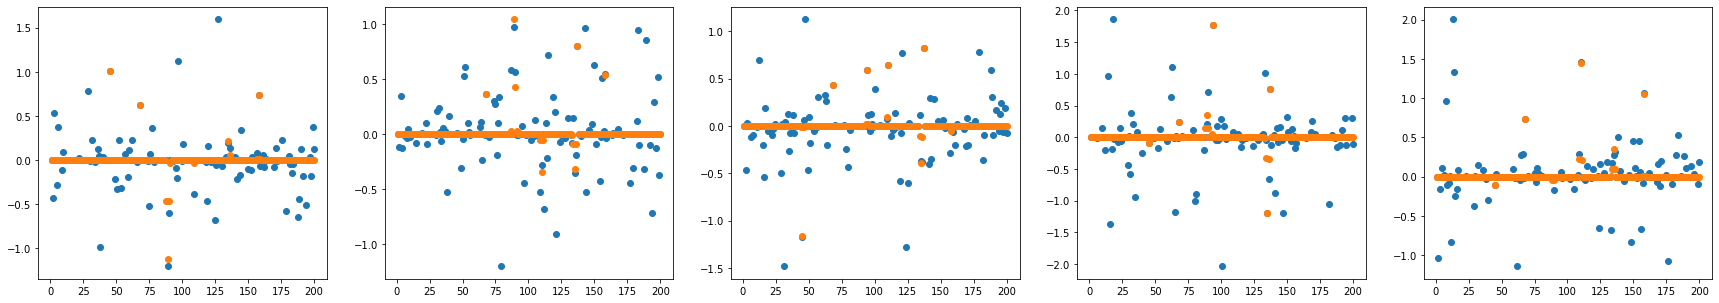

26th additional rbflayer
26th additional RBFlayer 0th epoch loss: 0.12970690584192304
26th additional RBFlayer 999th epoch value MAE Loss: 0.12552253445948788
26th additional RBFlayer 1999th epoch value MAE Loss: 0.1248487782420492
26th additional RBFlayer best loss : 0.1248487782420492


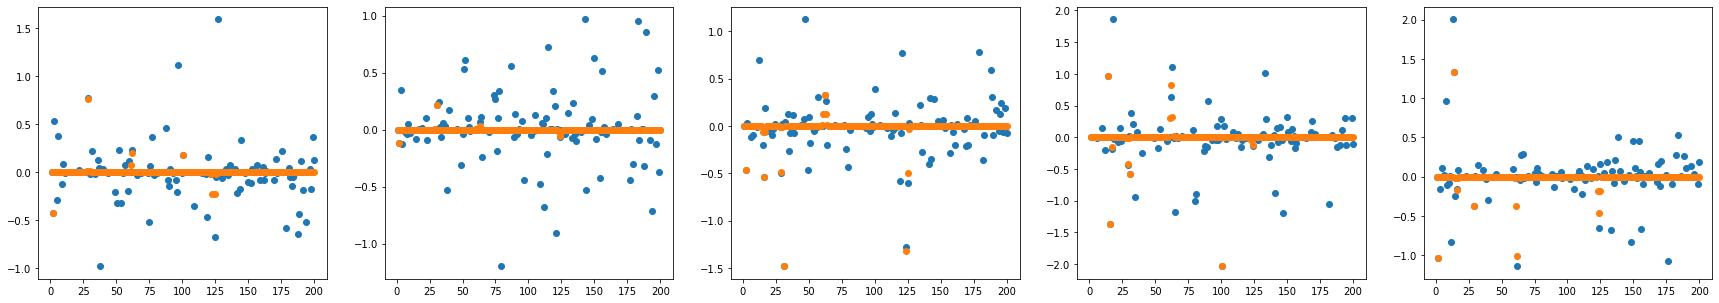

27th additional rbflayer
27th additional RBFlayer 0th epoch loss: 0.11109858817243326
27th additional RBFlayer 999th epoch value MAE Loss: 0.1053505471182589
27th additional RBFlayer 1999th epoch value MAE Loss: 0.10539323980543645
27th additional RBFlayer best loss : 0.10530172647745904


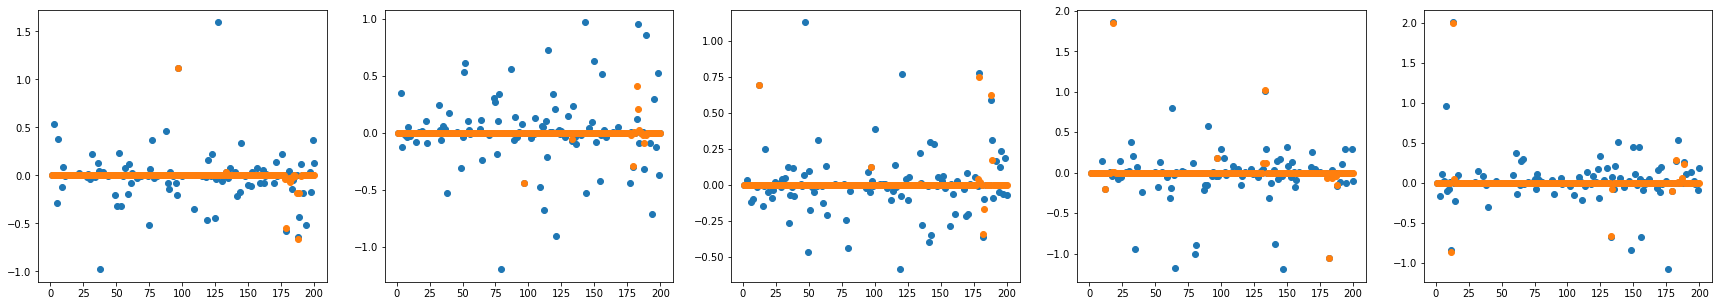

In [4]:
model_random2 = MultiRBFnn_sigma(5, 8, device)
model_random2.train(input_data3, target3, 2000, 1e-3, lossth3, 1e-6)

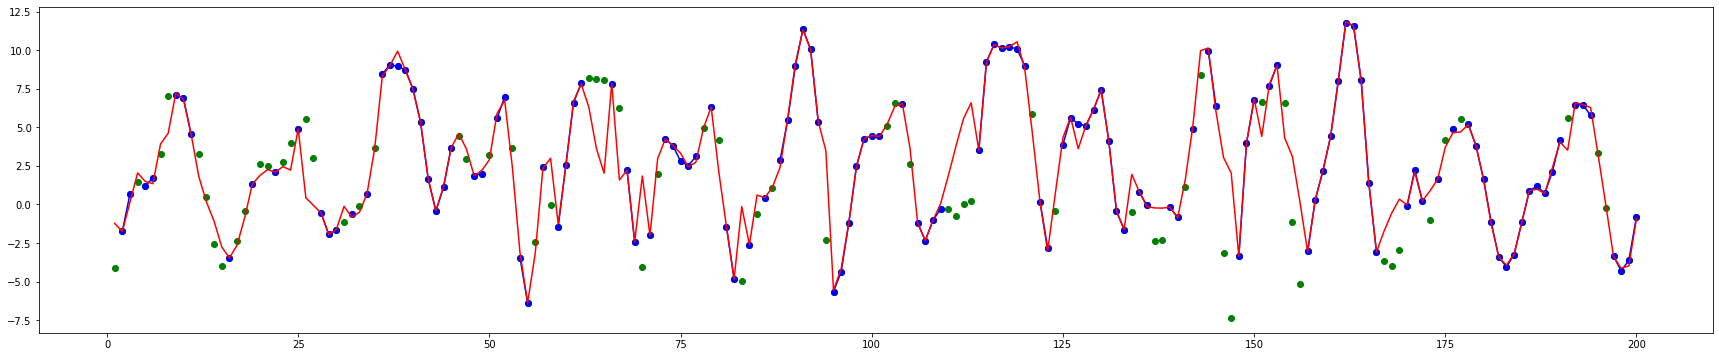

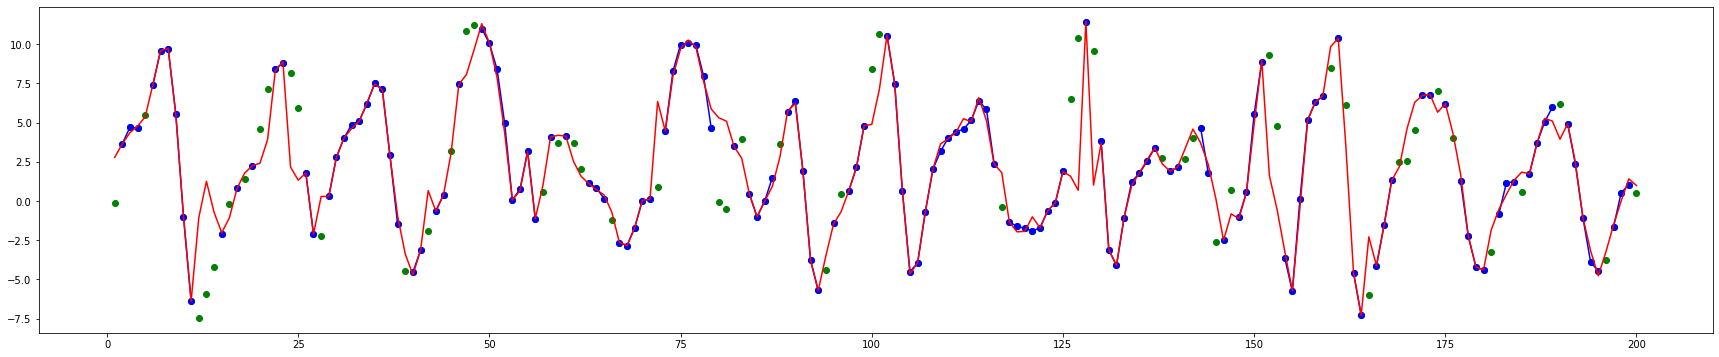

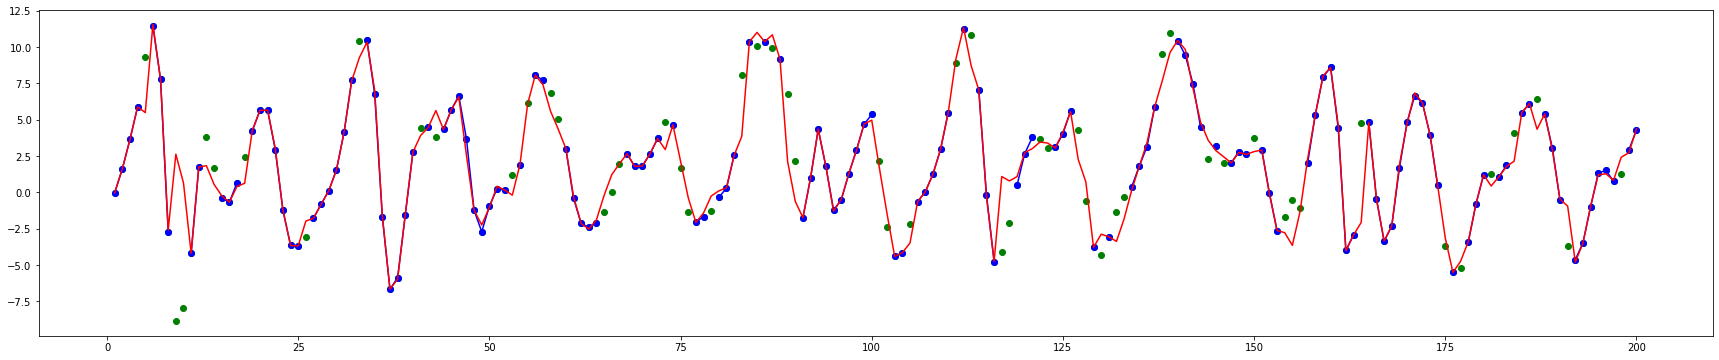

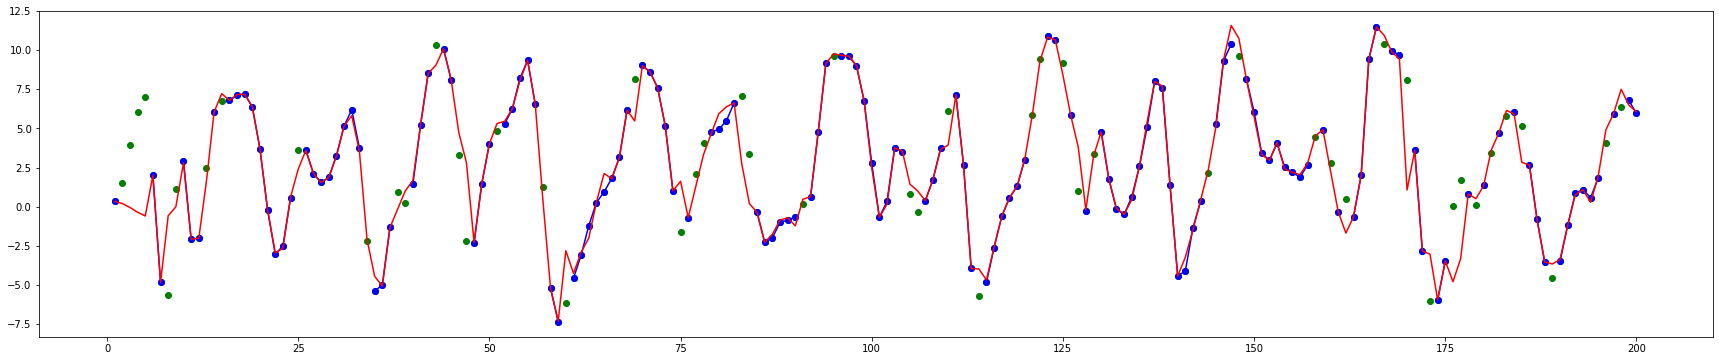

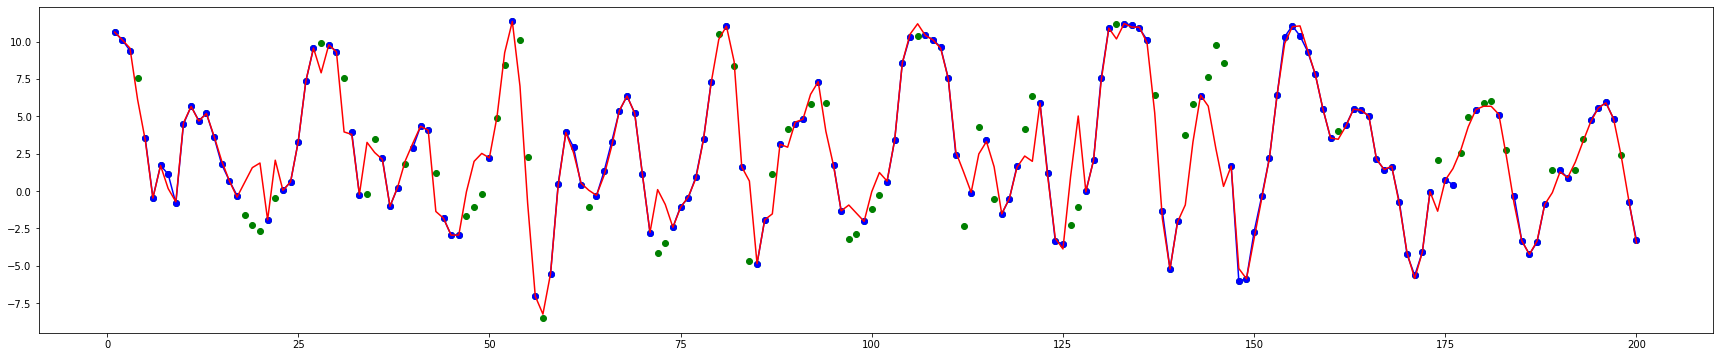

In [5]:
import matplotlib.pyplot as plt
pred_short = model_random2.pred(input_data3)[1]
for i in range(5):
    plt.figure(figsize=(30, 6))
    plt.scatter(input_data3.cpu().detach().numpy(), target_ground3[i].cpu().detach().numpy(), c = 'green')
    plt.scatter(input_data3.cpu().detach().numpy(), target3[i].cpu().detach().numpy(), c = 'blue')
    plt.plot(input_data3.cpu().detach().numpy(), target3[i].cpu().detach().numpy(), c = 'blue')
    plt.plot(input_data3.cpu().detach().numpy(), pred_short[i].cpu().detach().numpy(), c = 'red')
    plt.show()

In [6]:
def rbf_train_flow(model):
    aaa = []
    for j in range(28):
        center = model.train_center_list[j*5:(j+1) * 5]
        sigma = model.train_sigma_list[j*5:(j+1) * 5]
        weight = model.train_weight_list[j*5:(j+1) * 5]
        rbf_list = []
        for i in range(len(center)):
            rbf_output = torch.exp(-1 * (torch.pow((input_data3 - center[i]), 2) / \
                                            (torch.pow(sigma[i], 2))))
            pred = torch.mm(weight[i], rbf_output)
            rbf_list.append(pred)
        aaa.append(rbf_list)
    for i in range(28):
        if i ==0:
            a = torch.cat(aaa[i], axis = 0).reshape(5,5,200) 
        else:
            a += torch.cat(aaa[i], axis = 0).reshape(5,5,200)

    return a

In [7]:
ddd = rbf_train_flow(model_random2)

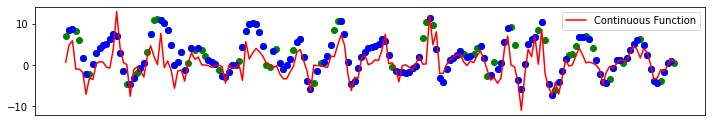

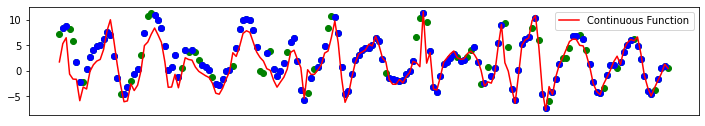

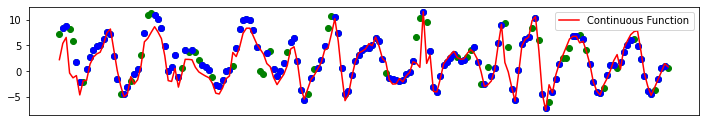

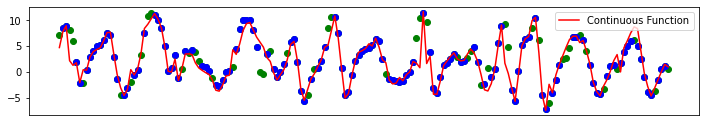

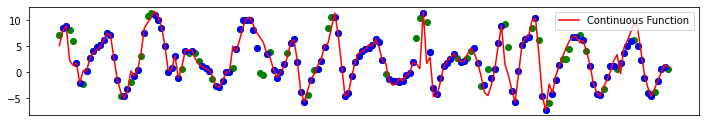

In [35]:
import matplotlib.pyplot as plt
plt.style.use("seaborn-deep")
num_feature = 1
for i in range(len(ddd)):
    plt.figure(figsize=(12, 2))
    plt.scatter(input_data3[:-20].cpu().detach().numpy(), target_ground3[num_feature][20:].cpu().detach().numpy(), c = 'green')
    plt.scatter(input_data3[:-20].cpu().detach().numpy(), target3[num_feature][20:].cpu().detach().numpy(), c = 'blue')
    plt.plot(input_data3[:-20].cpu().detach().numpy(), ddd[i][num_feature][20:].cpu().detach().numpy(), c = 'red',label = "Continuous Function")
    #plt.ylim(-5,20)
    plt.gca().axes.xaxis.set_visible(False)#x범위 없애기
    plt.legend()
    plt.savefig('RBFablation_simga_{}.png'.format(i *500))
    plt.show()

In [36]:
df_ground = pd.read_csv('./dataset/demo2_csv.csv')
df = pd.read_csv('./dataset/demo_short2.csv')

In [37]:
model_random2.pred(input_data3)[1].size()

torch.Size([5, 200])

In [39]:
random_sigma_df = pd.DataFrame(model_random2.pred(input_data3)[1].T.cpu().detach().numpy(), columns=df.columns)

In [42]:
missing_index = np.where(np.isnan(df_ground), 0.0 , 1.0) - np.where(np.isnan(df), 0.0 , 1.0)

In [43]:
print(np.mean(np.abs(df_ground.values[(missing_index != 1)] -  random_sigma_df.values[(missing_index != 1)])))
print(np.mean(np.abs(df_ground.values[(missing_index != 0)] -  random_sigma_df.values[(missing_index != 0)])))
print(np.sum(np.abs(df_ground.values[(missing_index != 0)] -  random_sigma_df.values[(missing_index != 0)])) / np.sum(np.abs(df_ground.values[(missing_index != 0)])))

0.10530172647745904
2.140852093781364
0.5250638775008533


In [44]:
time_sigma_df = pd.DataFrame(model_time2.pred(input_data3)[1].T.cpu().detach().numpy(), columns=df.columns)

In [45]:
print(np.mean(np.abs(df_ground.values[(missing_index != 1)] -  time_sigma_df.values[(missing_index != 1)])))
print(np.mean(np.abs(df_ground.values[(missing_index != 0)] -  time_sigma_df.values[(missing_index != 0)])))
print(np.sum(np.abs(df_ground.values[(missing_index != 0)] -  time_sigma_df.values[(missing_index != 0)])) / np.sum(np.abs(df_ground.values[(missing_index != 0)])))

0.11832755894235032
1.7055749571409387
0.4183081133750802
